# Installation

In [ ]:
import ast


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
!mkdir -p data

In [ ]:
df = pd.read_csv("data/laptop_cleaned_v1.csv")

In [ ]:
# Categorize columns
numerical_cols = ['height_mm', 'width_mm', 'display_width',
                'product_weight', 'depth_mm', 'display_height',
                'display_size', 'battery_capacity', 'cpu_max_speed', 'cpu_speed',
                'cam_ung', 'storage_max_support', 'storage_gb', 'bluetooth_version',
                'cpu_threads', 'cpu_cores', 'ram_speed', 'refresh_rate', 'ram_storage',
                'ram_slots', 'vga_vram']

categorical_cols = ['material', 'manufacturer', 'ram_type', 'os_version', 'laptop_color', 'vga_brand',
                    'cpu_series', 'laptop_camera', 'cpu_brand','cpu_model','vga_type']

meta_data = ['url_path', 'name', 'image', 'product_id']

#'discounted_price', 'is_installment', 'root_price'


# Mann-Whitney & Chi-squared

In [ ]:
target_cols = ['hoc_tap_van_phong', 'laptop_sang_tao_noi_dung', 'mong_nhe', 'gaming',
       'do_hoa_ky_thuat', 'cao_cap_sang_trong']
def basic_eda(target):
    # --- Numerical Features vs. target ---
    for num_col in numerical_cols:
        if num_col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x=df[target], y=df[num_col])
            plt.title(f"Box plot {num_col} by {target}")
            plt.xlabel(f"Is {target} ? (0 = No, 1 = Yes)")
            plt.ylabel(num_col)
            plt.show()

            # Mann-Whitney U test
            group1 = df[df[target] == 1][num_col].dropna()
            group0 = df[df[target] == 0][num_col].dropna()
            if len(group1) >1 and len(group0) > 1:
                try:
                    stat, p_value = mannwhitneyu(group1, group0, alternative='two-sided')
                    print(f"Mann-Whitney U test for {num_col} vs {target}: U-statistic = {stat:,.0f}, p-value = {p_value:.4f}")
                    if p_value < 0.05:
                        print(f"-> Significant difference in {num_col} between laptop that are '{target}' and those are not")
                        median_group1 = group1.median()
                        median_group0 = group0.median()
                        print(f"Median for {target} = 1: {median_group1}\nMedian for {target} = 0: {median_group0}")
                    else:
                        print(f"-> No significant different")
                except ValueError as e_mw:
                    print(f"Could not perform Mann-Whitney U test for {num_col}: {e_mw} (Possibly all values are identical in groups)")
            else:
                print(f"Skipping Mann-Whitney U test for {num_col} due to insufficient samples in one or both groups for {target}.")
                print("-" * 30)

    # --- Categorical Features vs. target ---
    for cat_col in categorical_cols:
        if cat_col in df.columns:
            contigency_table_multilabel = pd.crosstab(df[target],df[cat_col])
            print(f"Contifency table for {target} and {cat_col}:\n", contigency_table_multilabel)
            if contigency_table_multilabel.shape[0] > 1 and contigency_table_multilabel.shape[1] > 1:
                # Visualize
                contigency_table_multilabel.plot(kind='bar', figsize=(10,6))
                plt.title(f"Counts of {cat_col} for {target} (0 vs 1)")
                plt.xlabel(f"Is {target} ?")
                plt. ylabel("Count")
                plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
                plt.legend(title=cat_col)
                plt.tight_layout()
                plt.show()

                # Chi-squared test
                try:
                    chi2, p_chi, dof, expected = chi2_contingency(contigency_table_multilabel)
                    print(f"Chi-squared test for {target} and {cat_col}: Chi2 = {chi2:.4f}, p-value = {p_chi:4f}")
                    if p_chi < 0.05:
                        print(f"-> Significant association between {target} and {cat_col}")
                    else:
                        print(f"-> No significant association")
                except ValueError as e_chi:
                    print(f"Could not perform Chi-squared test for {cat_col}: {e_chi}. Check for low expected frequencies.")
                    print("-" * 30)

## Gamming

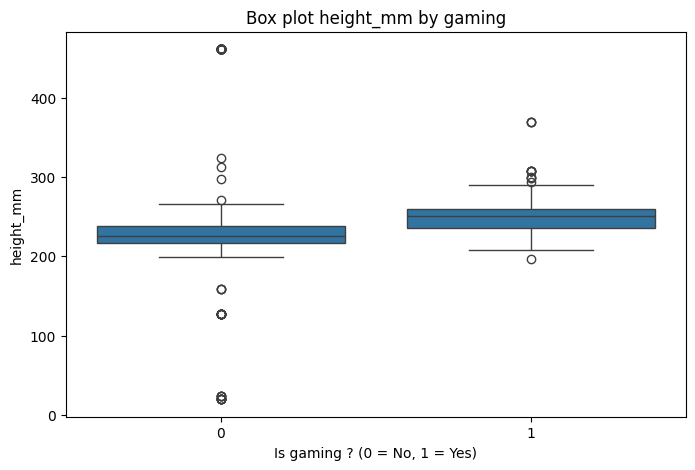

Mann-Whitney U test for height_mm vs gaming: U-statistic = 183,739, p-value = 0.0000
-> Significant difference in height_mm between laptop that are 'gaming' and those are not
Median for gaming = 1: 251.0
Median for gaming = 0: 225.9


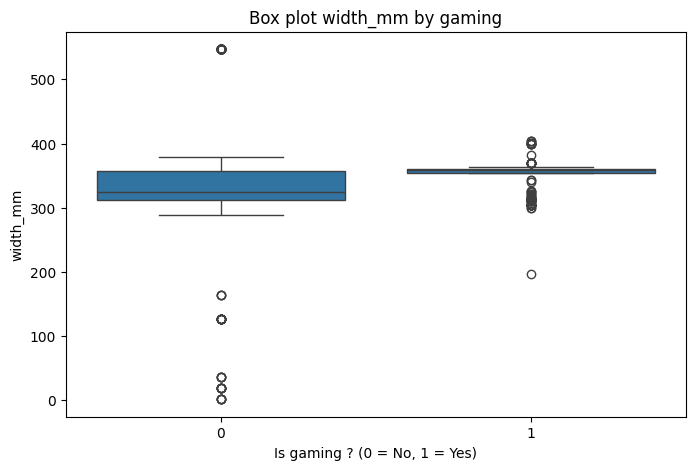

Mann-Whitney U test for width_mm vs gaming: U-statistic = 175,252, p-value = 0.0000
-> Significant difference in width_mm between laptop that are 'gaming' and those are not
Median for gaming = 1: 359.0
Median for gaming = 0: 324.1


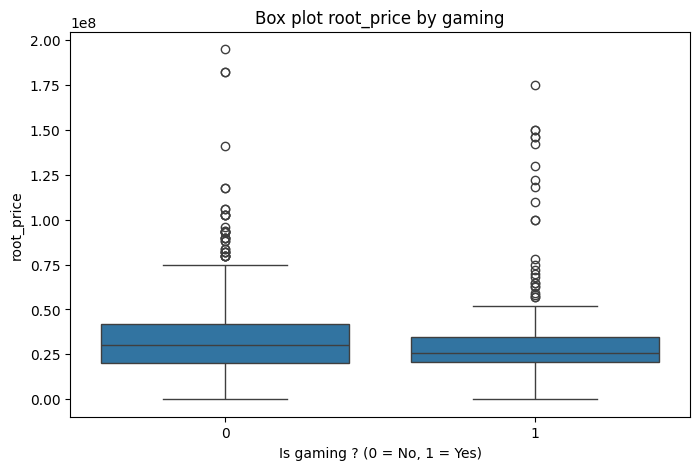

Mann-Whitney U test for root_price vs gaming: U-statistic = 107,846, p-value = 0.0090
-> Significant difference in root_price between laptop that are 'gaming' and those are not
Median for gaming = 1: 25990000.0
Median for gaming = 0: 30240000.0


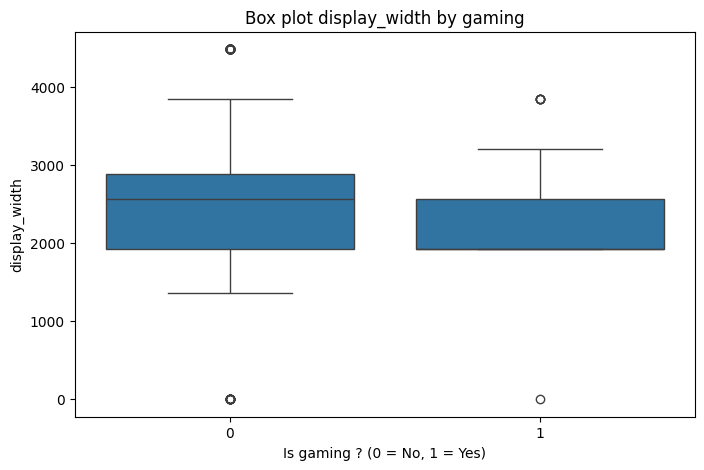

Mann-Whitney U test for display_width vs gaming: U-statistic = 75,488, p-value = 0.0000
-> Significant difference in display_width between laptop that are 'gaming' and those are not
Median for gaming = 1: 1920.0
Median for gaming = 0: 2560.0


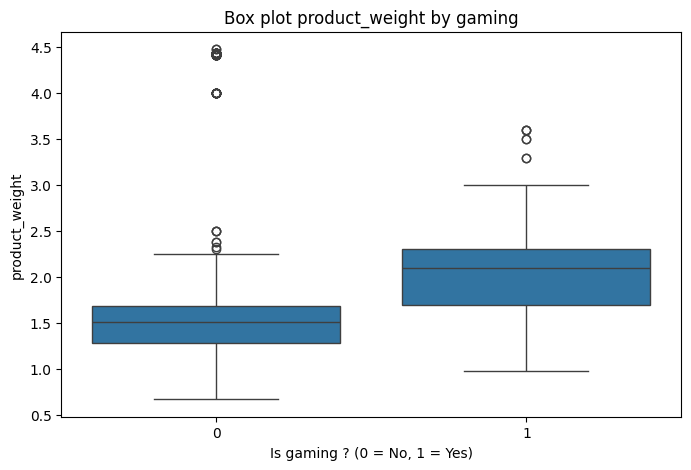

Mann-Whitney U test for product_weight vs gaming: U-statistic = 188,698, p-value = 0.0000
-> Significant difference in product_weight between laptop that are 'gaming' and those are not
Median for gaming = 1: 2.1
Median for gaming = 0: 1.51


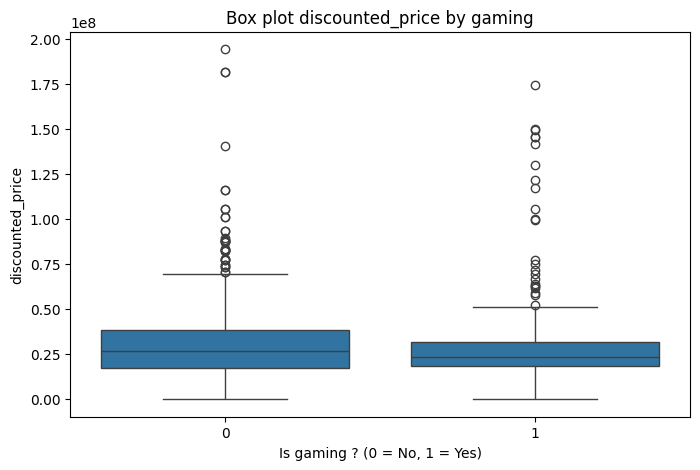

Mann-Whitney U test for discounted_price vs gaming: U-statistic = 108,380, p-value = 0.0124
-> Significant difference in discounted_price between laptop that are 'gaming' and those are not
Median for gaming = 1: 23340000.0
Median for gaming = 0: 27040000.0


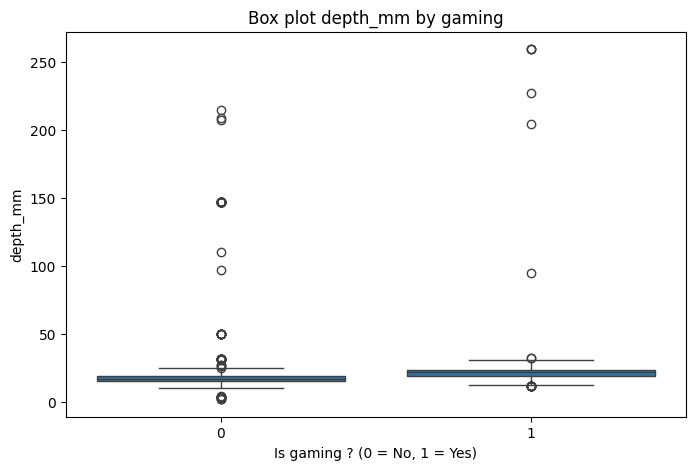

Mann-Whitney U test for depth_mm vs gaming: U-statistic = 182,018, p-value = 0.0000
-> Significant difference in depth_mm between laptop that are 'gaming' and those are not
Median for gaming = 1: 21.9
Median for gaming = 0: 16.9


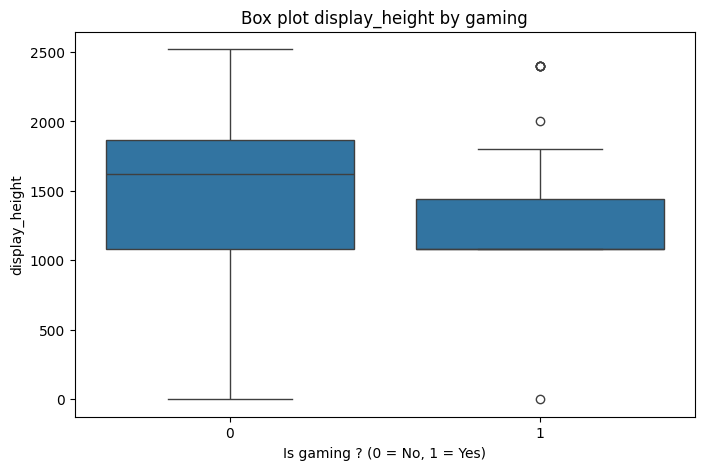

Mann-Whitney U test for display_height vs gaming: U-statistic = 67,893, p-value = 0.0000
-> Significant difference in display_height between laptop that are 'gaming' and those are not
Median for gaming = 1: 1080.0
Median for gaming = 0: 1620.0


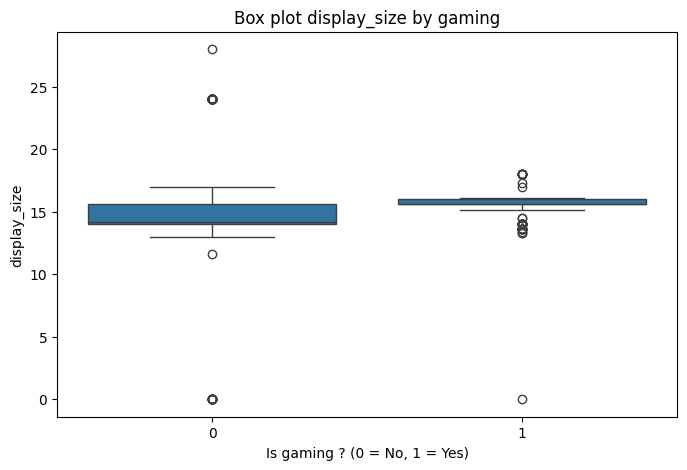

Mann-Whitney U test for display_size vs gaming: U-statistic = 165,503, p-value = 0.0000
-> Significant difference in display_size between laptop that are 'gaming' and those are not
Median for gaming = 1: 15.6
Median for gaming = 0: 14.2


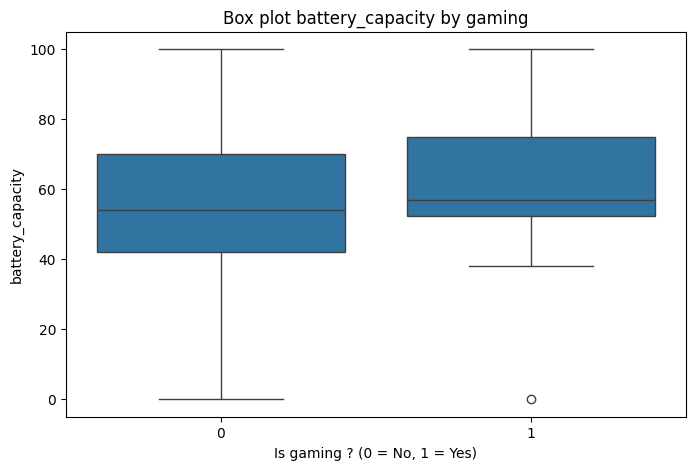

Mann-Whitney U test for battery_capacity vs gaming: U-statistic = 144,908, p-value = 0.0000
-> Significant difference in battery_capacity between laptop that are 'gaming' and those are not
Median for gaming = 1: 57.0
Median for gaming = 0: 54.0


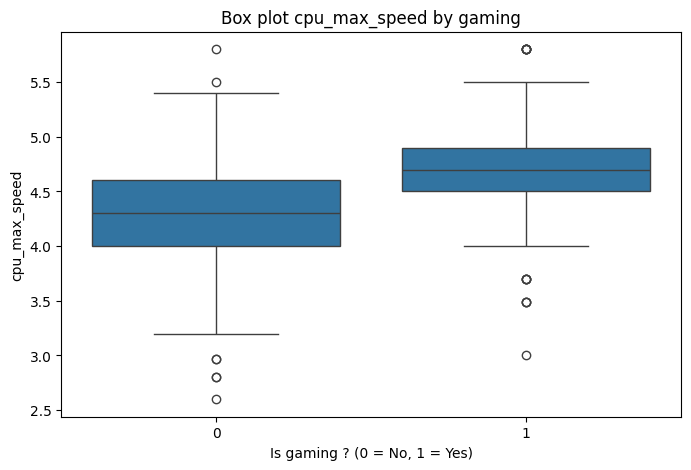

Mann-Whitney U test for cpu_max_speed vs gaming: U-statistic = 178,162, p-value = 0.0000
-> Significant difference in cpu_max_speed between laptop that are 'gaming' and those are not
Median for gaming = 1: 4.7
Median for gaming = 0: 4.3


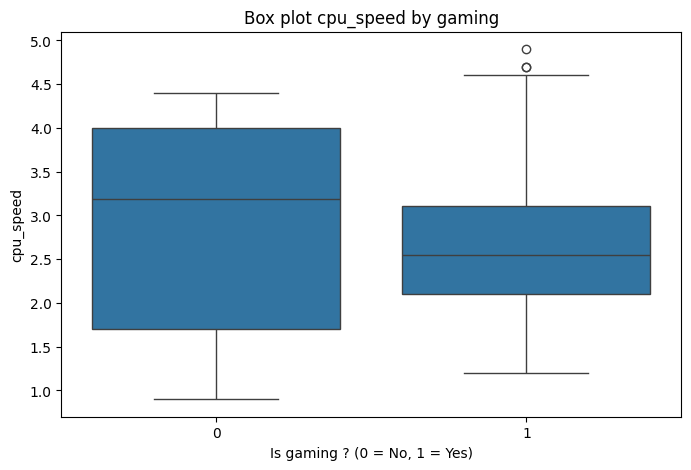

Mann-Whitney U test for cpu_speed vs gaming: U-statistic = 107,542, p-value = 0.0072
-> Significant difference in cpu_speed between laptop that are 'gaming' and those are not
Median for gaming = 1: 2.549102783203125
Median for gaming = 0: 3.190088987350464


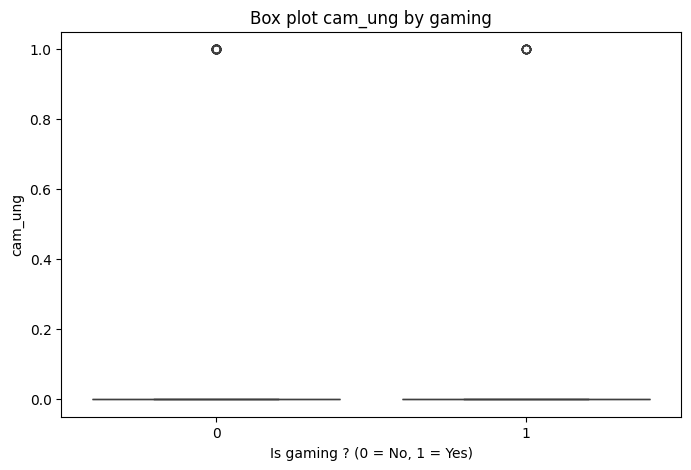

Mann-Whitney U test for cam_ung vs gaming: U-statistic = 118,923, p-value = 0.4473
-> No significant different


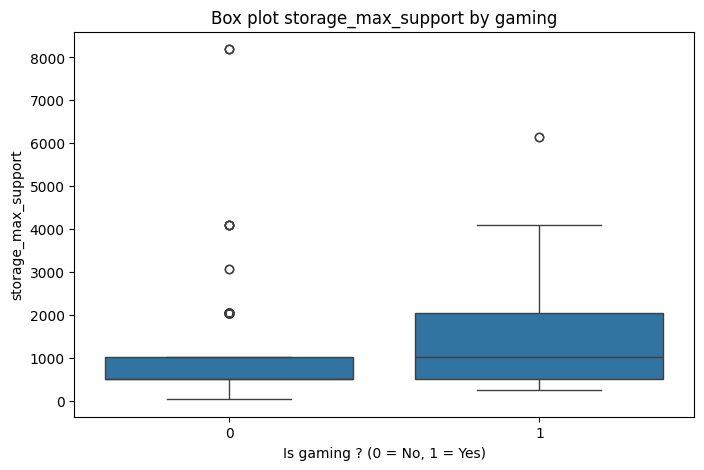

Mann-Whitney U test for storage_max_support vs gaming: U-statistic = 164,804, p-value = 0.0000
-> Significant difference in storage_max_support between laptop that are 'gaming' and those are not
Median for gaming = 1: 1024.0
Median for gaming = 0: 512.0


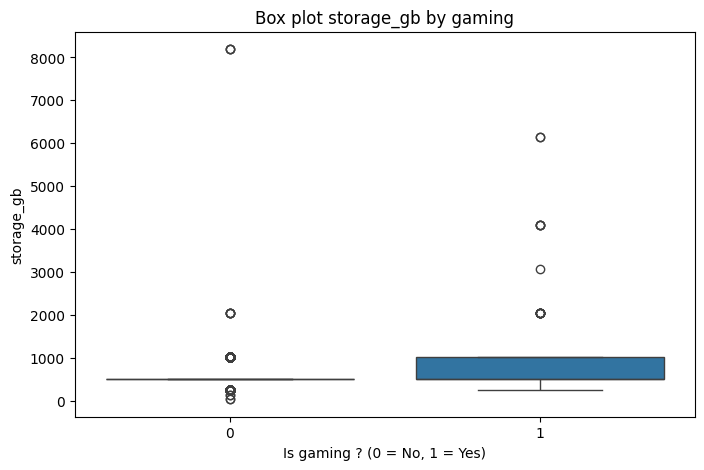

Mann-Whitney U test for storage_gb vs gaming: U-statistic = 140,189, p-value = 0.0000
-> Significant difference in storage_gb between laptop that are 'gaming' and those are not
Median for gaming = 1: 512.0
Median for gaming = 0: 512.0


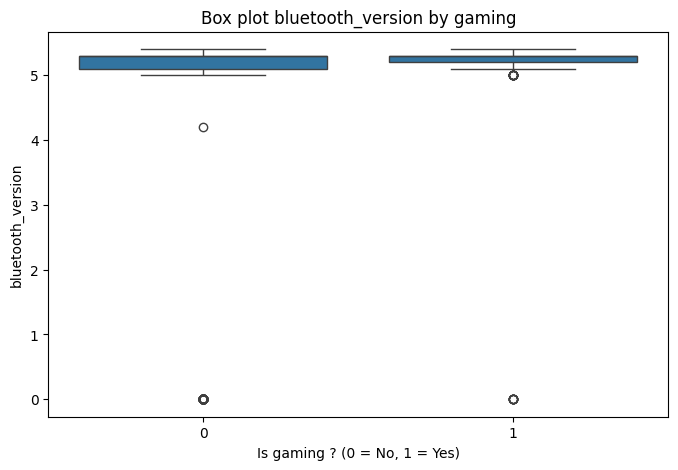

Mann-Whitney U test for bluetooth_version vs gaming: U-statistic = 121,762, p-value = 0.6941
-> No significant different


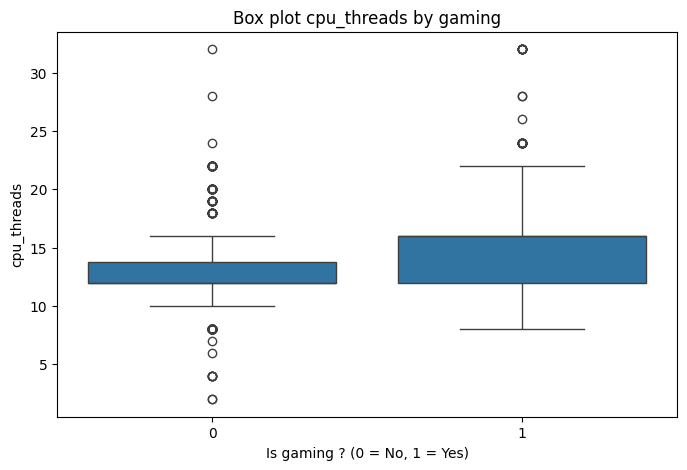

Mann-Whitney U test for cpu_threads vs gaming: U-statistic = 163,636, p-value = 0.0000
-> Significant difference in cpu_threads between laptop that are 'gaming' and those are not
Median for gaming = 1: 16.0
Median for gaming = 0: 12.0


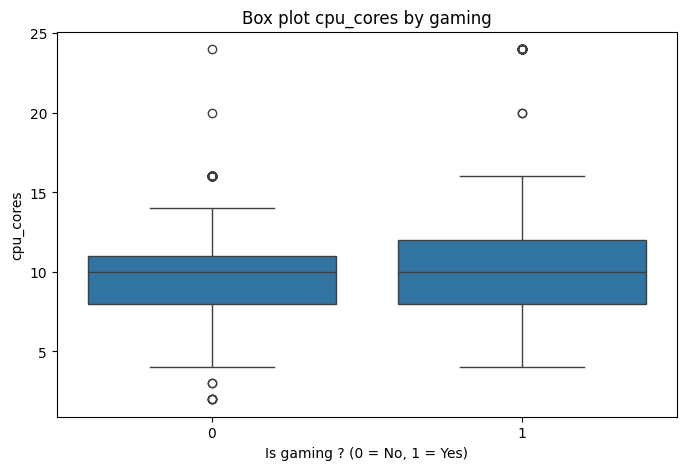

Mann-Whitney U test for cpu_cores vs gaming: U-statistic = 126,352, p-value = 0.1654
-> No significant different


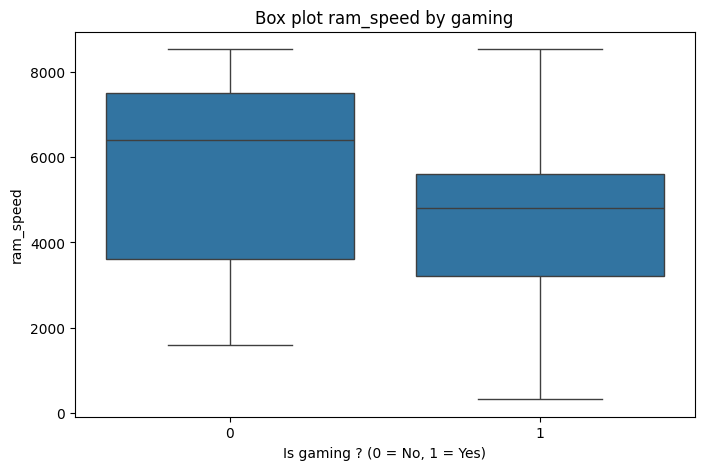

Mann-Whitney U test for ram_speed vs gaming: U-statistic = 76,857, p-value = 0.0000
-> Significant difference in ram_speed between laptop that are 'gaming' and those are not
Median for gaming = 1: 4800.0
Median for gaming = 0: 6400.0


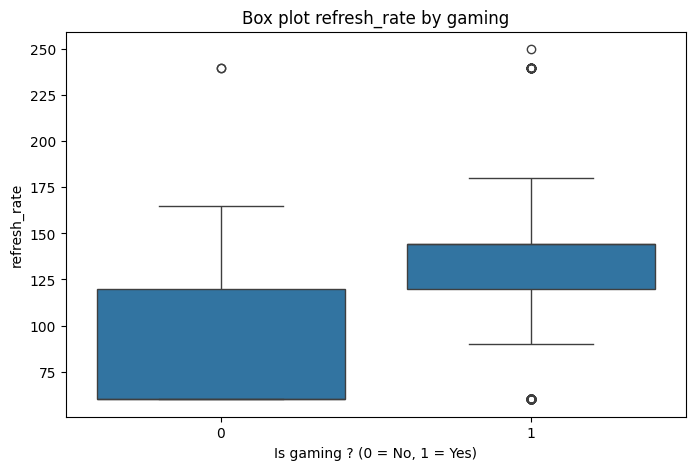

Mann-Whitney U test for refresh_rate vs gaming: U-statistic = 195,441, p-value = 0.0000
-> Significant difference in refresh_rate between laptop that are 'gaming' and those are not
Median for gaming = 1: 144.0
Median for gaming = 0: 60.0


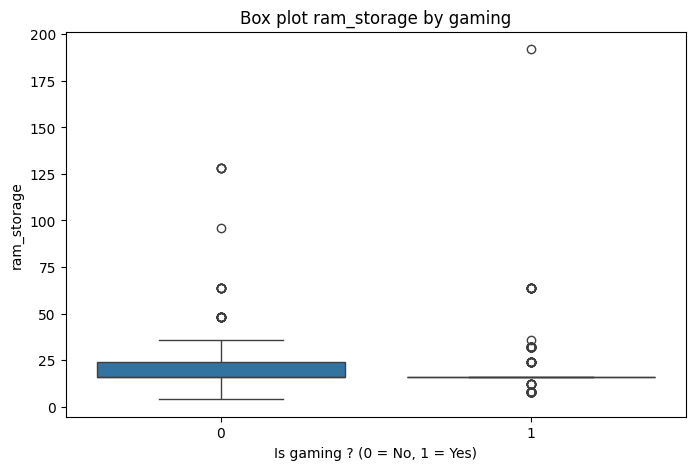

Mann-Whitney U test for ram_storage vs gaming: U-statistic = 110,146, p-value = 0.0173
-> Significant difference in ram_storage between laptop that are 'gaming' and those are not
Median for gaming = 1: 16.0
Median for gaming = 0: 16.0


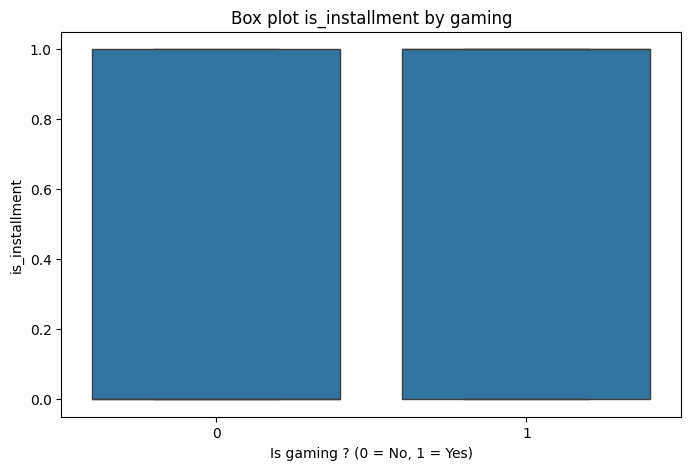

Mann-Whitney U test for is_installment vs gaming: U-statistic = 142,666, p-value = 0.0000
-> Significant difference in is_installment between laptop that are 'gaming' and those are not
Median for gaming = 1: 1.0
Median for gaming = 0: 0.0


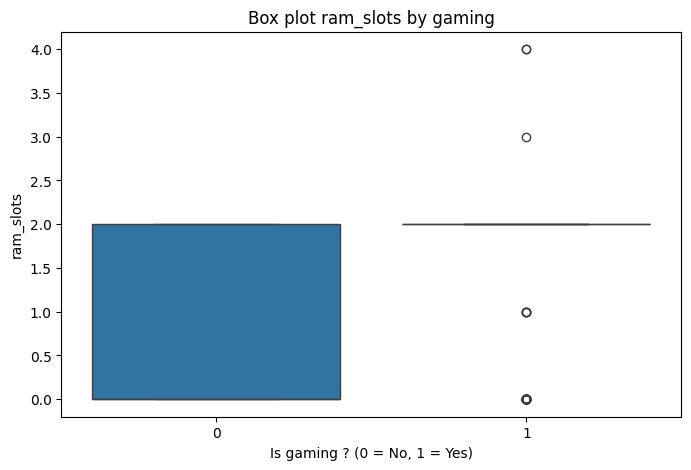

Mann-Whitney U test for ram_slots vs gaming: U-statistic = 184,172, p-value = 0.0000
-> Significant difference in ram_slots between laptop that are 'gaming' and those are not
Median for gaming = 1: 2.0
Median for gaming = 0: 0.0


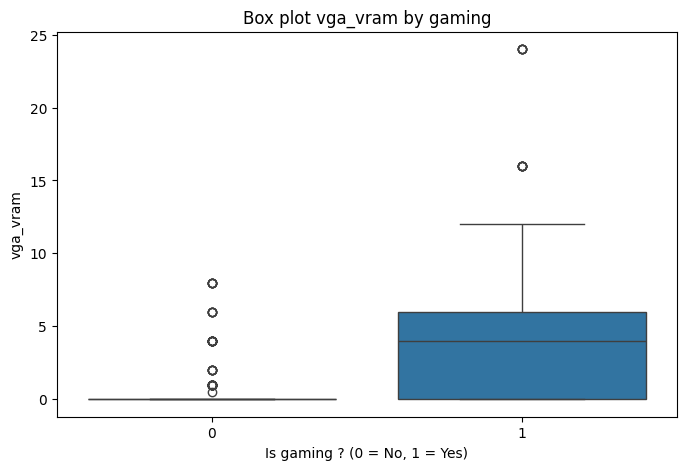

Mann-Whitney U test for vga_vram vs gaming: U-statistic = 202,910, p-value = 0.0000
-> Significant difference in vga_vram between laptop that are 'gaming' and those are not
Median for gaming = 1: 4.0
Median for gaming = 0: 0.0
Contifency table for gaming and material:
 material  vỏ kim loại  vỏ nhựa  vỏ nhựa - nắp lưng kim loại
gaming                                                     
0                 553      203                           34
1                  61      184                           59


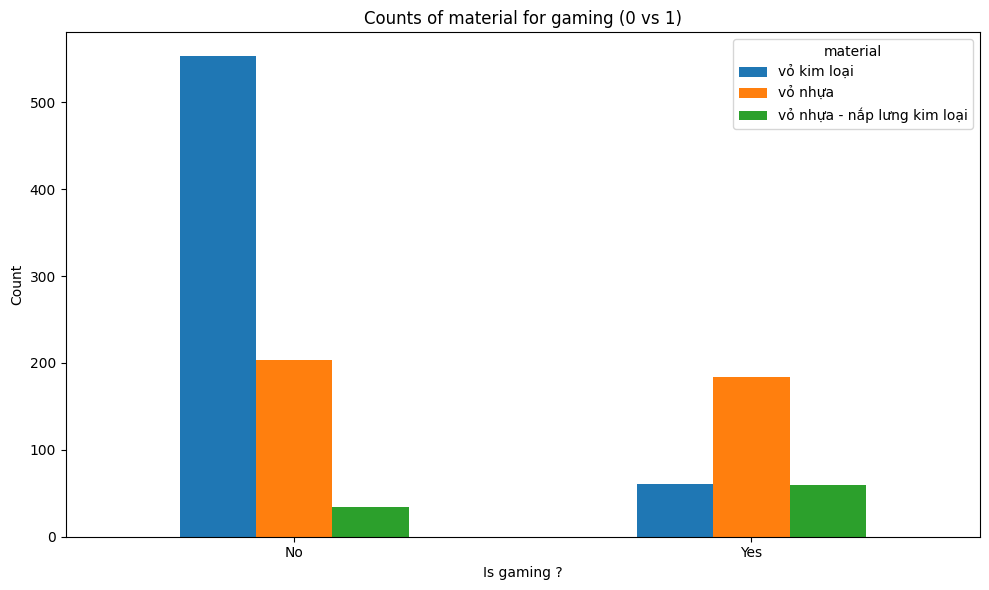

Chi-squared test for gaming and material: Chi2 = 231.7238, p-value = 0.000000
-> Significant association between gaming and material
Contifency table for gaming and manufacturer:
 manufacturer  acer  apple  asus  dell  gigabyte  hp  huawei  lenovo  lg  \
gaming                                                                    
0               40    368   108    77         1  55       2      89  14   
1               45     17    87    11        11  35       0      44   0   

manufacturer  masstel  msi  samsung  vaio  
gaming                                     
0                   1   32        2     1  
1                   0   54        0     0  


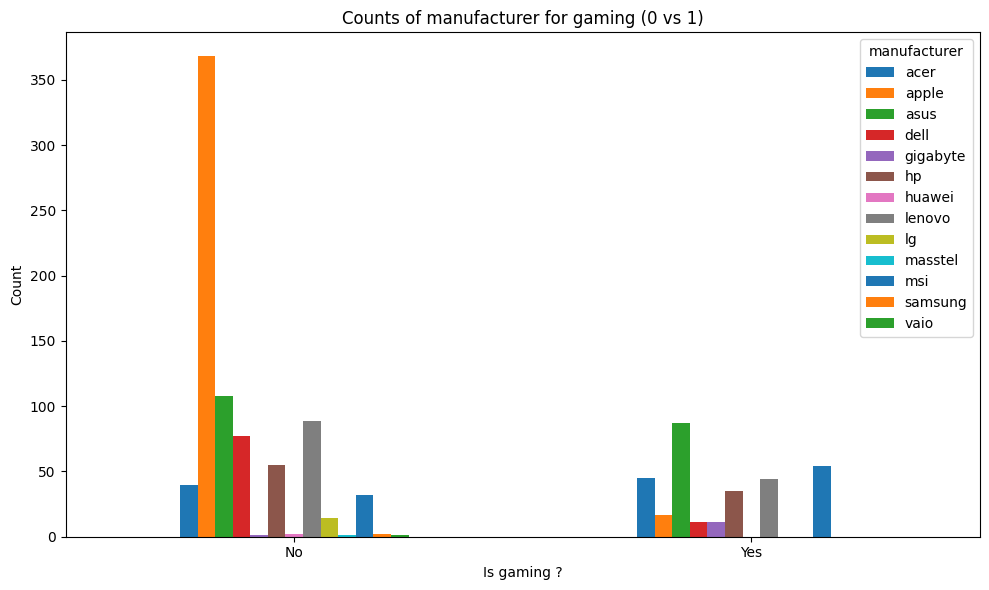

Chi-squared test for gaming and manufacturer: Chi2 = 261.3696, p-value = 0.000000
-> Significant association between gaming and manufacturer
Contifency table for gaming and ram_type:
 ram_type  ddr4  ddr5  gddr5  lpddr4  lpddr4x  lpddr5  lpddr5x
gaming                                                       
0          187    80      0       7        7     305      204
1           84   175      1       1        0      25       18


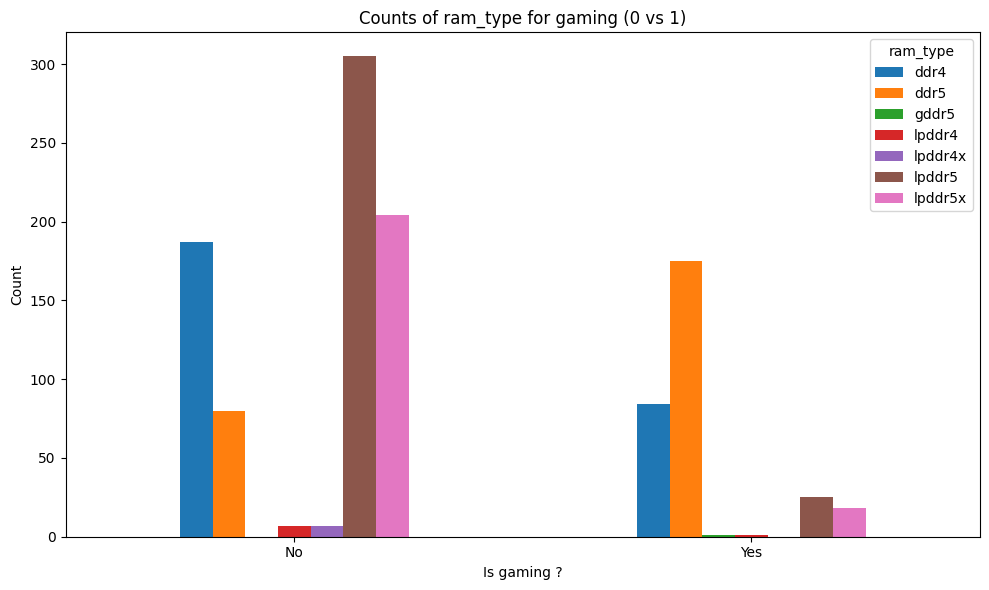

Chi-squared test for gaming and ram_type: Chi2 = 329.5984, p-value = 0.000000
-> Significant association between gaming and ram_type
Contifency table for gaming and os_version:
 os_version  chrome os  free dos  macos  windows 10  windows 11
gaming                                                        
0                   2        12    368           3         405
1                   0         0     17           2         285


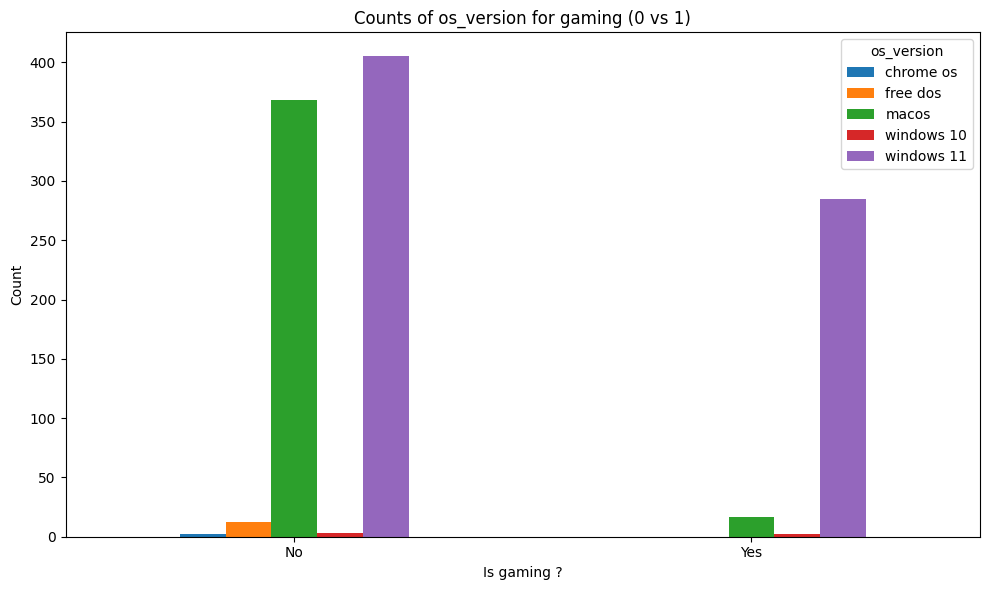

Chi-squared test for gaming and os_version: Chi2 = 173.3893, p-value = 0.000000
-> Significant association between gaming and os_version
Contifency table for gaming and laptop_color:
 laptop_color  be  bạc  cam  hồng  trắng  tím  vàng  xanh dương  xanh lá  xám  \
gaming                                                                         
0              1  240    5     9      6    6    60         104        8  163   
1              1   33    0     0      1    0    15          14        0  110   

laptop_color  đen  
gaming             
0             188  
1             130  


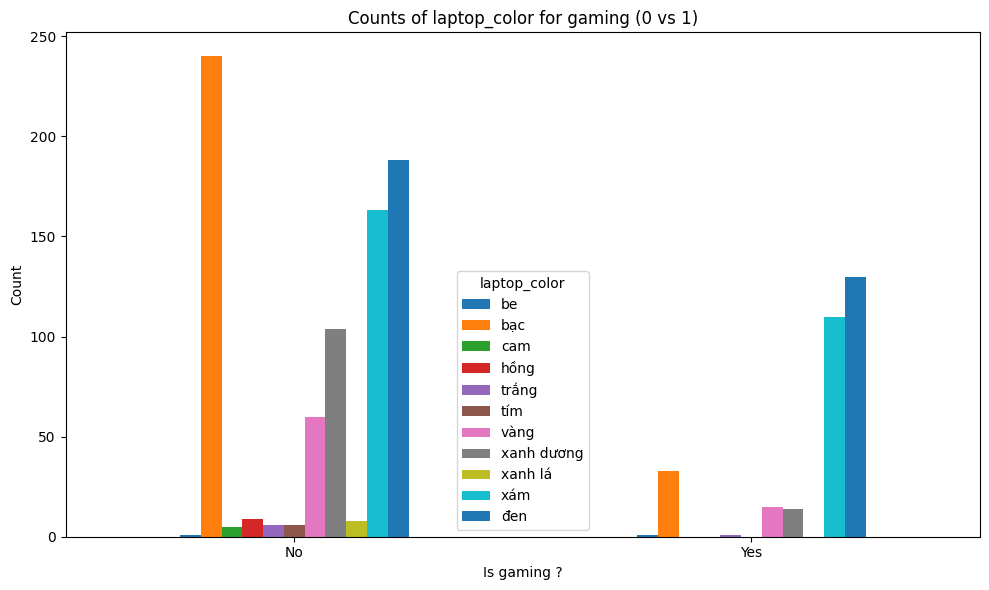

Chi-squared test for gaming and laptop_color: Chi2 = 111.0550, p-value = 0.000000
-> Significant association between gaming and laptop_color
Contifency table for gaming and vga_brand:
 vga_brand  amd  apple  intel  nvidia  qualcomm
gaming                                        
0           46    368    338      28        10
1            8     17     60     218         1


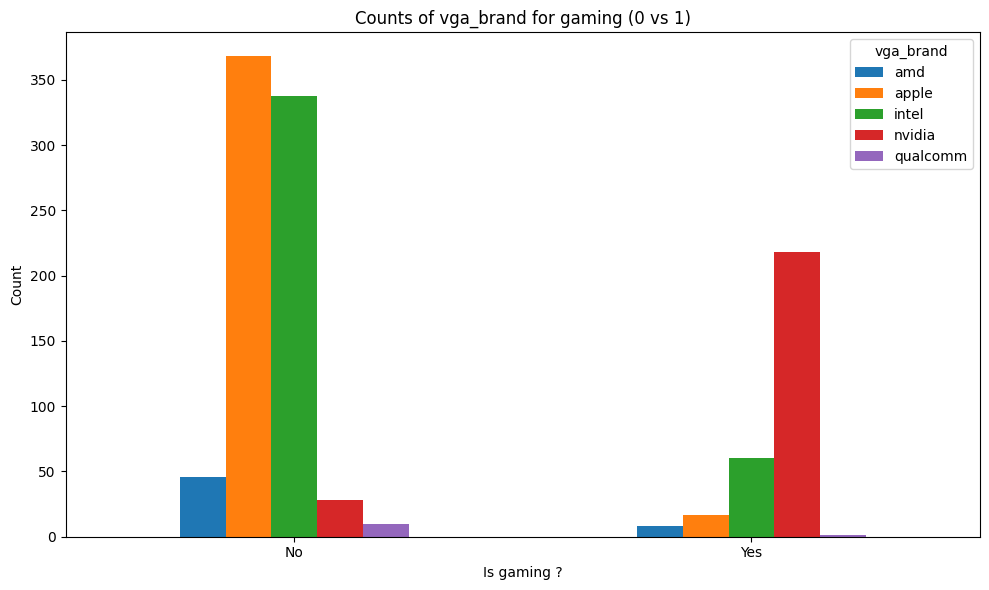

Chi-squared test for gaming and vga_brand: Chi2 = 596.9411, p-value = 0.000000
-> Significant association between gaming and vga_brand
Contifency table for gaming and cpu_series:
 cpu_series  celeron  core 5  core 7  core i3  core i5  core i7  core i9  \
gaming                                                                    
0                 3       8       5       30      134       67        4   
1                 0       1       3        3      104       67        8   

cpu_series  core ultra 5  core ultra 7  core ultra 9  ...  ryzen 9  \
gaming                                                ...            
0                     43            58             9  ...        0   
1                      7            12            15  ...        4   

cpu_series  ryzen ai 5  ryzen ai 7  ryzen ai 9  ryzen ai max+  ryzen r7  \
gaming                                                                    
0                    1           9           2              0         1   
1            

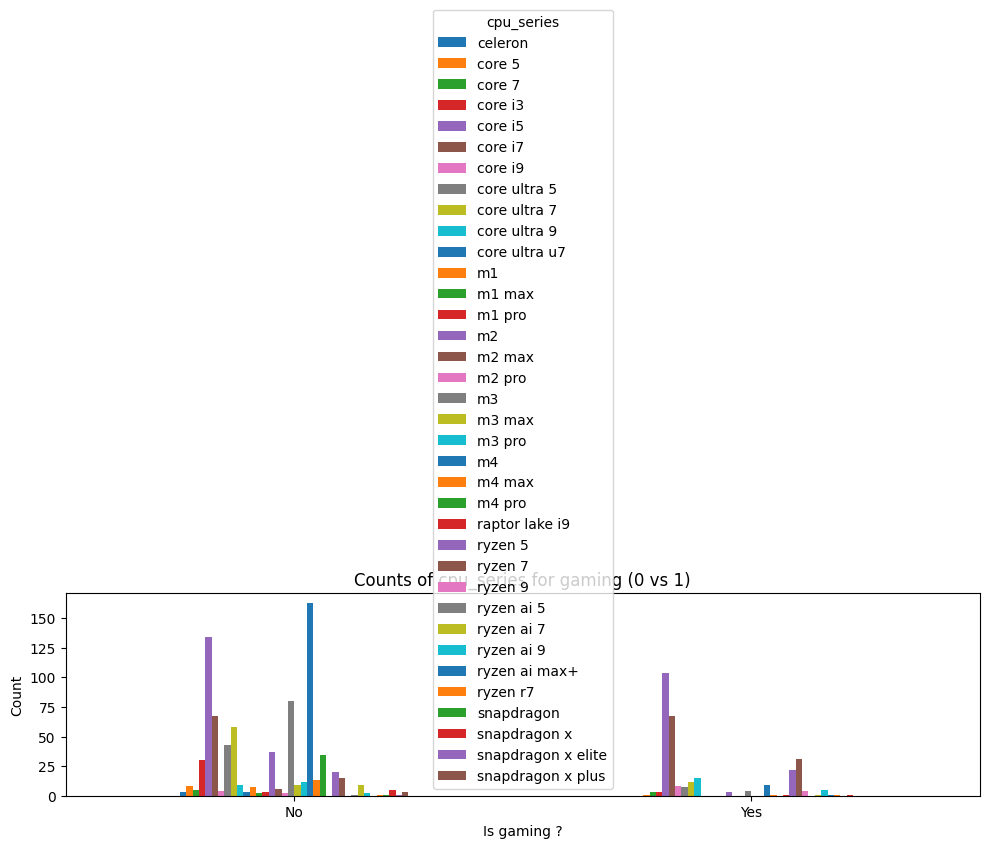

Chi-squared test for gaming and cpu_series: Chi2 = 286.2291, p-value = 0.000000
-> Significant association between gaming and cpu_series
Contifency table for gaming and laptop_camera:
 laptop_camera  full hd   hd
gaming                     
0                  557  233
1                   97  207


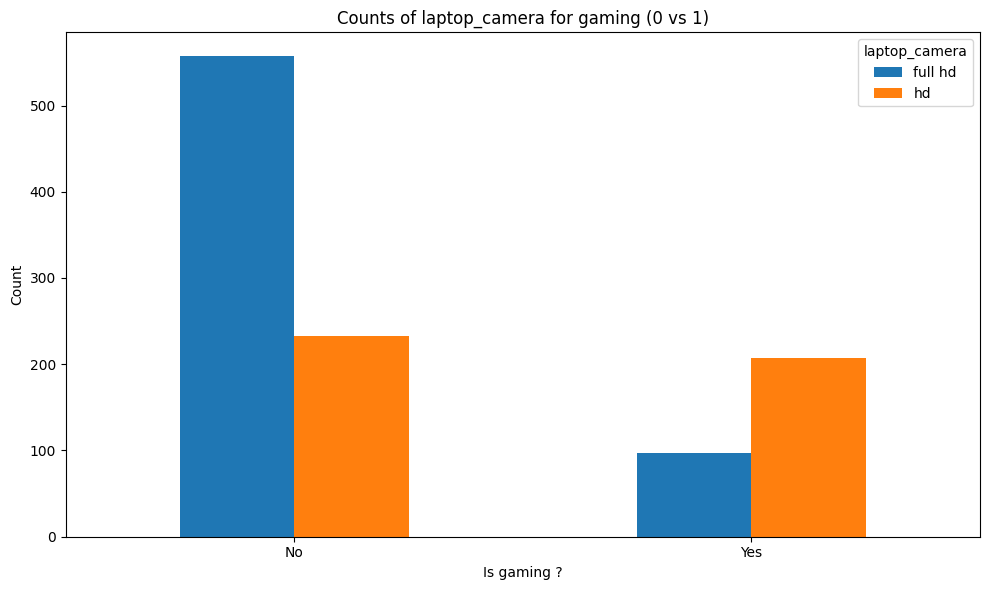

Chi-squared test for gaming and laptop_camera: Chi2 = 134.4269, p-value = 0.000000
-> Significant association between gaming and laptop_camera
Contifency table for gaming and cpu_brand:
 cpu_brand  amd  apple  intel  qualcomm
gaming                                
0           48    368    364        10
1           65     17    221         1


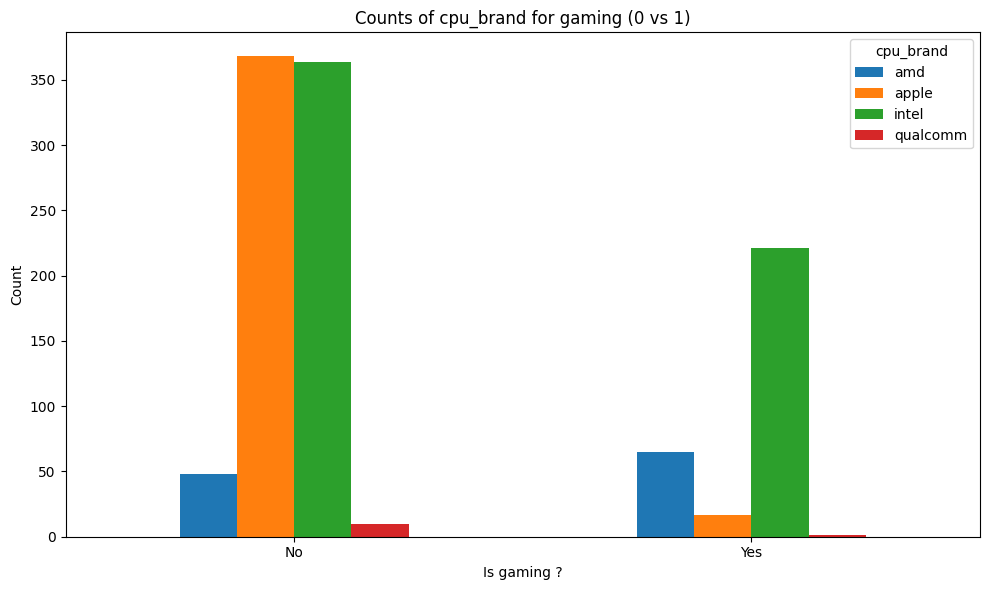

Chi-squared test for gaming and cpu_brand: Chi2 = 185.6078, p-value = 0.000000
-> Significant association between gaming and cpu_brand
Contifency table for gaming and cpu_model:
 cpu_model  1005g1  10300h  1115g4  1135g7  11400h  1155g7  115g4  1165g7  \
gaming                                                                     
0               2       0       3       2       0       1      1       1   
1               0       1       0       0       4       0      0       0   

cpu_model  11800h  1195g7  ...  m4 pro  n305  n4120  n4500  x1  x1 26 100  \
gaming                     ...                                              
0               0       1  ...      34     2      1      2   2          0   
1               2       0  ...       0     0      0      0   0          1   

cpu_model  x1e  x1e 78 100  x1p  x1p 42 100  
gaming                                       
0            1           1    4           2  
1            0           0    0           0  

[2 rows x 114 columns]

<ipython-input-5-3f9f4a22c72a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


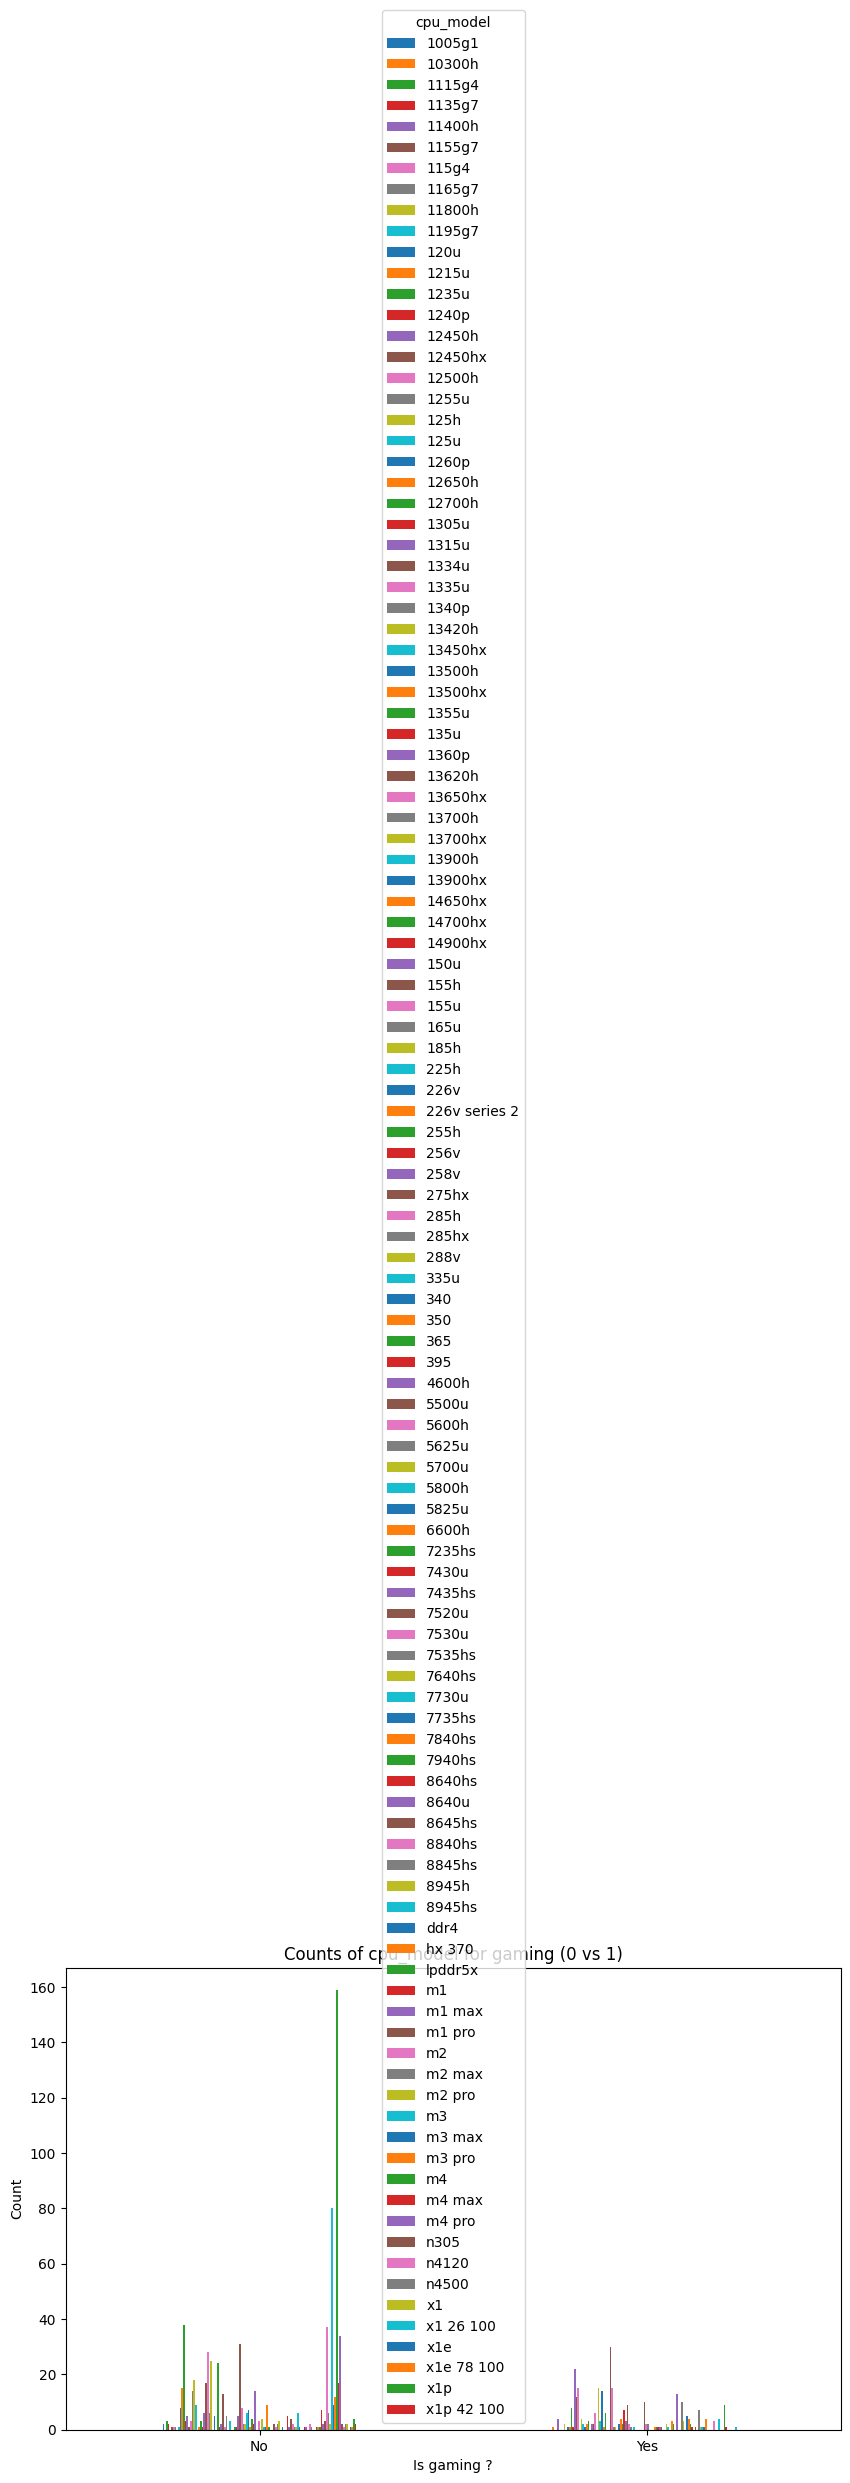

Chi-squared test for gaming and cpu_model: Chi2 = 591.5969, p-value = 0.000000
-> Significant association between gaming and cpu_model
Contifency table for gaming and vga_type:
 vga_type  card rời  card tích hợp
gaming                           
0               56            734
1              221             83


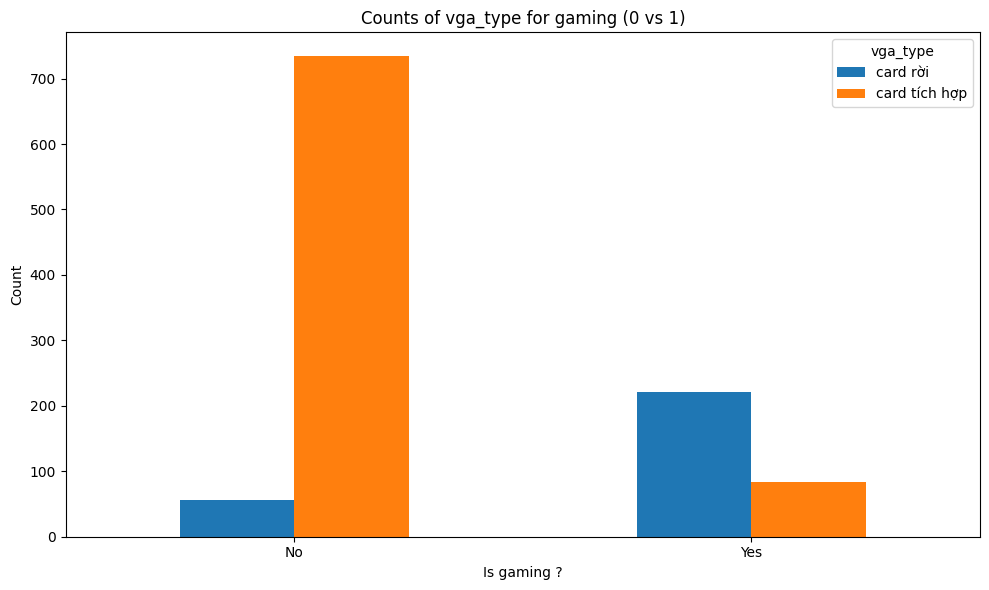

Chi-squared test for gaming and vga_type: Chi2 = 496.2714, p-value = 0.000000
-> Significant association between gaming and vga_type


In [ ]:
basic_eda('gaming')

## Hoc tap - van phong

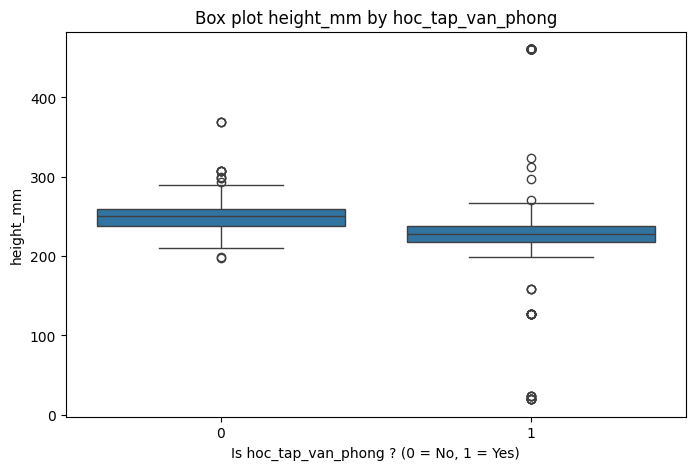

Mann-Whitney U test for height_mm vs hoc_tap_van_phong: U-statistic = 56,660, p-value = 0.0000
-> Significant difference in height_mm between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 227.6
Median for hoc_tap_van_phong = 0: 251.0


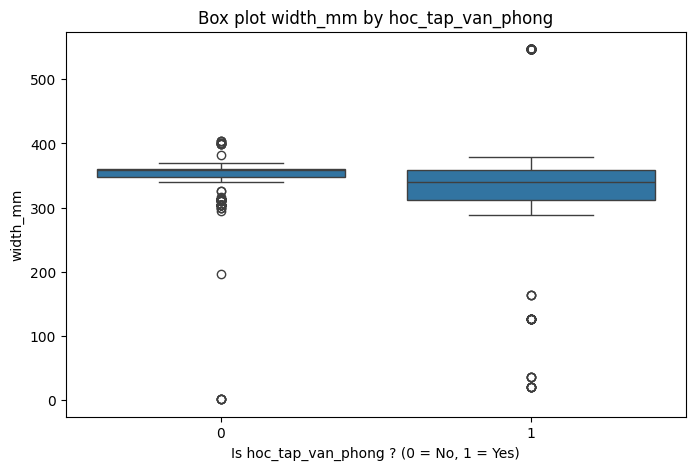

Mann-Whitney U test for width_mm vs hoc_tap_van_phong: U-statistic = 79,028, p-value = 0.0000
-> Significant difference in width_mm between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 340.4
Median for hoc_tap_van_phong = 0: 357.9


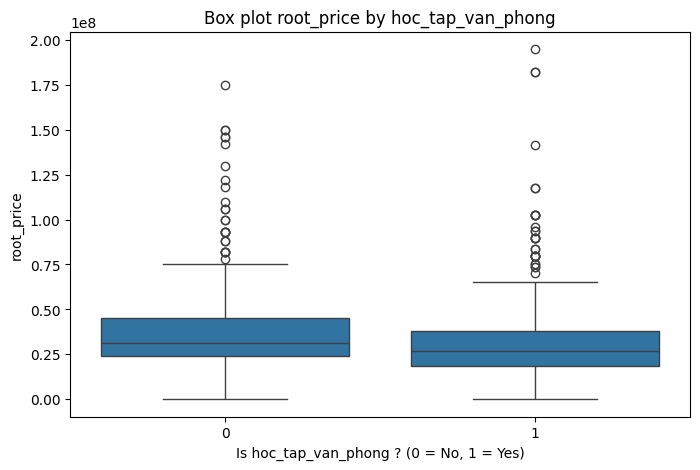

Mann-Whitney U test for root_price vs hoc_tap_van_phong: U-statistic = 83,491, p-value = 0.0000
-> Significant difference in root_price between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 26990000.0
Median for hoc_tap_van_phong = 0: 30990000.0


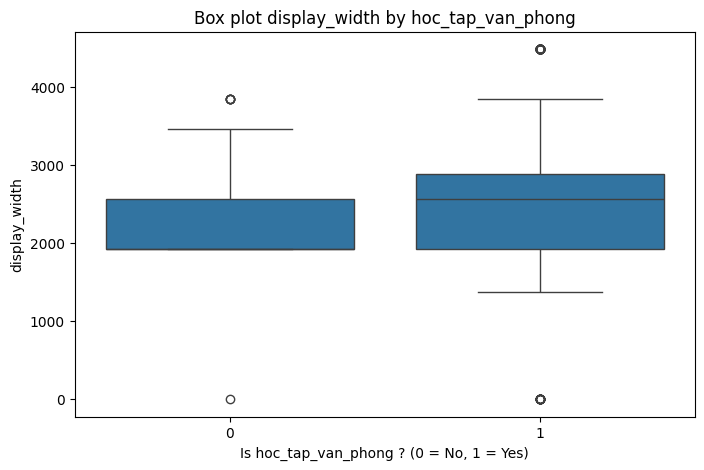

Mann-Whitney U test for display_width vs hoc_tap_van_phong: U-statistic = 124,106, p-value = 0.0029
-> Significant difference in display_width between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 2560.0
Median for hoc_tap_van_phong = 0: 1920.0


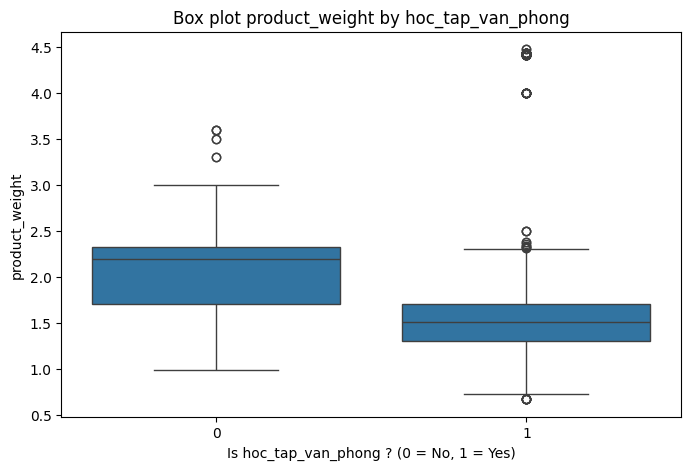

Mann-Whitney U test for product_weight vs hoc_tap_van_phong: U-statistic = 48,702, p-value = 0.0000
-> Significant difference in product_weight between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 1.51
Median for hoc_tap_van_phong = 0: 2.2


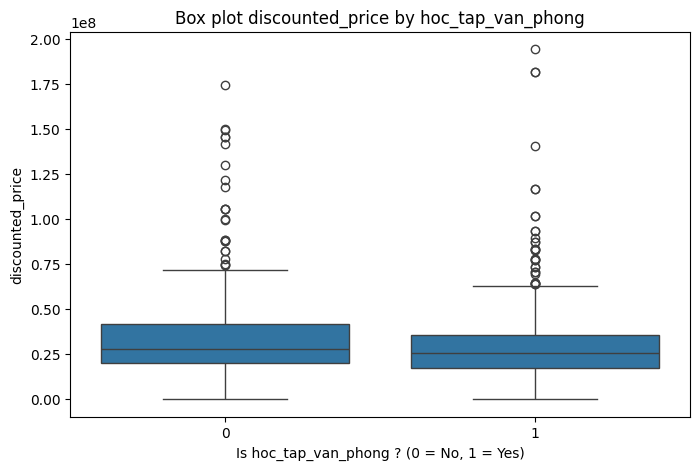

Mann-Whitney U test for discounted_price vs hoc_tap_van_phong: U-statistic = 89,621, p-value = 0.0000
-> Significant difference in discounted_price between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 25490000.0
Median for hoc_tap_van_phong = 0: 28090000.0


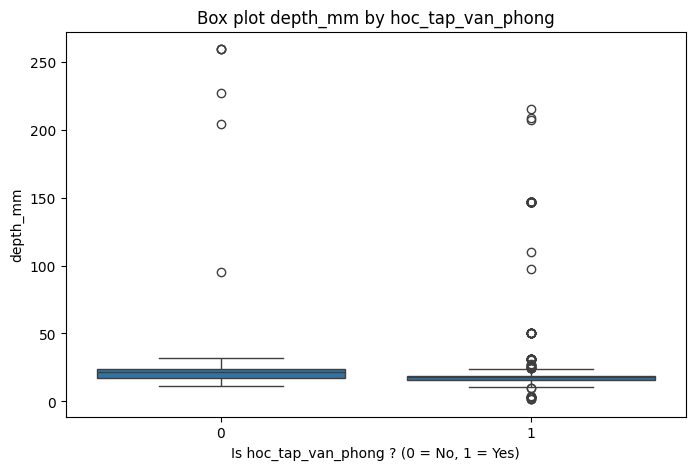

Mann-Whitney U test for depth_mm vs hoc_tap_van_phong: U-statistic = 64,916, p-value = 0.0000
-> Significant difference in depth_mm between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 17.8
Median for hoc_tap_van_phong = 0: 22.0


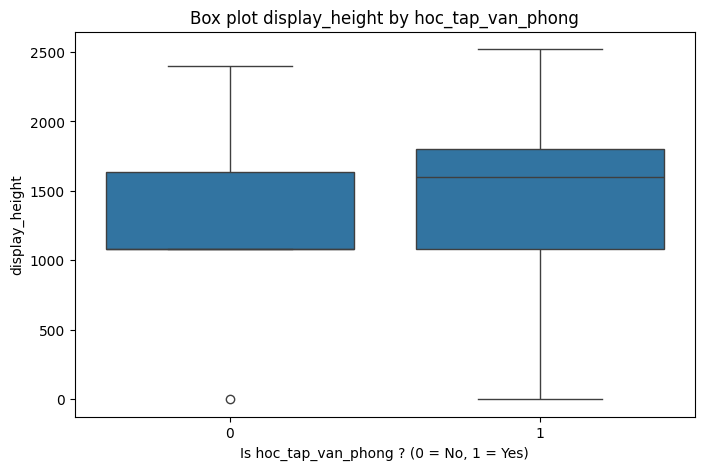

Mann-Whitney U test for display_height vs hoc_tap_van_phong: U-statistic = 130,834, p-value = 0.0000
-> Significant difference in display_height between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 1600.0
Median for hoc_tap_van_phong = 0: 1080.0


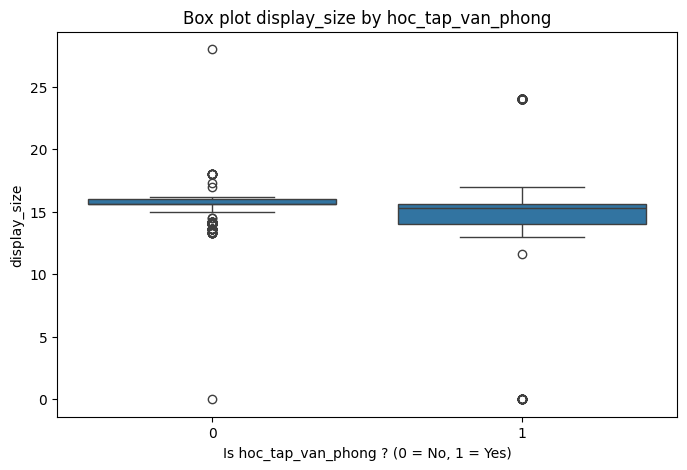

Mann-Whitney U test for display_size vs hoc_tap_van_phong: U-statistic = 75,190, p-value = 0.0000
-> Significant difference in display_size between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 15.3
Median for hoc_tap_van_phong = 0: 15.6


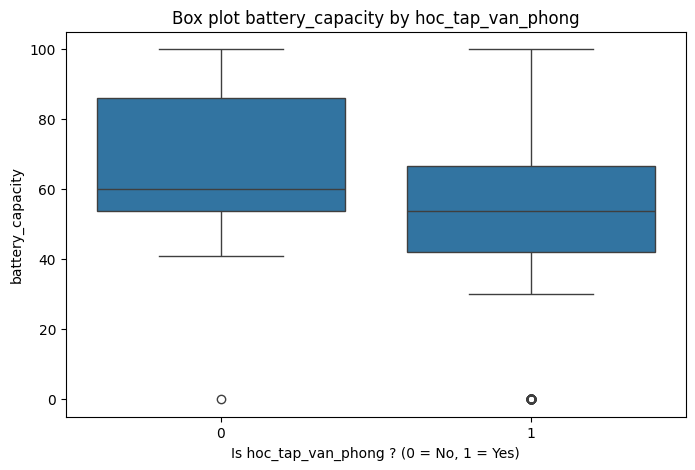

Mann-Whitney U test for battery_capacity vs hoc_tap_van_phong: U-statistic = 64,996, p-value = 0.0000
-> Significant difference in battery_capacity between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 53.8
Median for hoc_tap_van_phong = 0: 60.0


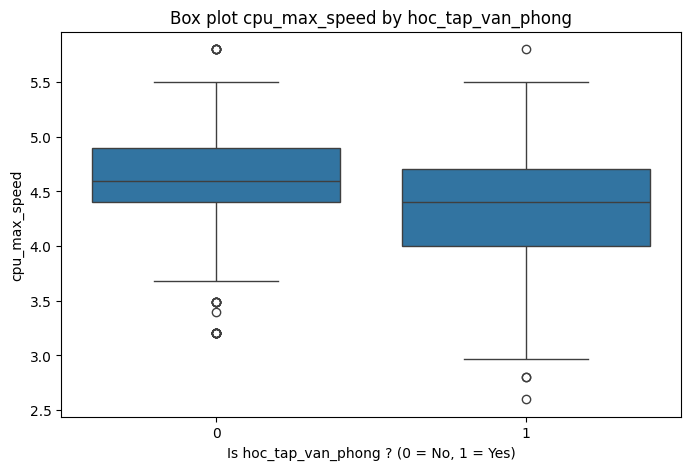

Mann-Whitney U test for cpu_max_speed vs hoc_tap_van_phong: U-statistic = 80,263, p-value = 0.0000
-> Significant difference in cpu_max_speed between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 4.4
Median for hoc_tap_van_phong = 0: 4.593877792358398


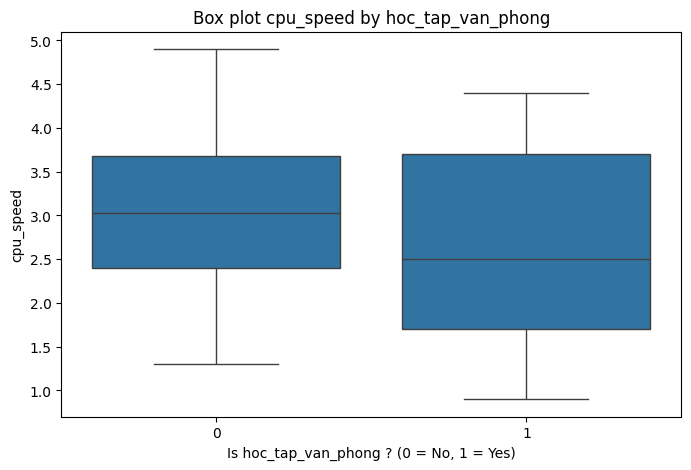

Mann-Whitney U test for cpu_speed vs hoc_tap_van_phong: U-statistic = 90,888, p-value = 0.0000
-> Significant difference in cpu_speed between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 2.5
Median for hoc_tap_van_phong = 0: 3.0307650566101074


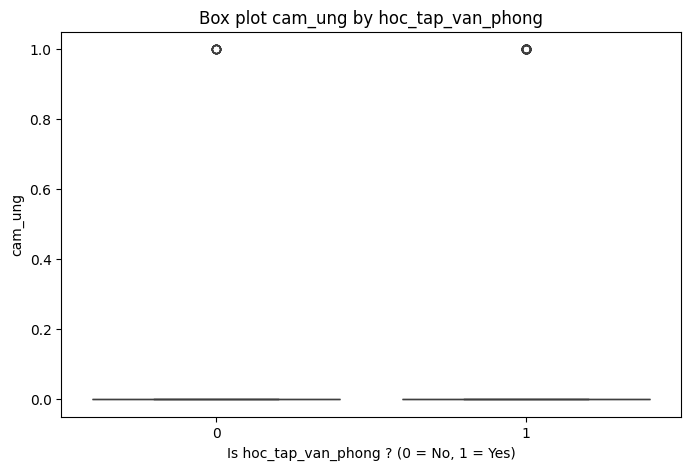

Mann-Whitney U test for cam_ung vs hoc_tap_van_phong: U-statistic = 112,560, p-value = 0.4768
-> No significant different


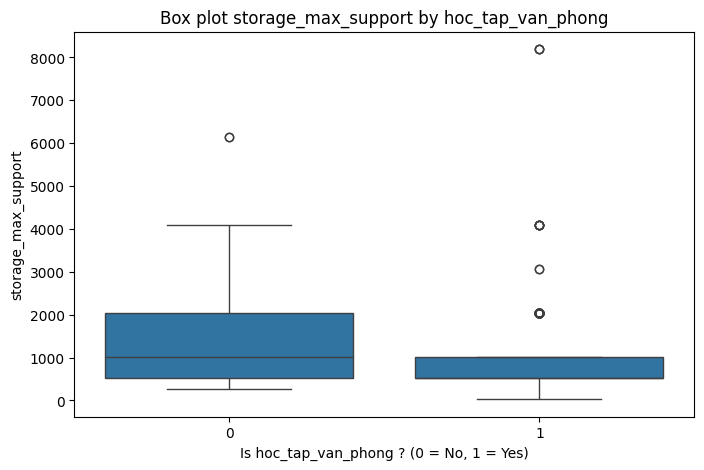

Mann-Whitney U test for storage_max_support vs hoc_tap_van_phong: U-statistic = 77,994, p-value = 0.0000
-> Significant difference in storage_max_support between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 512.0
Median for hoc_tap_van_phong = 0: 1024.0


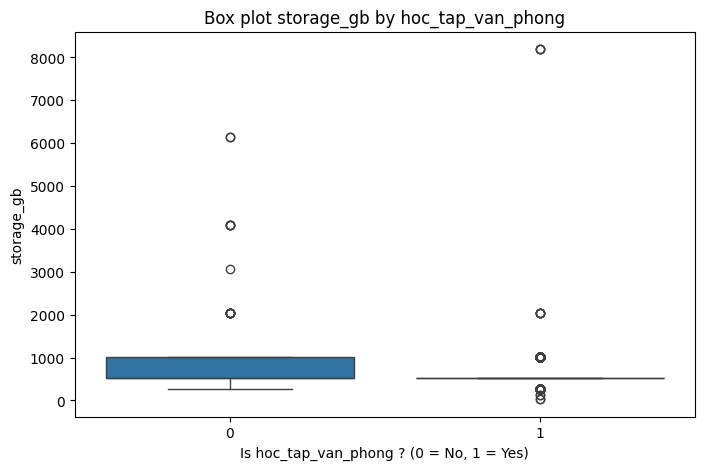

Mann-Whitney U test for storage_gb vs hoc_tap_van_phong: U-statistic = 91,818, p-value = 0.0000
-> Significant difference in storage_gb between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 512.0
Median for hoc_tap_van_phong = 0: 512.0


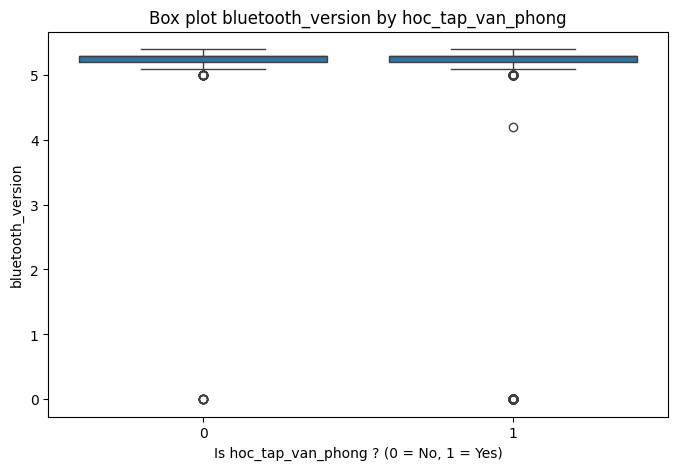

Mann-Whitney U test for bluetooth_version vs hoc_tap_van_phong: U-statistic = 108,420, p-value = 0.4524
-> No significant different


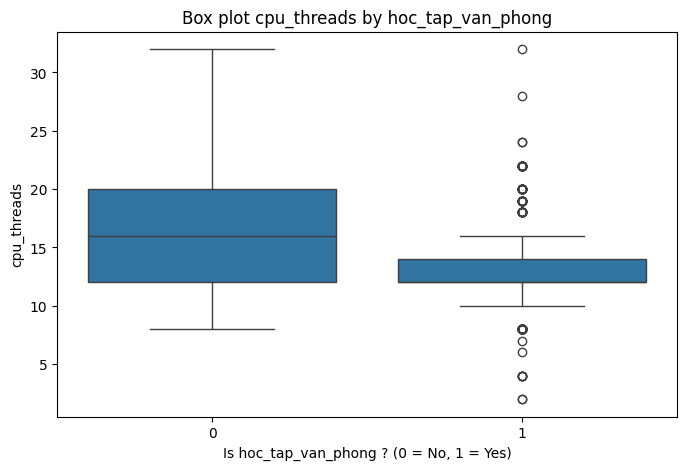

Mann-Whitney U test for cpu_threads vs hoc_tap_van_phong: U-statistic = 60,264, p-value = 0.0000
-> Significant difference in cpu_threads between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 12.0
Median for hoc_tap_van_phong = 0: 16.0


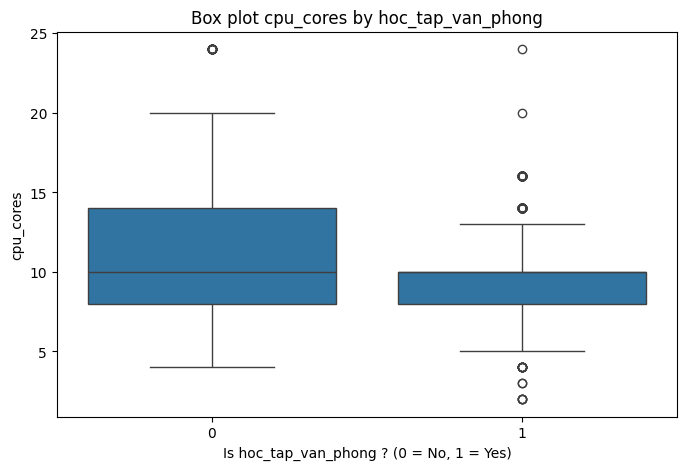

Mann-Whitney U test for cpu_cores vs hoc_tap_van_phong: U-statistic = 98,120, p-value = 0.0021
-> Significant difference in cpu_cores between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 10.0
Median for hoc_tap_van_phong = 0: 10.0


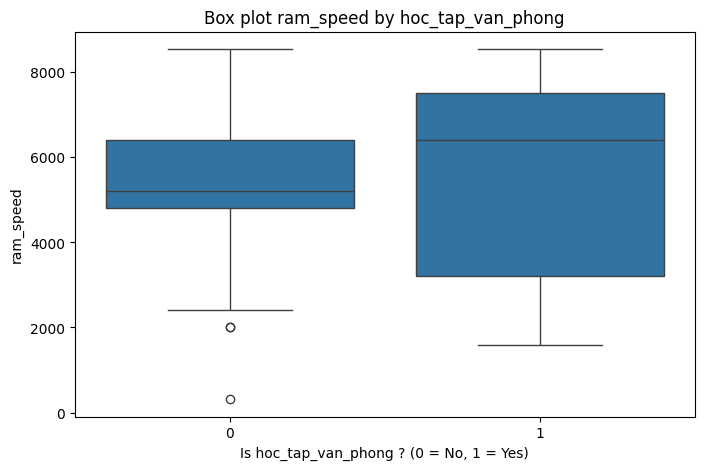

Mann-Whitney U test for ram_speed vs hoc_tap_van_phong: U-statistic = 126,752, p-value = 0.0006
-> Significant difference in ram_speed between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 6400.0
Median for hoc_tap_van_phong = 0: 5200.0


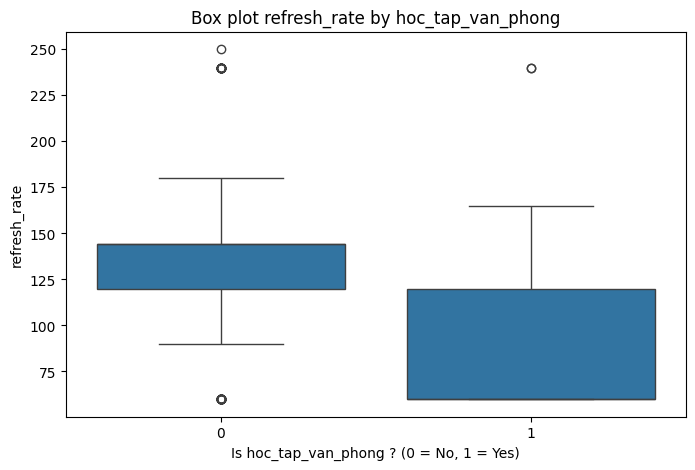

Mann-Whitney U test for refresh_rate vs hoc_tap_van_phong: U-statistic = 31,184, p-value = 0.0000
-> Significant difference in refresh_rate between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 60.0
Median for hoc_tap_van_phong = 0: 144.0


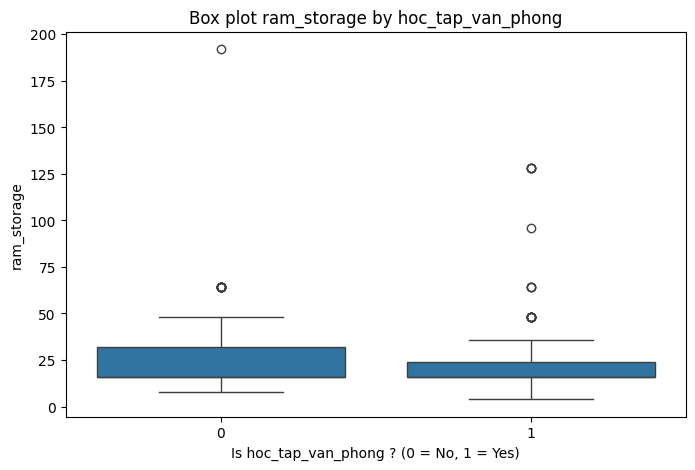

Mann-Whitney U test for ram_storage vs hoc_tap_van_phong: U-statistic = 102,290, p-value = 0.0218
-> Significant difference in ram_storage between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 16.0
Median for hoc_tap_van_phong = 0: 16.0


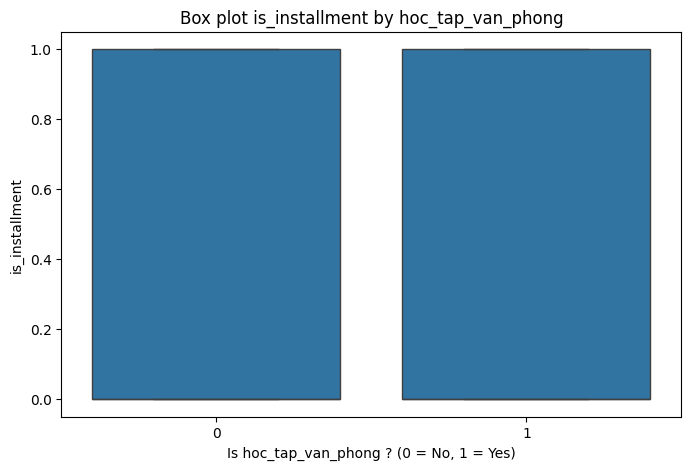

Mann-Whitney U test for is_installment vs hoc_tap_van_phong: U-statistic = 108,256, p-value = 0.3910
-> No significant different


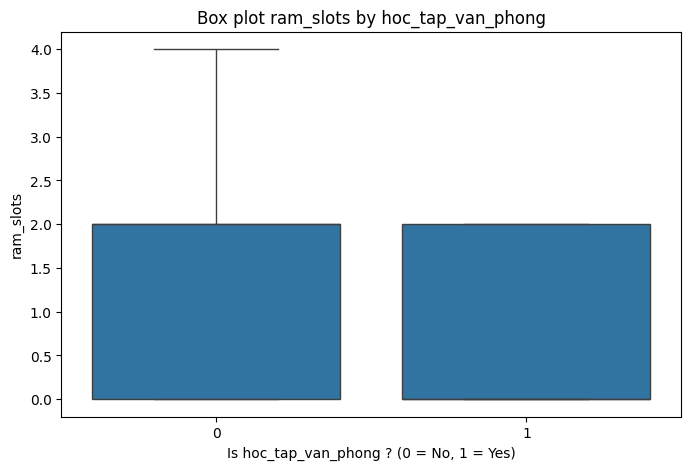

Mann-Whitney U test for ram_slots vs hoc_tap_van_phong: U-statistic = 73,202, p-value = 0.0000
-> Significant difference in ram_slots between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 0.0
Median for hoc_tap_van_phong = 0: 2.0


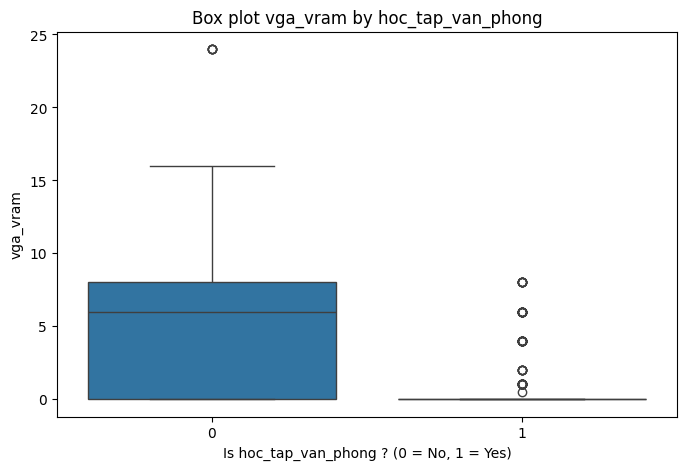

Mann-Whitney U test for vga_vram vs hoc_tap_van_phong: U-statistic = 35,504, p-value = 0.0000
-> Significant difference in vga_vram between laptop that are 'hoc_tap_van_phong' and those are not
Median for hoc_tap_van_phong = 1: 0.0
Median for hoc_tap_van_phong = 0: 6.0
Contifency table for hoc_tap_van_phong and material:
 material           vỏ kim loại  vỏ nhựa  vỏ nhựa - nắp lưng kim loại
hoc_tap_van_phong                                                   
0                           87      139                           45
1                          527      248                           48


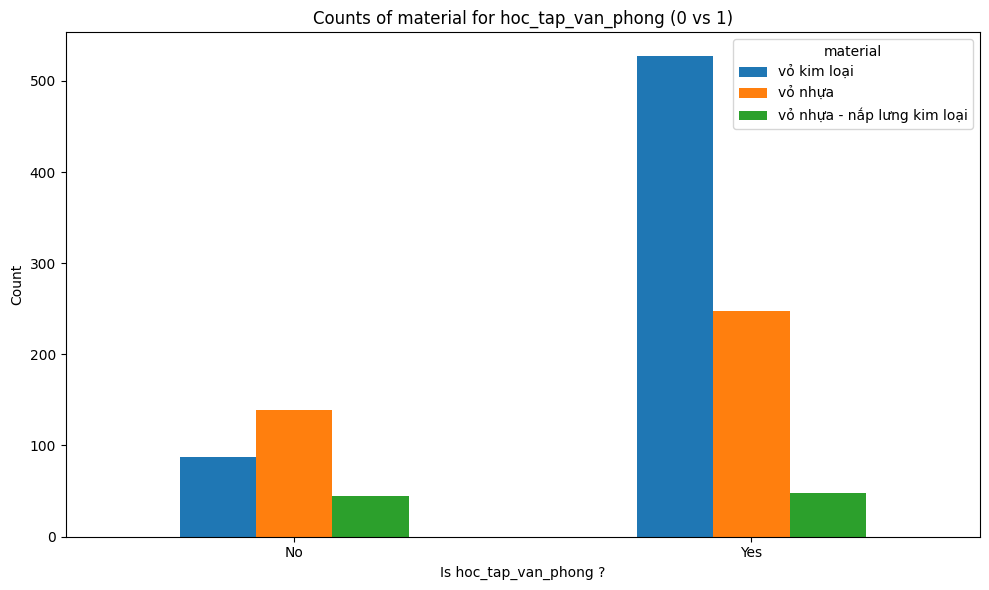

Chi-squared test for hoc_tap_van_phong and material: Chi2 = 90.6665, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and material
Contifency table for hoc_tap_van_phong and manufacturer:
 manufacturer       acer  apple  asus  dell  gigabyte  hp  huawei  lenovo  lg  \
hoc_tap_van_phong                                                              
0                    32     59    67     6        11  18       0      31   0   
1                    53    326   128    82         1  72       2     102  14   

manufacturer       masstel  msi  samsung  vaio  
hoc_tap_van_phong                               
0                        0   47        0     0  
1                        1   39        2     1  


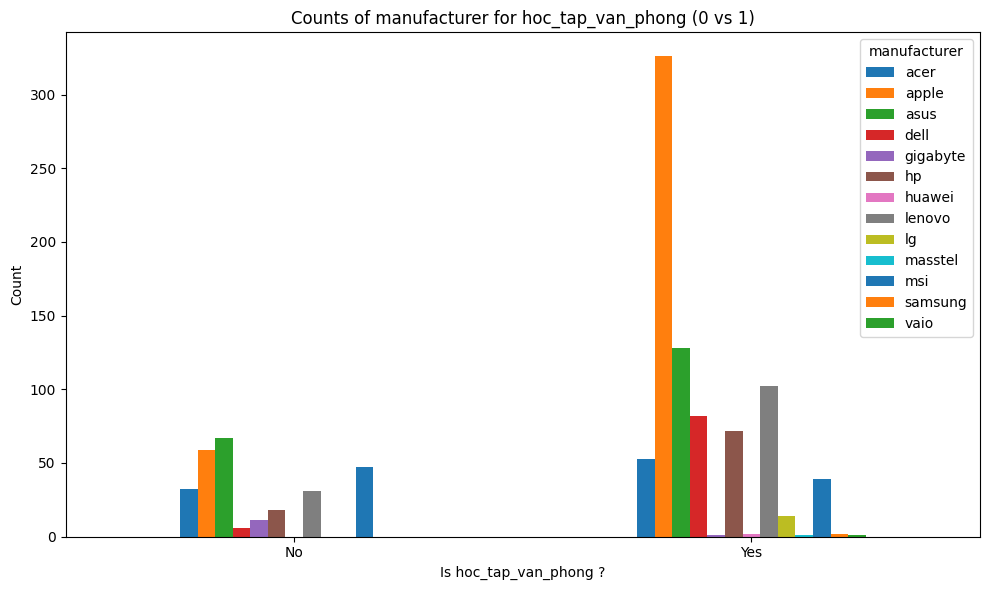

Chi-squared test for hoc_tap_van_phong and manufacturer: Chi2 = 128.6942, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and manufacturer
Contifency table for hoc_tap_van_phong and ram_type:
 ram_type           ddr4  ddr5  gddr5  lpddr4  lpddr4x  lpddr5  lpddr5x
hoc_tap_van_phong                                                     
0                    43   149      1       3        3      42       30
1                   228   106      0       5        4     288      192


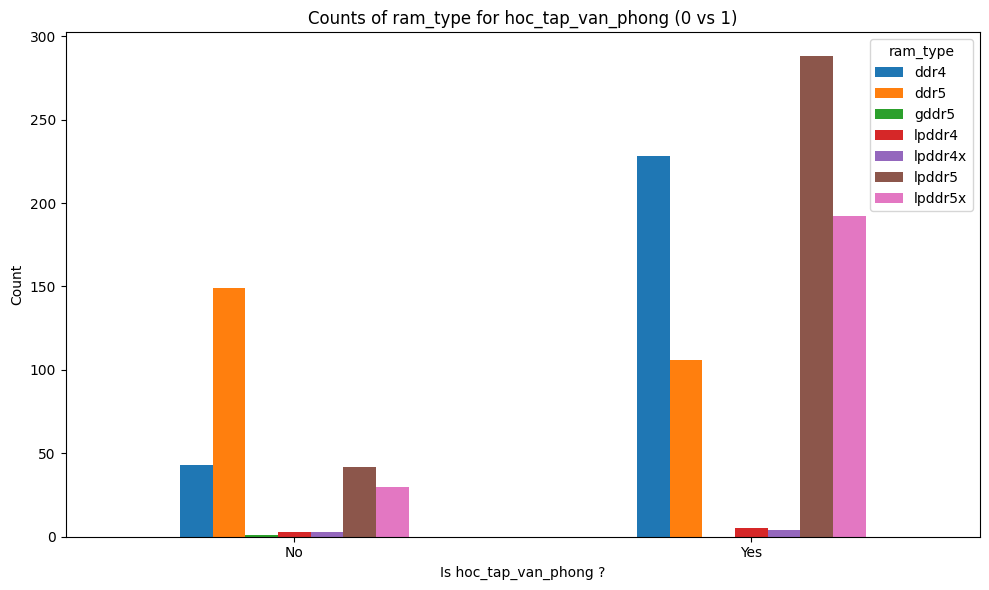

Chi-squared test for hoc_tap_van_phong and ram_type: Chi2 = 212.3138, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and ram_type
Contifency table for hoc_tap_van_phong and os_version:
 os_version         chrome os  free dos  macos  windows 10  windows 11
hoc_tap_van_phong                                                    
0                          0         0     59           2         210
1                          2        12    326           3         480


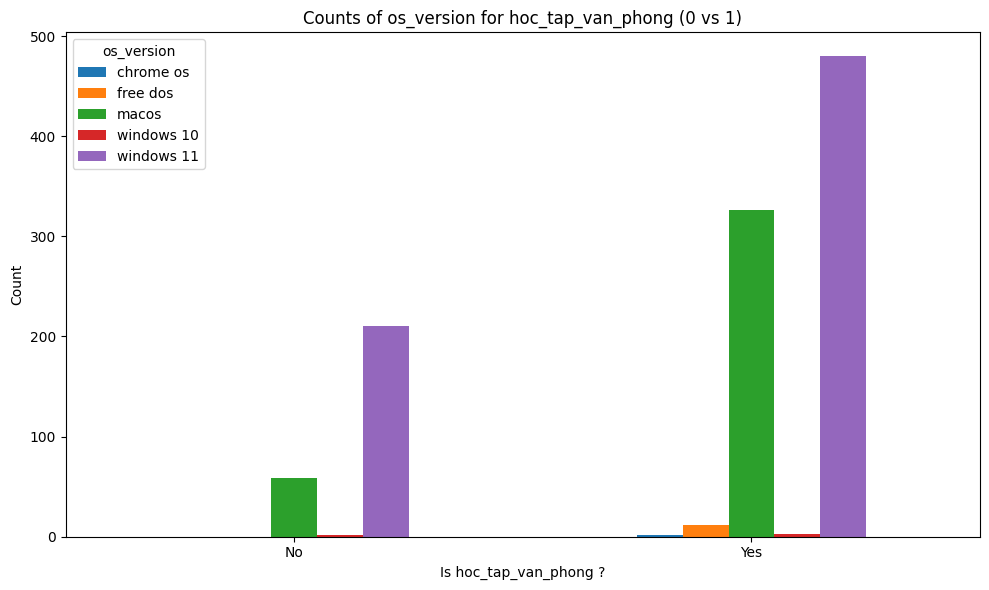

Chi-squared test for hoc_tap_van_phong and os_version: Chi2 = 35.5450, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and os_version
Contifency table for hoc_tap_van_phong and laptop_color:
 laptop_color       be  bạc  cam  hồng  trắng  tím  vàng  xanh dương  xanh lá  \
hoc_tap_van_phong                                                              
0                   0   27    0     0      1    0     6           8        0   
1                   2  246    5     9      6    6    69         110        8   

laptop_color       xám  đen  
hoc_tap_van_phong            
0                   98  131  
1                  175  187  


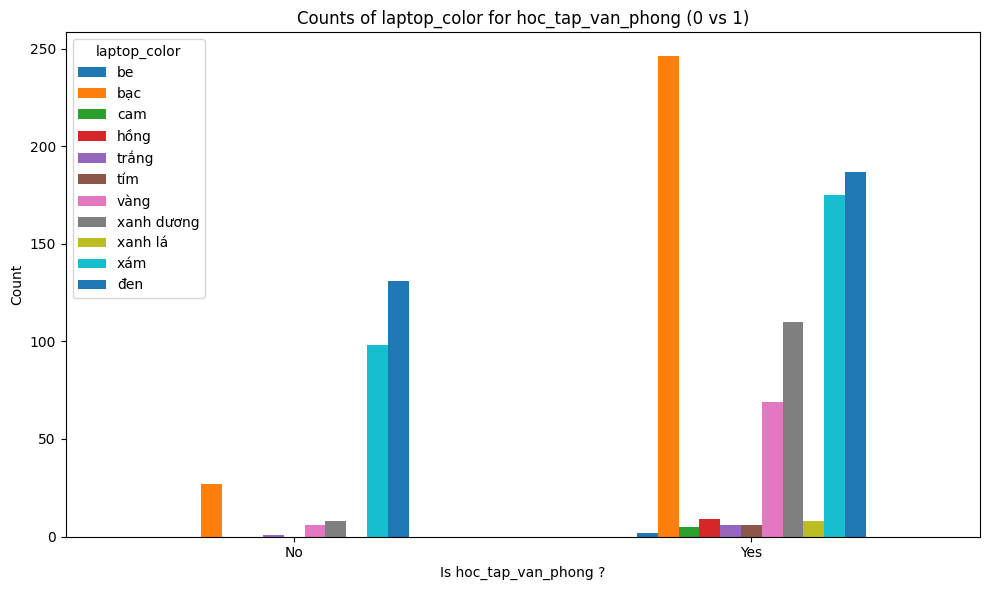

Chi-squared test for hoc_tap_van_phong and laptop_color: Chi2 = 138.7145, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and laptop_color
Contifency table for hoc_tap_van_phong and vga_brand:
 vga_brand          amd  apple  intel  nvidia  qualcomm
hoc_tap_van_phong                                     
0                    3     59     11     197         1
1                   51    326    387      49        10


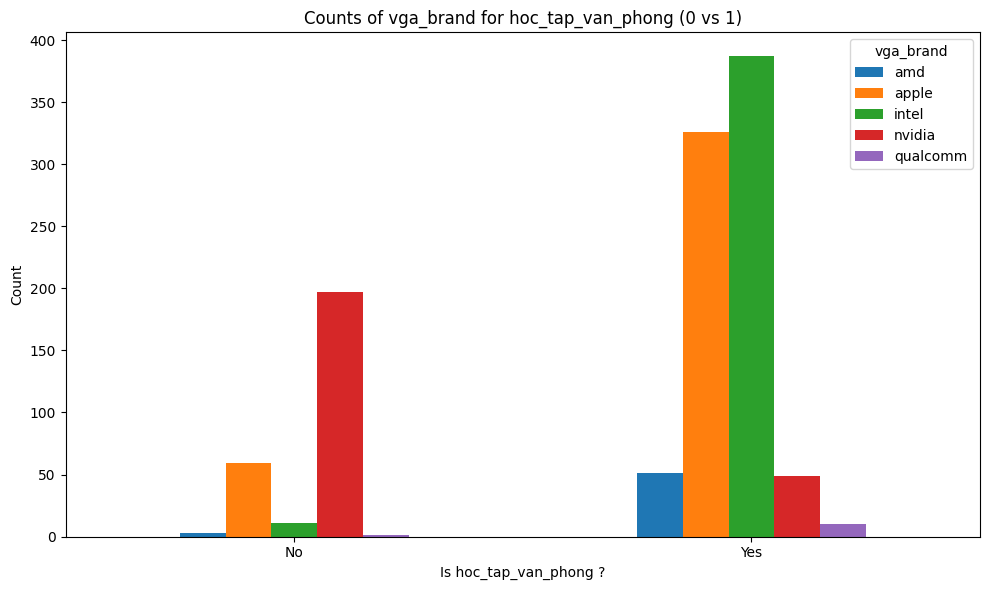

Chi-squared test for hoc_tap_van_phong and vga_brand: Chi2 = 537.8665, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and vga_brand
Contifency table for hoc_tap_van_phong and cpu_series:
 cpu_series         celeron  core 5  core 7  core i3  core i5  core i7  \
hoc_tap_van_phong                                                       
0                        0       0       0        0       65       52   
1                        3       9       8       33      173       82   

cpu_series         core i9  core ultra 5  core ultra 7  core ultra 9  ...  \
hoc_tap_van_phong                                                     ...   
0                        8             3            10            15  ...   
1                        4            47            60             9  ...   

cpu_series         ryzen 9  ryzen ai 5  ryzen ai 7  ryzen ai 9  ryzen ai max+  \
hoc_tap_van_phong                                                               
0                      

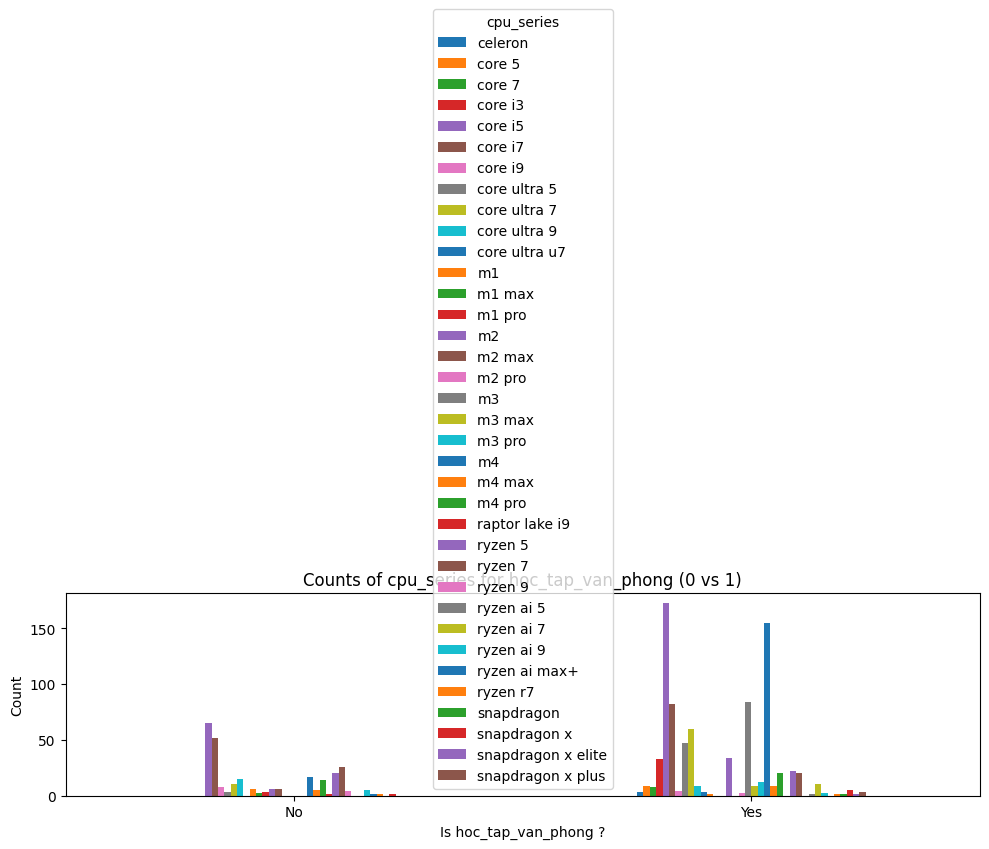

Chi-squared test for hoc_tap_van_phong and cpu_series: Chi2 = 256.7636, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and cpu_series
Contifency table for hoc_tap_van_phong and laptop_camera:
 laptop_camera      full hd   hd
hoc_tap_van_phong              
0                      114  157
1                      540  283


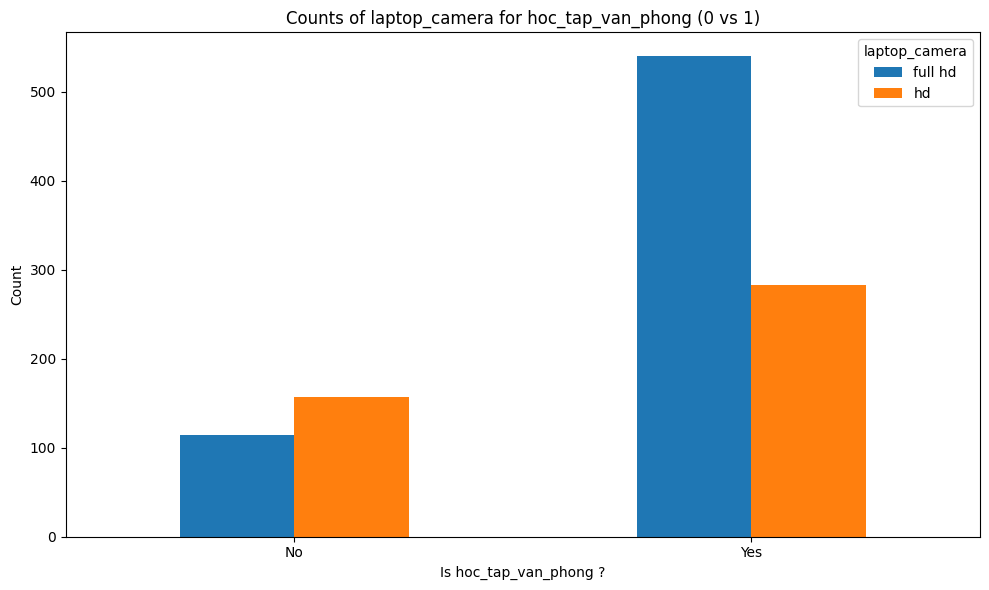

Chi-squared test for hoc_tap_van_phong and laptop_camera: Chi2 = 46.0405, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and laptop_camera
Contifency table for hoc_tap_van_phong and cpu_brand:
 cpu_brand          amd  apple  intel  qualcomm
hoc_tap_van_phong                             
0                   57     59    154         1
1                   56    326    431        10


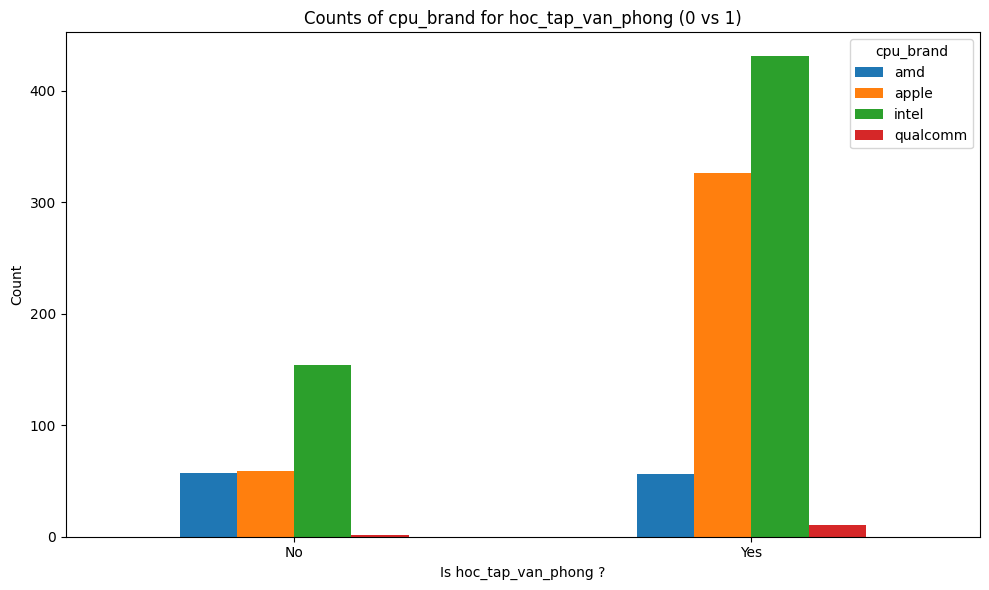

Chi-squared test for hoc_tap_van_phong and cpu_brand: Chi2 = 60.6064, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and cpu_brand
Contifency table for hoc_tap_van_phong and cpu_model:
 cpu_model          1005g1  10300h  1115g4  1135g7  11400h  1155g7  115g4  \
hoc_tap_van_phong                                                          
0                       0       1       0       0       4       0      0   
1                       2       0       3       2       0       1      1   

cpu_model          1165g7  11800h  1195g7  ...  m4 pro  n305  n4120  n4500  \
hoc_tap_van_phong                          ...                               
0                       0       2       0  ...      14     0      0      0   
1                       1       0       1  ...      20     2      1      2   

cpu_model          x1  x1 26 100  x1e  x1e 78 100  x1p  x1p 42 100  
hoc_tap_van_phong                                                   
0                   0          0 

<ipython-input-5-3f9f4a22c72a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


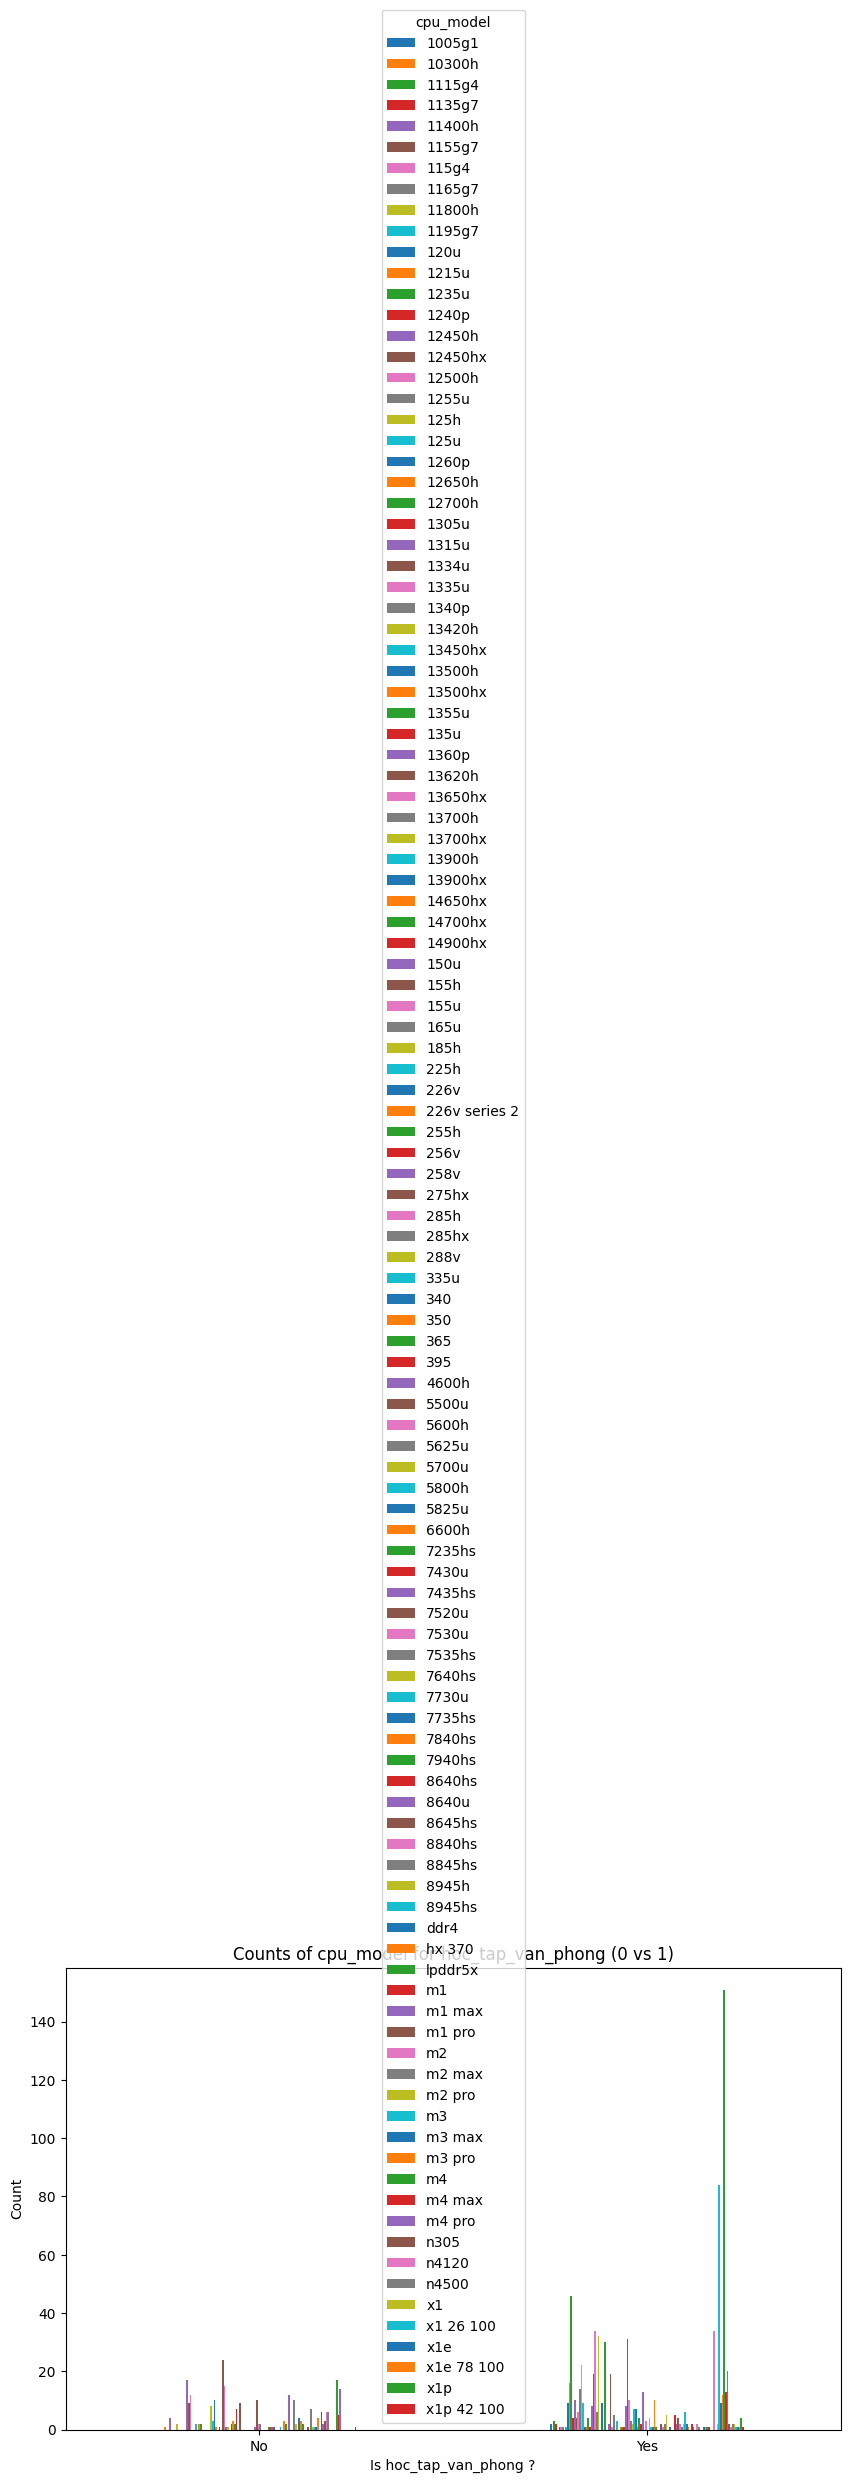

Chi-squared test for hoc_tap_van_phong and cpu_model: Chi2 = 588.2847, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and cpu_model
Contifency table for hoc_tap_van_phong and vga_type:
 vga_type           card rời  card tích hợp
hoc_tap_van_phong                         
0                       200             71
1                        77            746


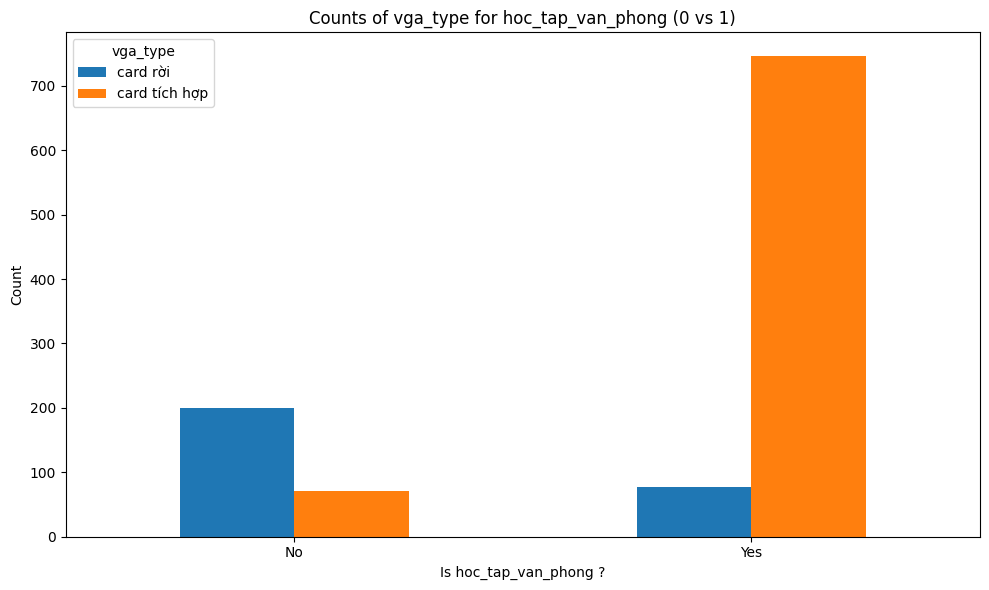

Chi-squared test for hoc_tap_van_phong and vga_type: Chi2 = 444.3728, p-value = 0.000000
-> Significant association between hoc_tap_van_phong and vga_type


In [ ]:
basic_eda('hoc_tap_van_phong')

## Sang tao noi dung

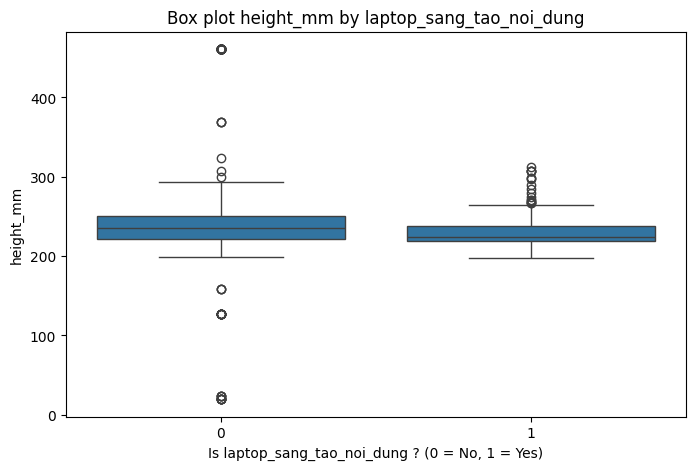

Mann-Whitney U test for height_mm vs laptop_sang_tao_noi_dung: U-statistic = 110,276, p-value = 0.0000
-> Significant difference in height_mm between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 224.0
Median for laptop_sang_tao_noi_dung = 0: 235.6


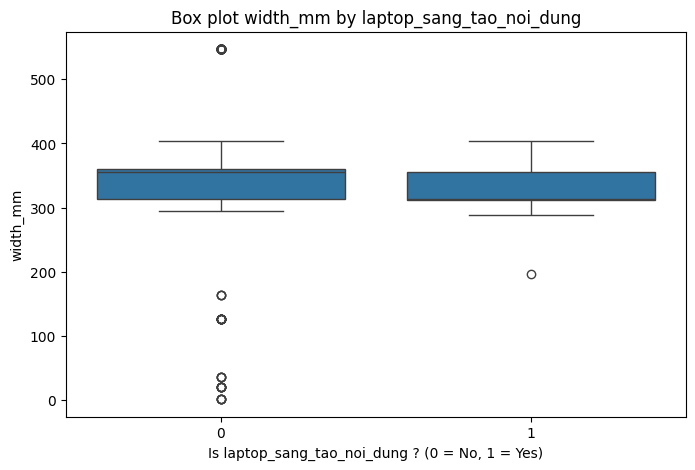

Mann-Whitney U test for width_mm vs laptop_sang_tao_noi_dung: U-statistic = 95,227, p-value = 0.0000
-> Significant difference in width_mm between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 313.7
Median for laptop_sang_tao_noi_dung = 0: 355.0


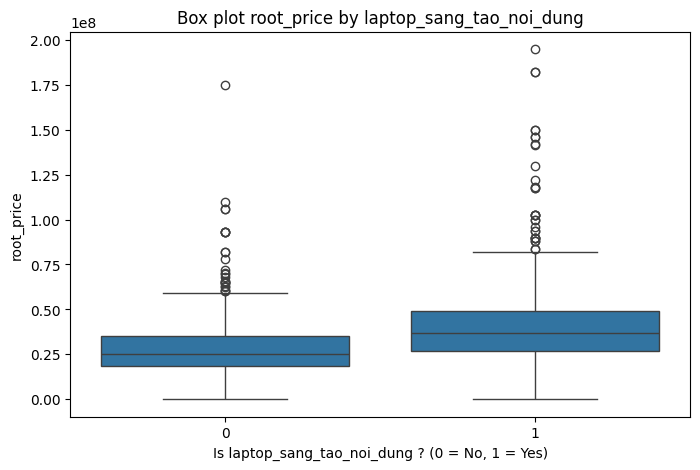

Mann-Whitney U test for root_price vs laptop_sang_tao_noi_dung: U-statistic = 188,281, p-value = 0.0000
-> Significant difference in root_price between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 36990000.0
Median for laptop_sang_tao_noi_dung = 0: 24990000.0


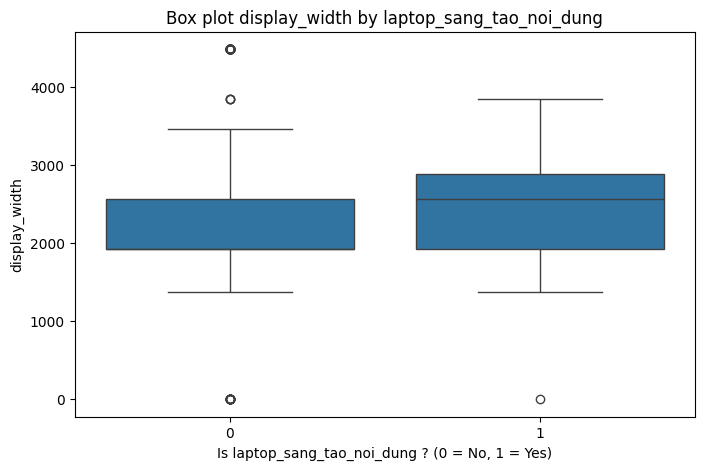

Mann-Whitney U test for display_width vs laptop_sang_tao_noi_dung: U-statistic = 182,230, p-value = 0.0000
-> Significant difference in display_width between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 2560.0
Median for laptop_sang_tao_noi_dung = 0: 1920.0


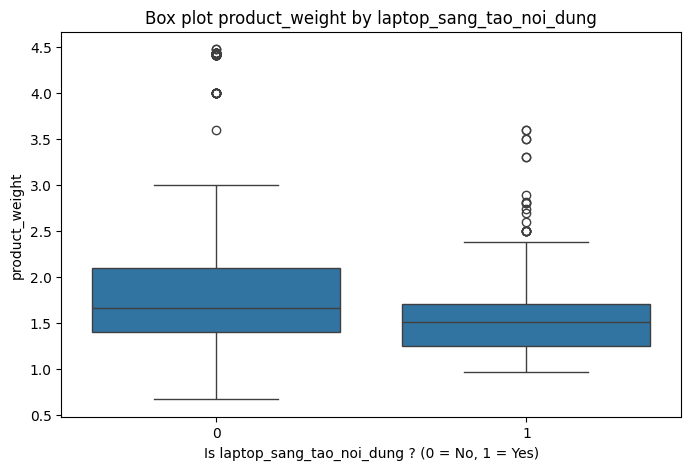

Mann-Whitney U test for product_weight vs laptop_sang_tao_noi_dung: U-statistic = 104,184, p-value = 0.0000
-> Significant difference in product_weight between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 1.51
Median for laptop_sang_tao_noi_dung = 0: 1.66


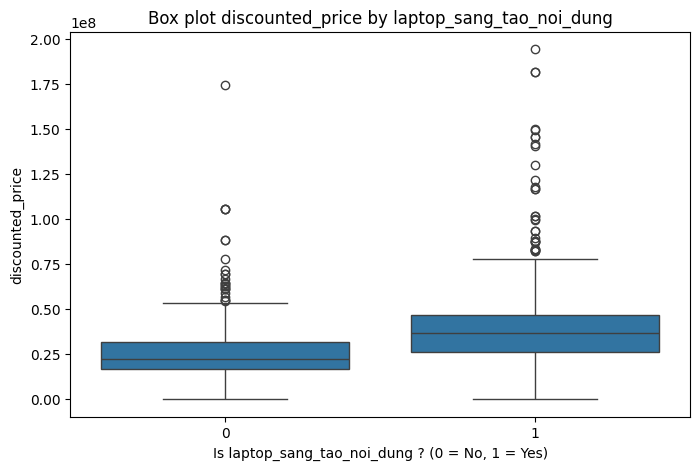

Mann-Whitney U test for discounted_price vs laptop_sang_tao_noi_dung: U-statistic = 200,751, p-value = 0.0000
-> Significant difference in discounted_price between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 36490000.0
Median for laptop_sang_tao_noi_dung = 0: 22131508.0


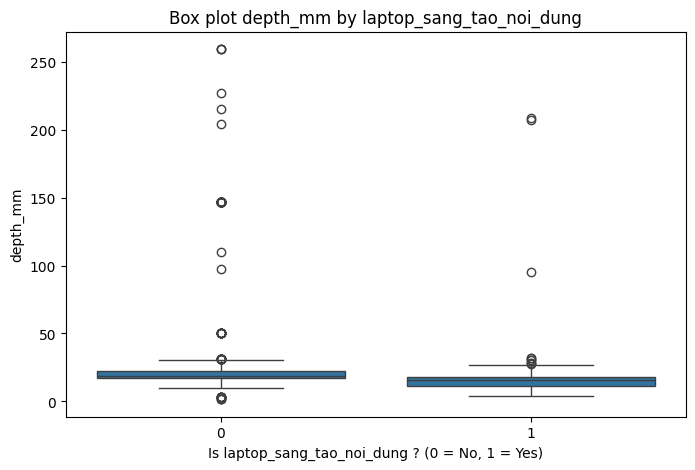

Mann-Whitney U test for depth_mm vs laptop_sang_tao_noi_dung: U-statistic = 70,744, p-value = 0.0000
-> Significant difference in depth_mm between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 15.5
Median for laptop_sang_tao_noi_dung = 0: 18.6


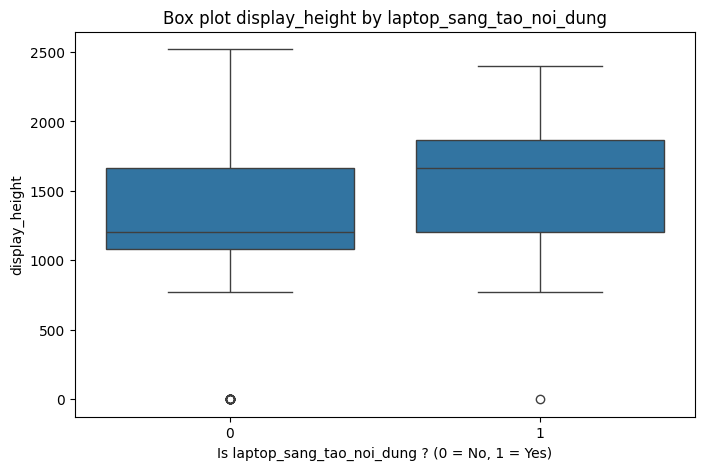

Mann-Whitney U test for display_height vs laptop_sang_tao_noi_dung: U-statistic = 183,436, p-value = 0.0000
-> Significant difference in display_height between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 1664.0
Median for laptop_sang_tao_noi_dung = 0: 1200.0


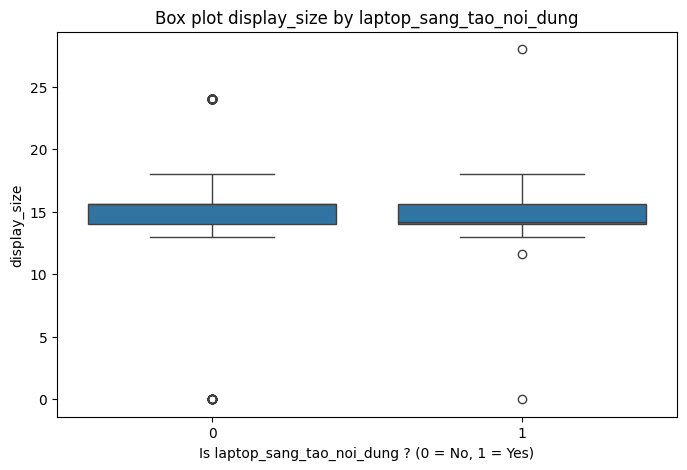

Mann-Whitney U test for display_size vs laptop_sang_tao_noi_dung: U-statistic = 114,642, p-value = 0.0001
-> Significant difference in display_size between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 14.2
Median for laptop_sang_tao_noi_dung = 0: 15.6


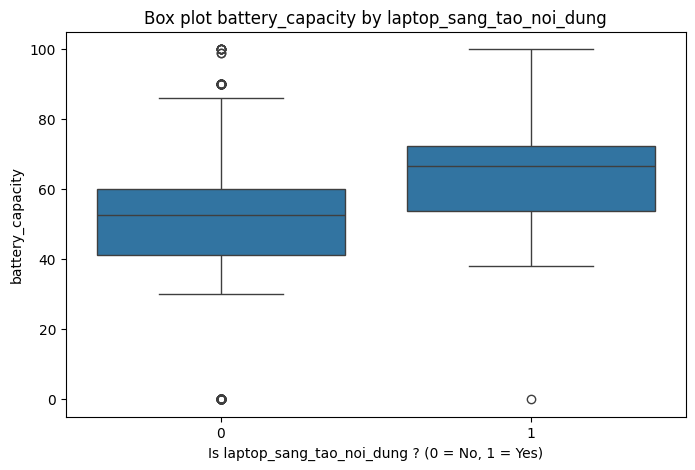

Mann-Whitney U test for battery_capacity vs laptop_sang_tao_noi_dung: U-statistic = 191,485, p-value = 0.0000
-> Significant difference in battery_capacity between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 66.5
Median for laptop_sang_tao_noi_dung = 0: 52.6


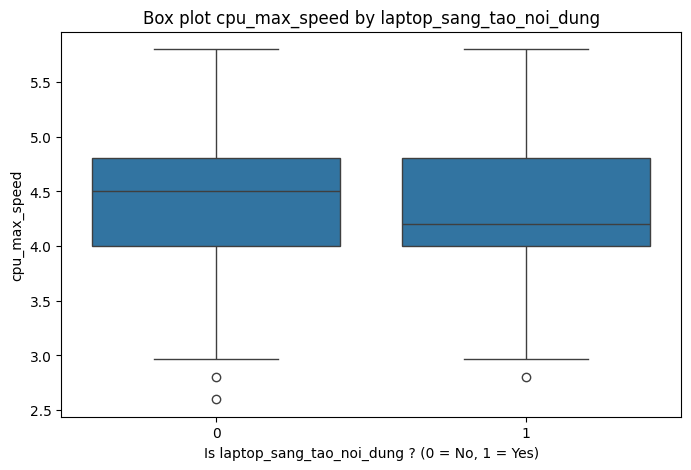

Mann-Whitney U test for cpu_max_speed vs laptop_sang_tao_noi_dung: U-statistic = 119,969, p-value = 0.0041
-> Significant difference in cpu_max_speed between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 4.2
Median for laptop_sang_tao_noi_dung = 0: 4.5


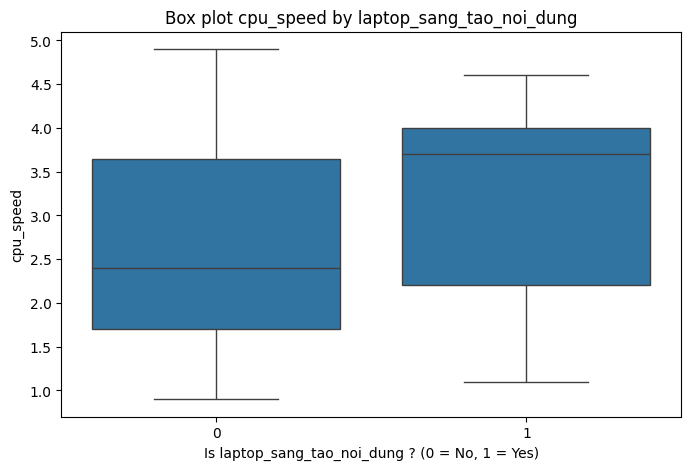

Mann-Whitney U test for cpu_speed vs laptop_sang_tao_noi_dung: U-statistic = 179,813, p-value = 0.0000
-> Significant difference in cpu_speed between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 3.7
Median for laptop_sang_tao_noi_dung = 0: 2.4


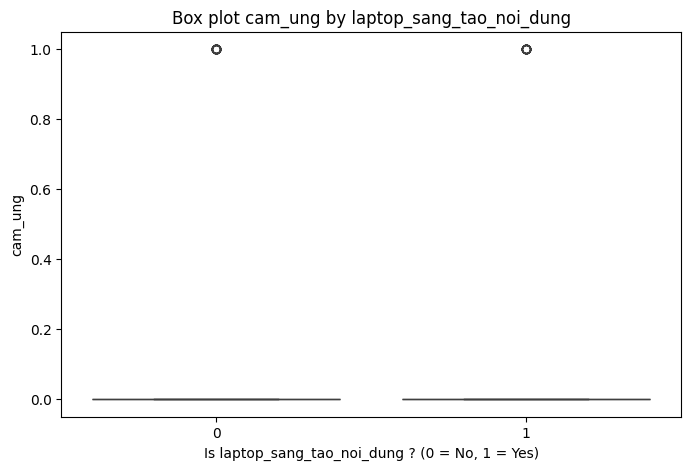

Mann-Whitney U test for cam_ung vs laptop_sang_tao_noi_dung: U-statistic = 134,902, p-value = 0.6257
-> No significant different


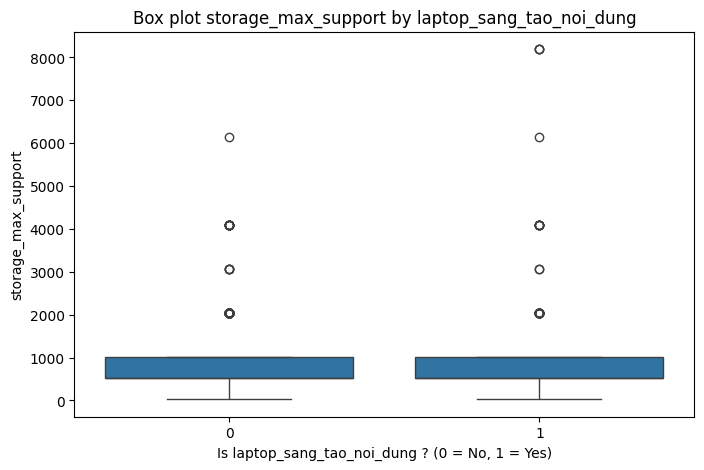

Mann-Whitney U test for storage_max_support vs laptop_sang_tao_noi_dung: U-statistic = 136,519, p-value = 0.6064
-> No significant different


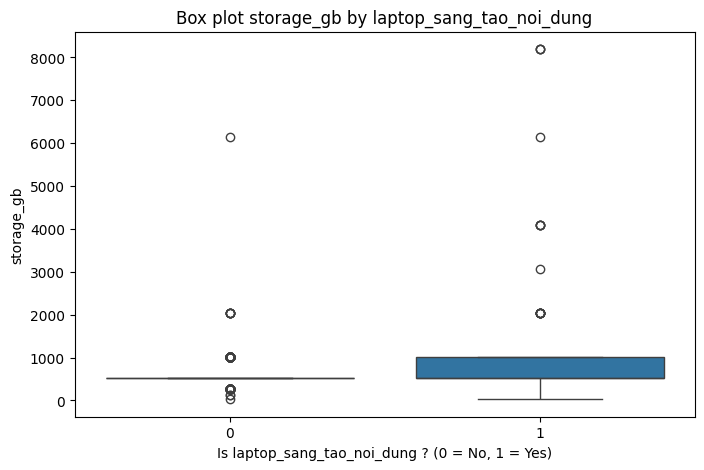

Mann-Whitney U test for storage_gb vs laptop_sang_tao_noi_dung: U-statistic = 156,768, p-value = 0.0000
-> Significant difference in storage_gb between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 512.0
Median for laptop_sang_tao_noi_dung = 0: 512.0


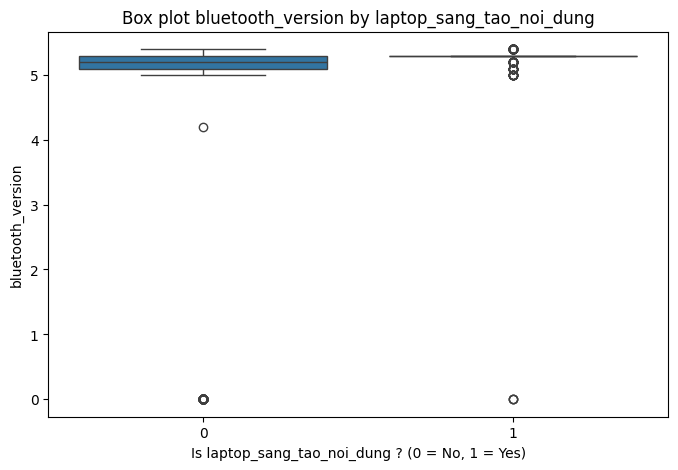

Mann-Whitney U test for bluetooth_version vs laptop_sang_tao_noi_dung: U-statistic = 190,024, p-value = 0.0000
-> Significant difference in bluetooth_version between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 5.3
Median for laptop_sang_tao_noi_dung = 0: 5.2


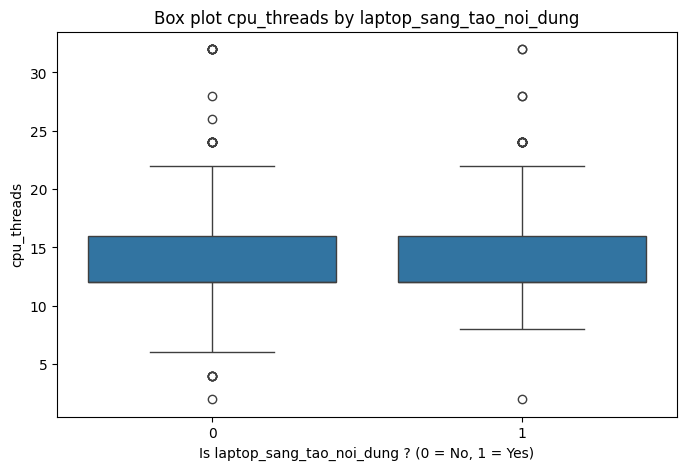

Mann-Whitney U test for cpu_threads vs laptop_sang_tao_noi_dung: U-statistic = 147,886, p-value = 0.0025
-> Significant difference in cpu_threads between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 12.0
Median for laptop_sang_tao_noi_dung = 0: 12.0


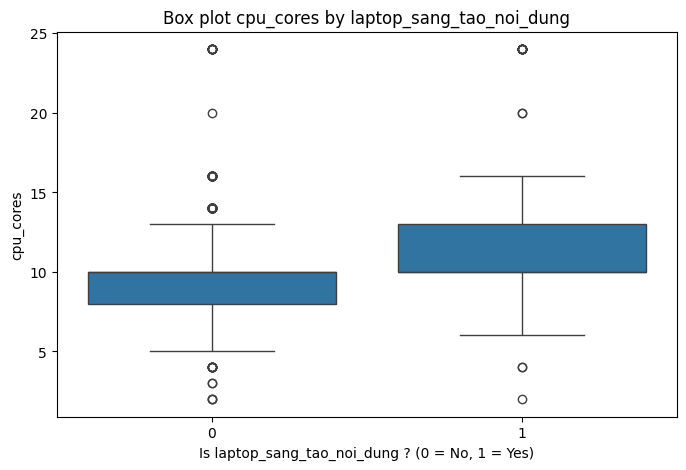

Mann-Whitney U test for cpu_cores vs laptop_sang_tao_noi_dung: U-statistic = 169,069, p-value = 0.0000
-> Significant difference in cpu_cores between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 10.0
Median for laptop_sang_tao_noi_dung = 0: 10.0


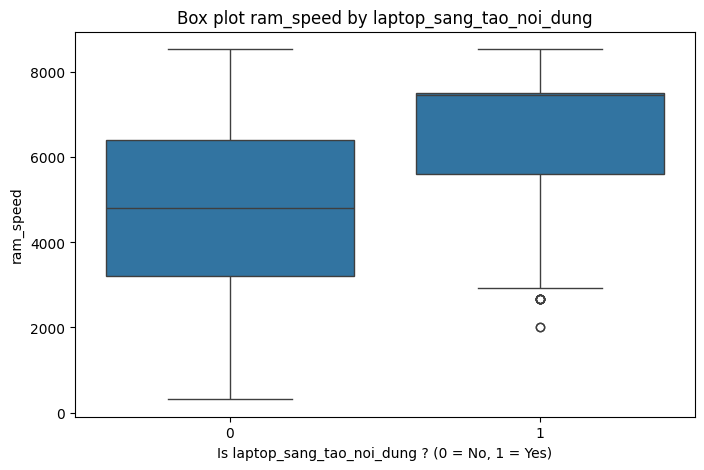

Mann-Whitney U test for ram_speed vs laptop_sang_tao_noi_dung: U-statistic = 196,659, p-value = 0.0000
-> Significant difference in ram_speed between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 7467.0
Median for laptop_sang_tao_noi_dung = 0: 4800.0


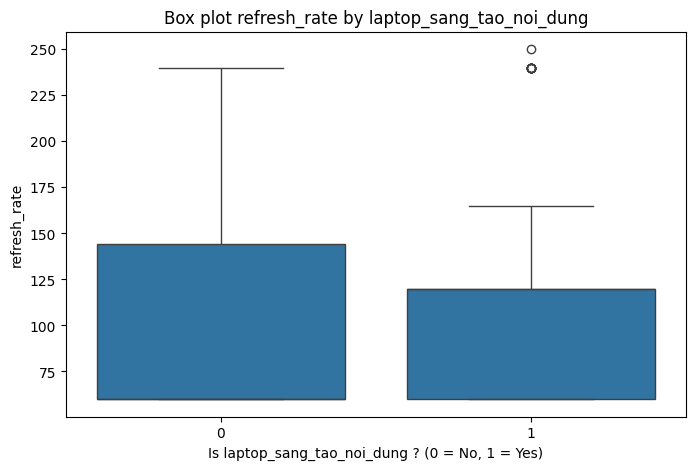

Mann-Whitney U test for refresh_rate vs laptop_sang_tao_noi_dung: U-statistic = 140,852, p-value = 0.1326
-> No significant different


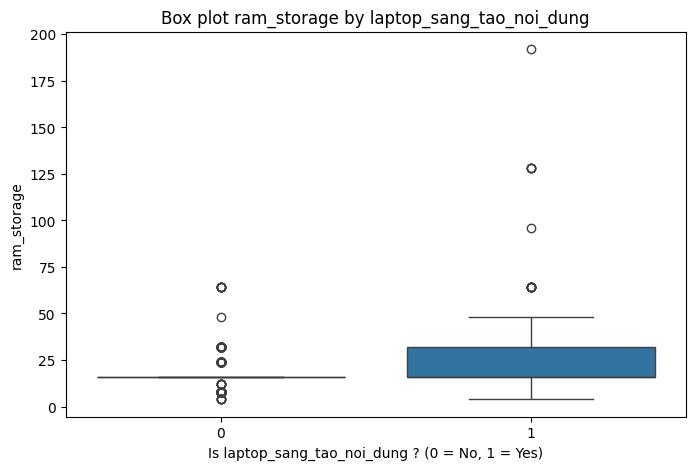

Mann-Whitney U test for ram_storage vs laptop_sang_tao_noi_dung: U-statistic = 177,510, p-value = 0.0000
-> Significant difference in ram_storage between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 16.0
Median for laptop_sang_tao_noi_dung = 0: 16.0


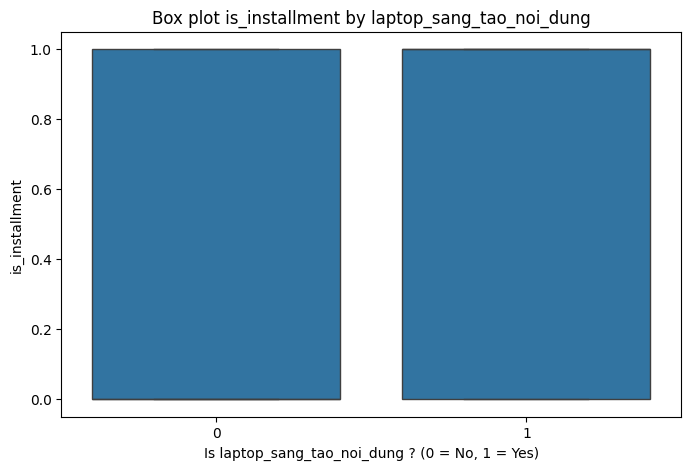

Mann-Whitney U test for is_installment vs laptop_sang_tao_noi_dung: U-statistic = 170,530, p-value = 0.0000
-> Significant difference in is_installment between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 1.0
Median for laptop_sang_tao_noi_dung = 0: 0.0


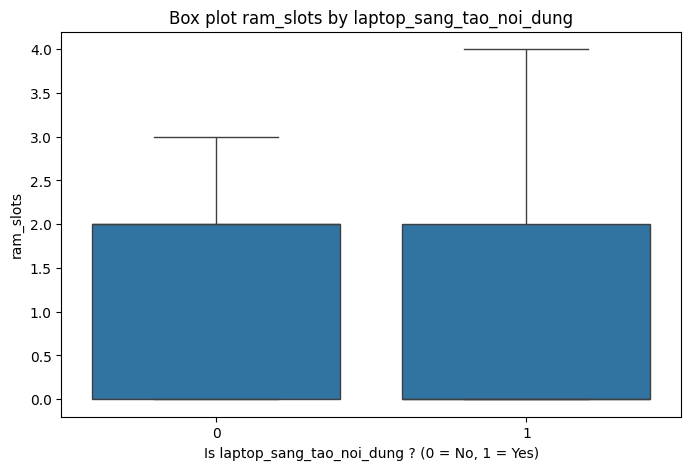

Mann-Whitney U test for ram_slots vs laptop_sang_tao_noi_dung: U-statistic = 94,484, p-value = 0.0000
-> Significant difference in ram_slots between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 0.0
Median for laptop_sang_tao_noi_dung = 0: 2.0


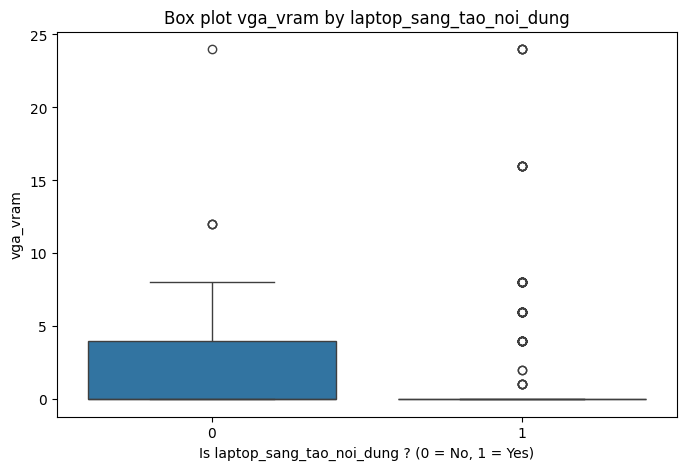

Mann-Whitney U test for vga_vram vs laptop_sang_tao_noi_dung: U-statistic = 120,557, p-value = 0.0003
-> Significant difference in vga_vram between laptop that are 'laptop_sang_tao_noi_dung' and those are not
Median for laptop_sang_tao_noi_dung = 1: 0.0
Median for laptop_sang_tao_noi_dung = 0: 0.0
Contifency table for laptop_sang_tao_noi_dung and material:
 material                  vỏ kim loại  vỏ nhựa  vỏ nhựa - nắp lưng kim loại
laptop_sang_tao_noi_dung                                                   
0                                 332      324                           67
1                                 282       63                           26


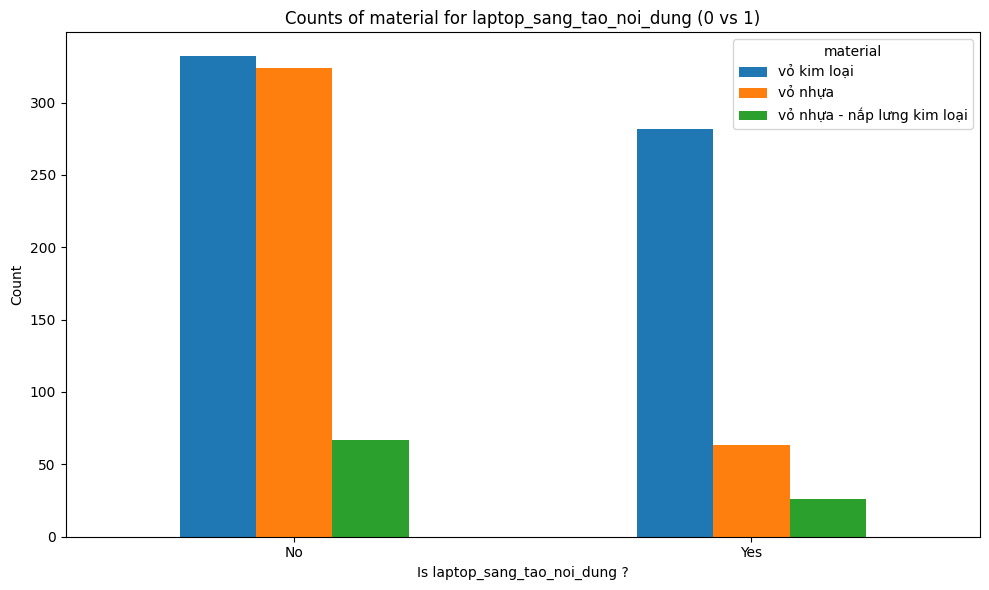

Chi-squared test for laptop_sang_tao_noi_dung and material: Chi2 = 94.7182, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and material
Contifency table for laptop_sang_tao_noi_dung and manufacturer:
 manufacturer              acer  apple  asus  dell  gigabyte  hp  huawei  \
laptop_sang_tao_noi_dung                                                  
0                           67    189   141    68        10  63       2   
1                           18    196    54    20         2  27       0   

manufacturer              lenovo  lg  masstel  msi  samsung  vaio  
laptop_sang_tao_noi_dung                                           
0                            106  10        1   64        1     1  
1                             27   4        0   22        1     0  


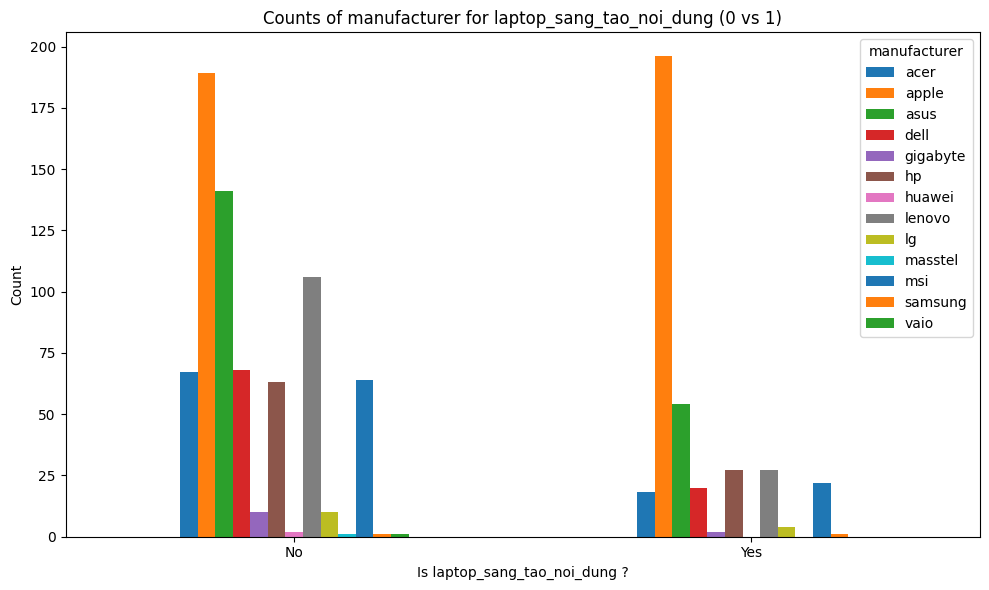

Chi-squared test for laptop_sang_tao_noi_dung and manufacturer: Chi2 = 82.3839, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and manufacturer
Contifency table for laptop_sang_tao_noi_dung and ram_type:
 ram_type                  ddr4  ddr5  gddr5  lpddr4  lpddr4x  lpddr5  lpddr5x
laptop_sang_tao_noi_dung                                                     
0                          230   192      1       6        6     216       72
1                           41    63      0       2        1     114      150


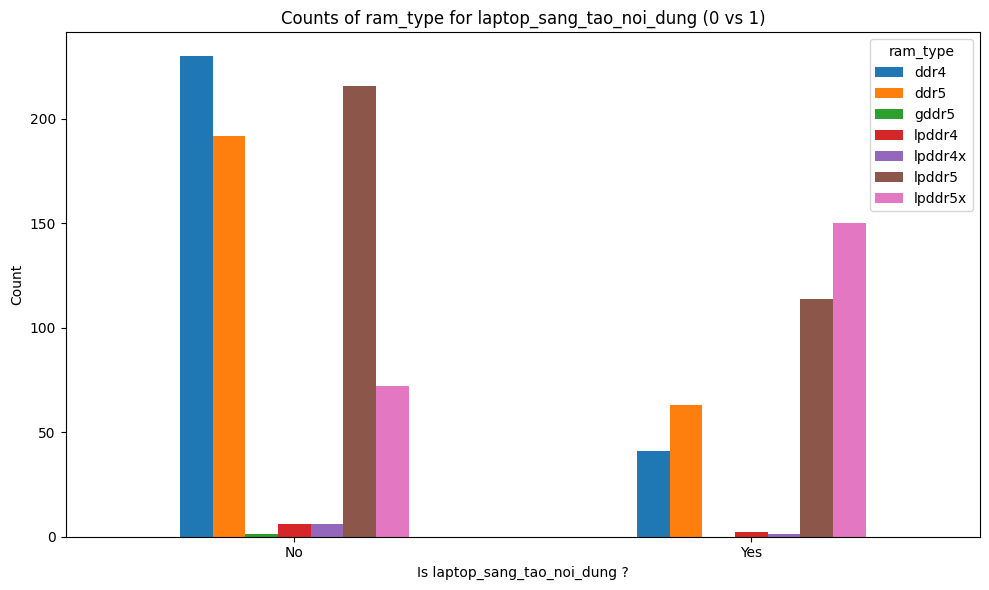

Chi-squared test for laptop_sang_tao_noi_dung and ram_type: Chi2 = 166.5603, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and ram_type
Contifency table for laptop_sang_tao_noi_dung and os_version:
 os_version                chrome os  free dos  macos  windows 10  windows 11
laptop_sang_tao_noi_dung                                                    
0                                 1        10    189           5         518
1                                 1         2    196           0         172


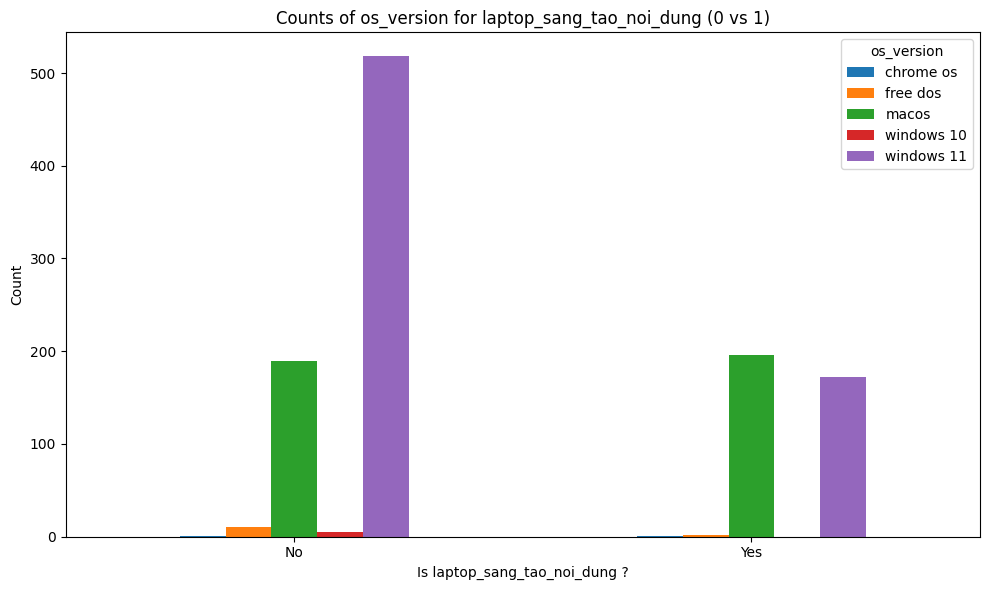

Chi-squared test for laptop_sang_tao_noi_dung and os_version: Chi2 = 78.8693, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and os_version
Contifency table for laptop_sang_tao_noi_dung and laptop_color:
 laptop_color              be  bạc  cam  hồng  trắng  tím  vàng  xanh dương  \
laptop_sang_tao_noi_dung                                                     
0                          0  170    5     9      2    5    43          47   
1                          2  103    0     0      5    1    32          71   

laptop_color              xanh lá  xám  đen  
laptop_sang_tao_noi_dung                     
0                               8  212  222  
1                               0   61   96  


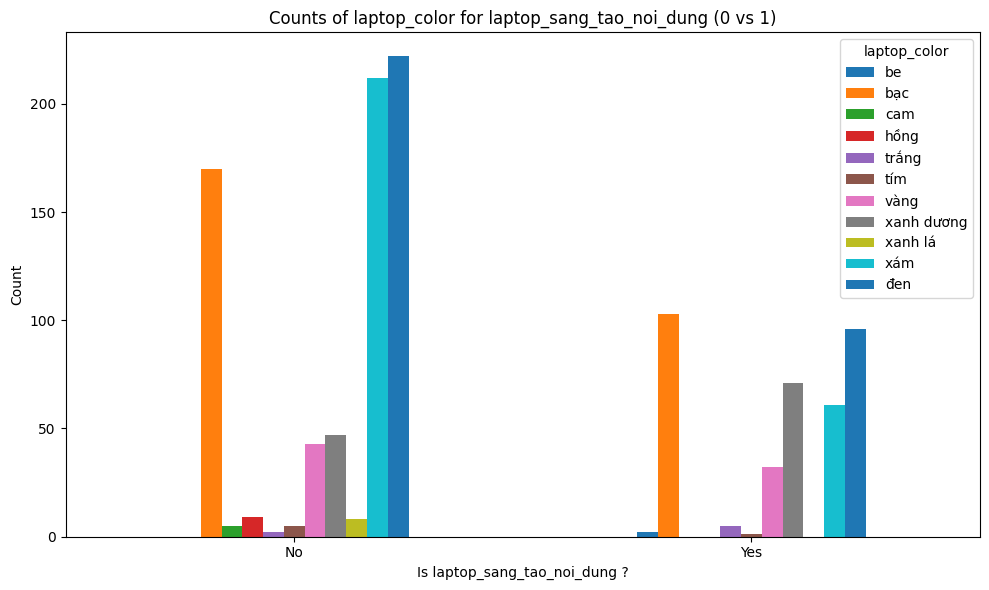

Chi-squared test for laptop_sang_tao_noi_dung and laptop_color: Chi2 = 79.2853, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and laptop_color
Contifency table for laptop_sang_tao_noi_dung and vga_brand:
 vga_brand                 amd  apple  intel  nvidia  qualcomm
laptop_sang_tao_noi_dung                                     
0                          41    189    305     185         3
1                          13    196     93      61         8


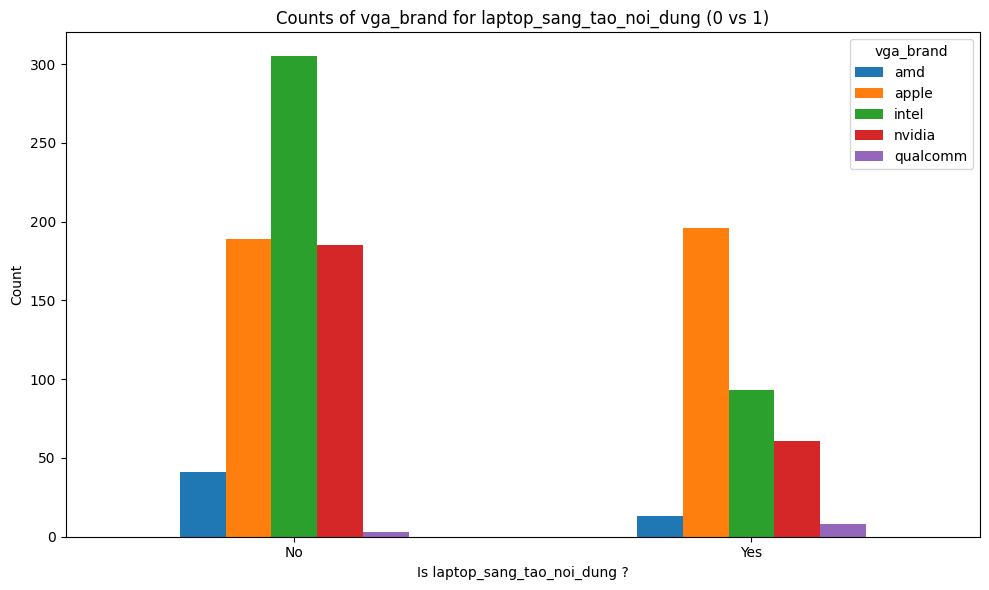

Chi-squared test for laptop_sang_tao_noi_dung and vga_brand: Chi2 = 88.2228, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and vga_brand
Contifency table for laptop_sang_tao_noi_dung and cpu_series:
 cpu_series                celeron  core 5  core 7  core i3  core i5  core i7  \
laptop_sang_tao_noi_dung                                                       
0                               2       8       4       29      200      104   
1                               1       1       4        4       38       30   

cpu_series                core i9  core ultra 5  core ultra 7  core ultra 9  \
laptop_sang_tao_noi_dung                                                      
0                               8            36            40             6   
1                               4            14            30            18   

cpu_series                ...  ryzen 9  ryzen ai 5  ryzen ai 7  ryzen ai 9  \
laptop_sang_tao_noi_dung  ...                      

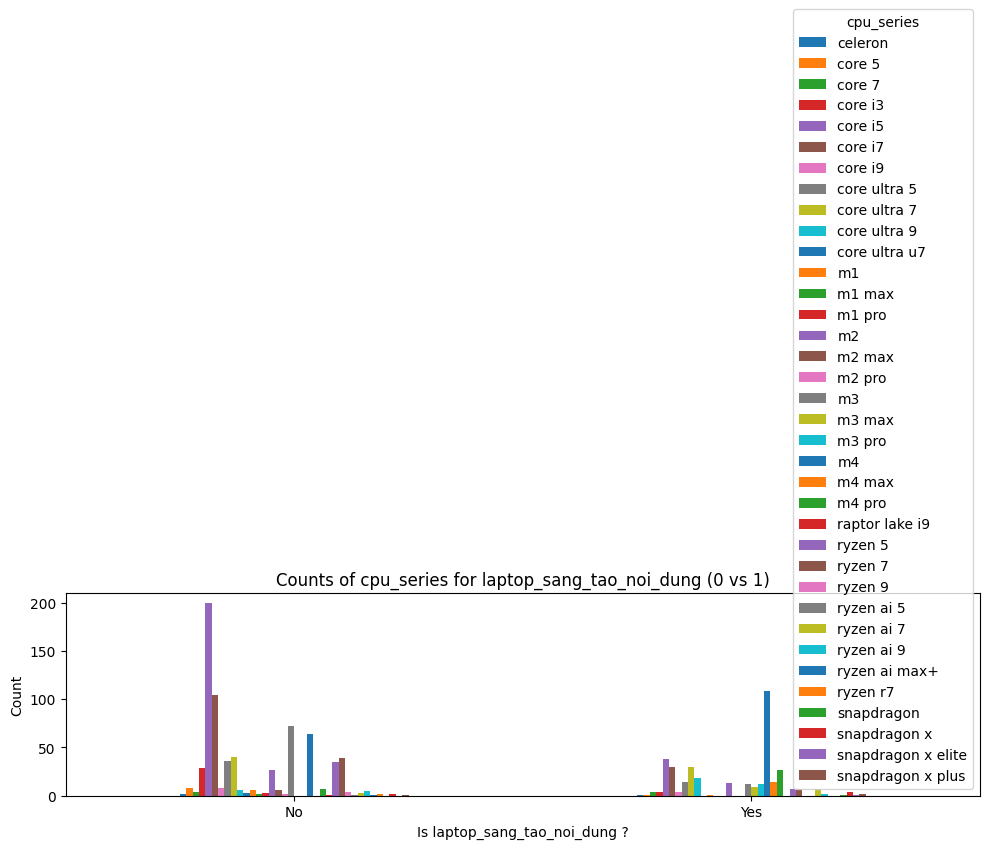

Chi-squared test for laptop_sang_tao_noi_dung and cpu_series: Chi2 = 292.4773, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and cpu_series
Contifency table for laptop_sang_tao_noi_dung and laptop_camera:
 laptop_camera             full hd   hd
laptop_sang_tao_noi_dung              
0                             361  362
1                             293   78


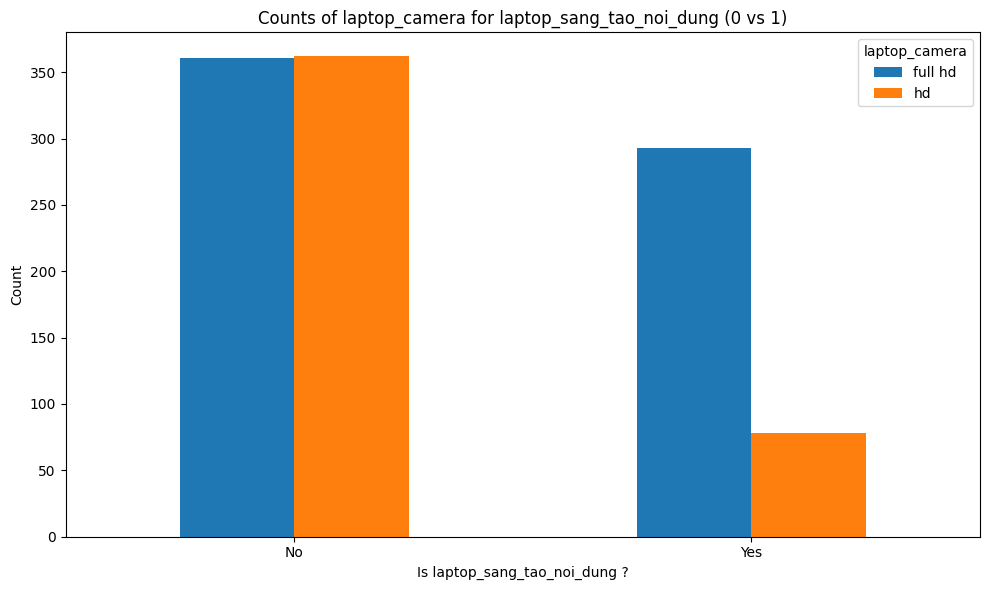

Chi-squared test for laptop_sang_tao_noi_dung and laptop_camera: Chi2 = 84.8240, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and laptop_camera
Contifency table for laptop_sang_tao_noi_dung and cpu_brand:
 cpu_brand                 amd  apple  intel  qualcomm
laptop_sang_tao_noi_dung                             
0                          90    189    441         3
1                          23    196    144         8


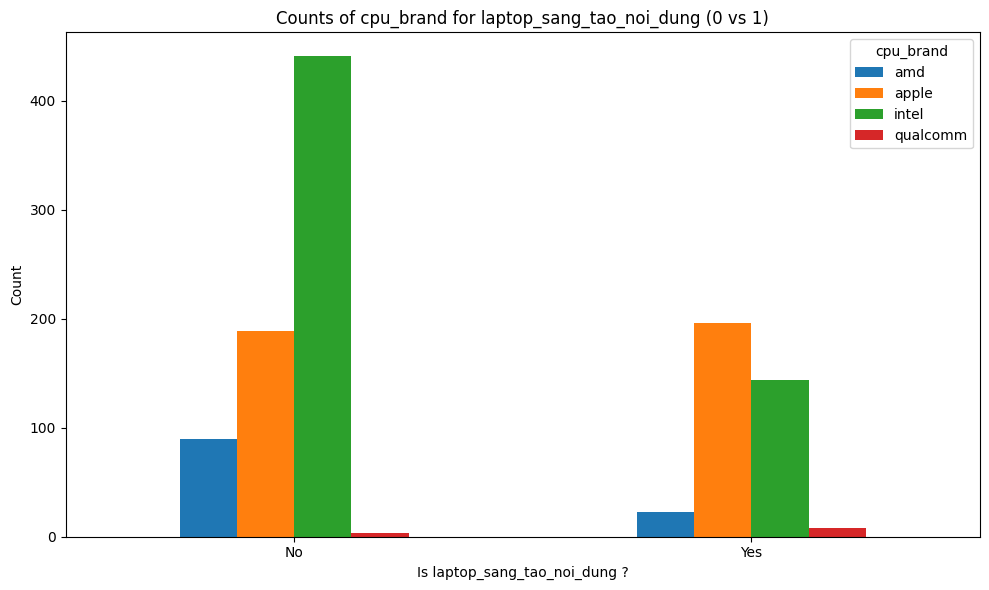

Chi-squared test for laptop_sang_tao_noi_dung and cpu_brand: Chi2 = 88.8509, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and cpu_brand
Contifency table for laptop_sang_tao_noi_dung and cpu_model:
 cpu_model                 1005g1  10300h  1115g4  1135g7  11400h  1155g7  \
laptop_sang_tao_noi_dung                                                   
0                              2       1       3       2       4       1   
1                              0       0       0       0       0       0   

cpu_model                 115g4  1165g7  11800h  1195g7  ...  m4 pro  n305  \
laptop_sang_tao_noi_dung                                 ...                 
0                             1       0       2       1  ...       7     2   
1                             0       1       0       0  ...      27     0   

cpu_model                 n4120  n4500  x1  x1 26 100  x1e  x1e 78 100  x1p  \
laptop_sang_tao_noi_dung                                               

<ipython-input-5-3f9f4a22c72a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


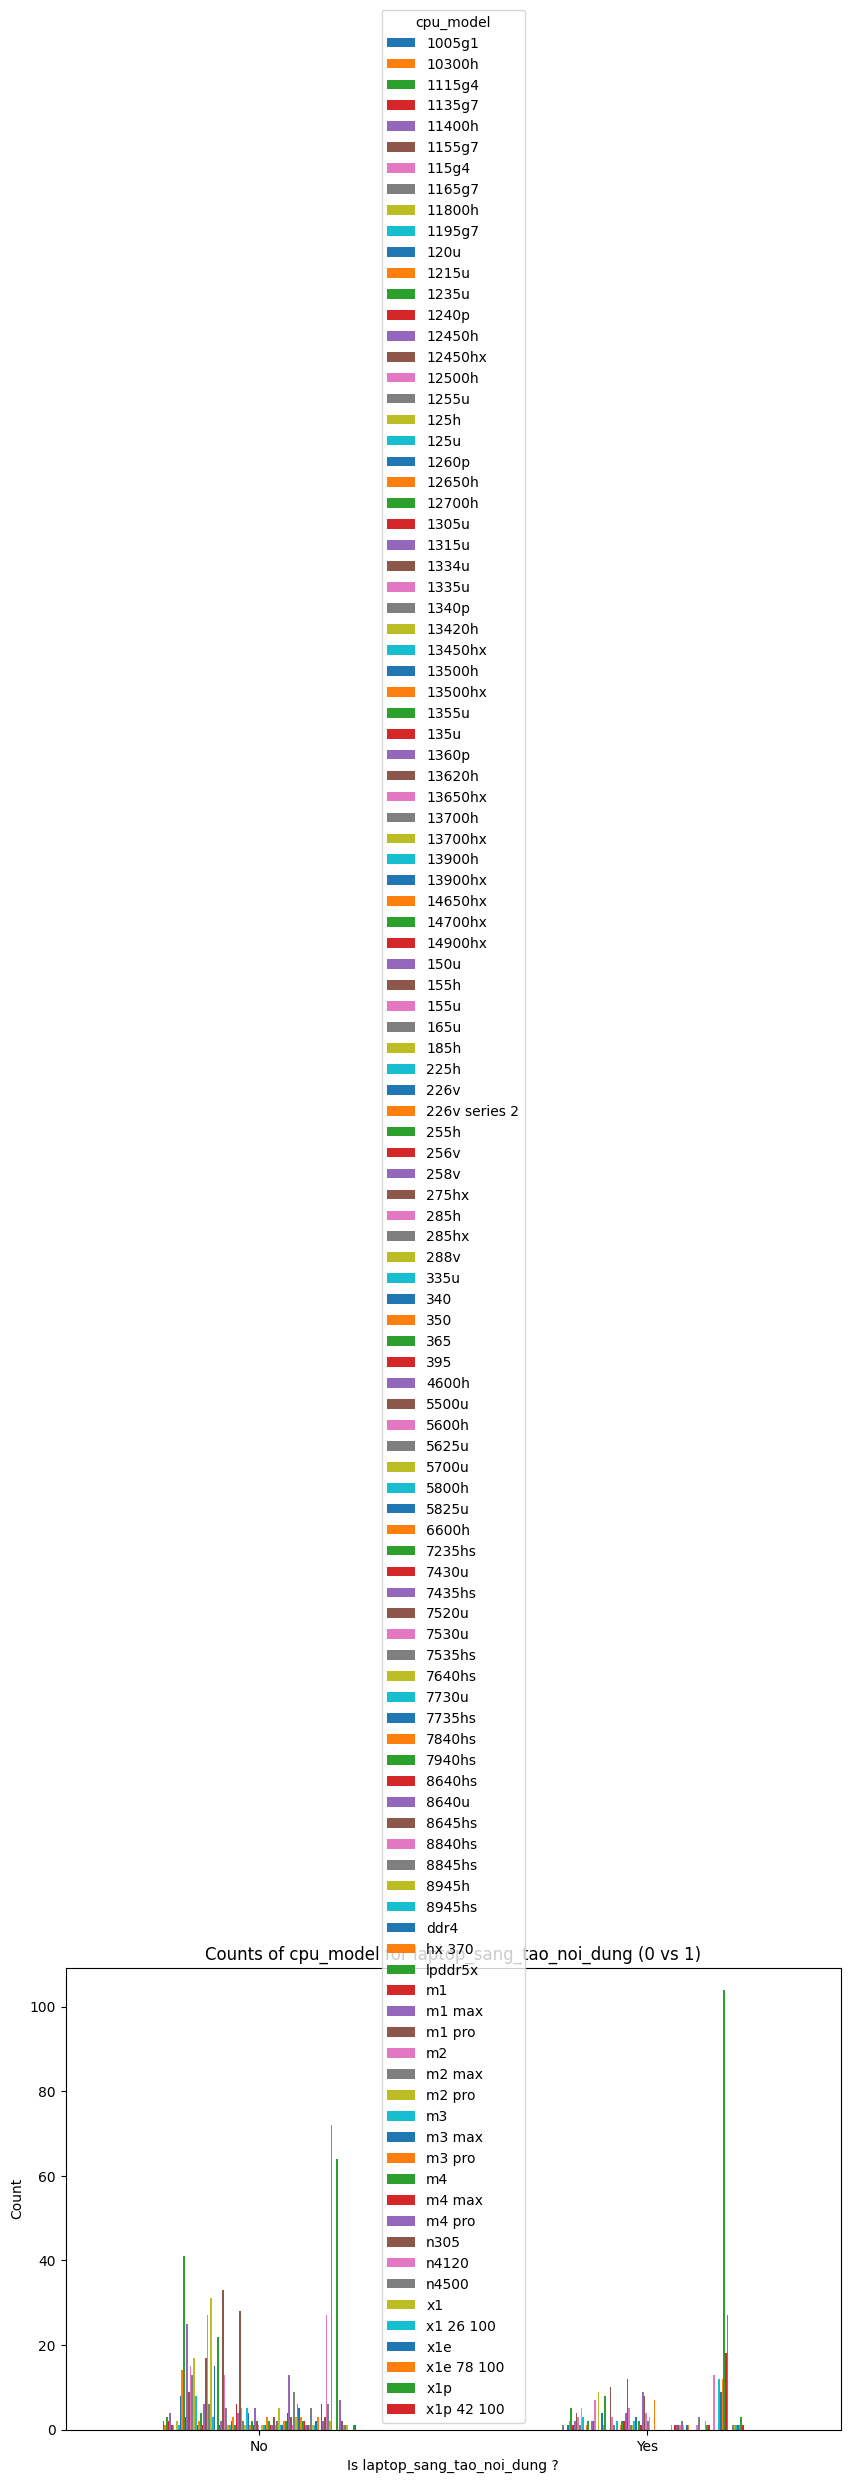

Chi-squared test for laptop_sang_tao_noi_dung and cpu_model: Chi2 = 339.8164, p-value = 0.000000
-> Significant association between laptop_sang_tao_noi_dung and cpu_model
Contifency table for laptop_sang_tao_noi_dung and vga_type:
 vga_type                  card rời  card tích hợp
laptop_sang_tao_noi_dung                         
0                              211            512
1                               66            305


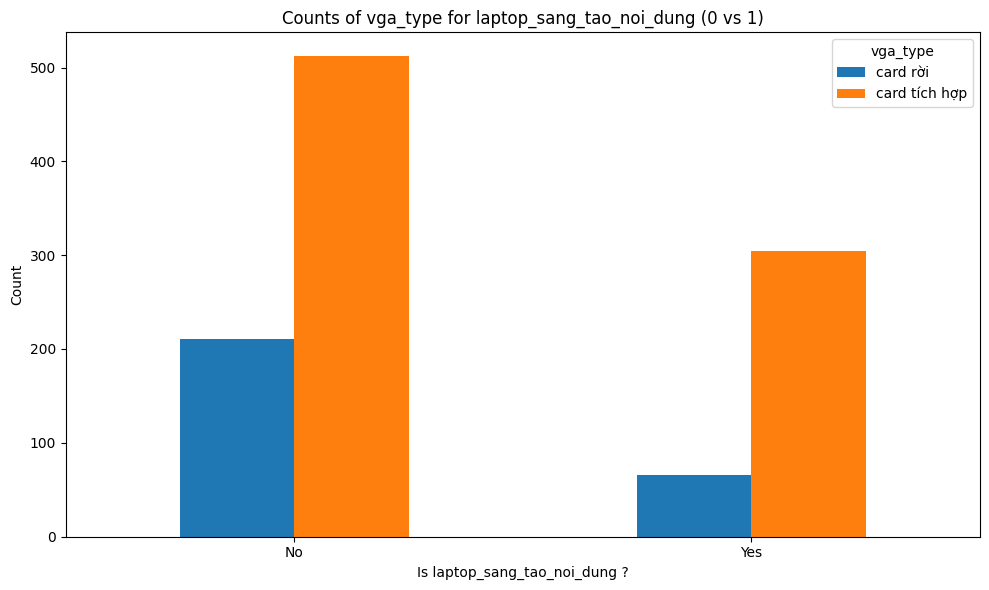

Chi-squared test for laptop_sang_tao_noi_dung and vga_type: Chi2 = 16.2371, p-value = 0.000056
-> Significant association between laptop_sang_tao_noi_dung and vga_type


In [ ]:
basic_eda('laptop_sang_tao_noi_dung')

## Mong nhe

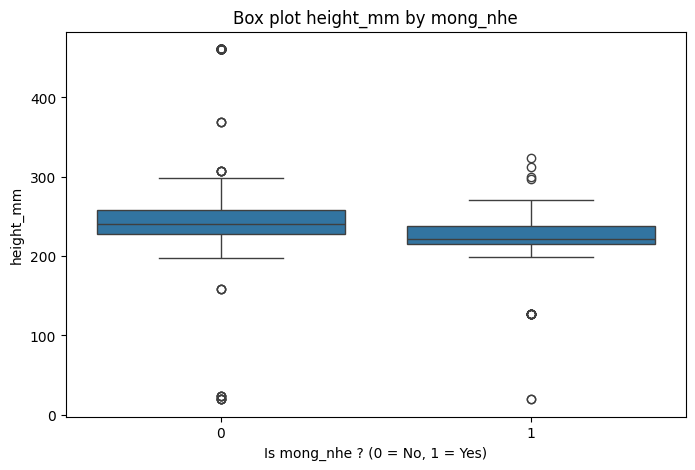

Mann-Whitney U test for height_mm vs mong_nhe: U-statistic = 69,319, p-value = 0.0000
-> Significant difference in height_mm between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 221.2
Median for mong_nhe = 0: 239.9


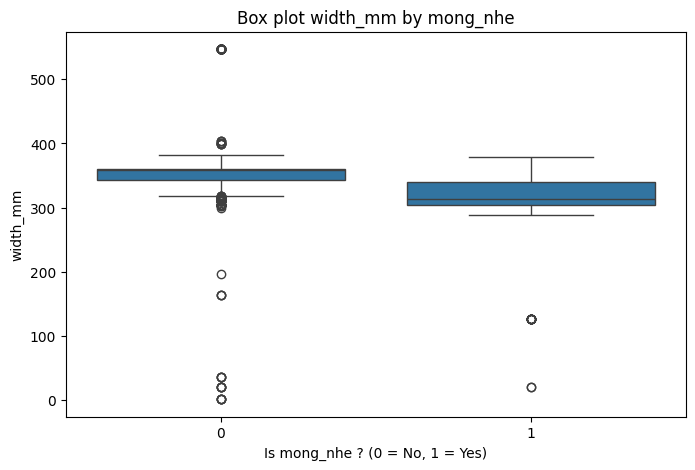

Mann-Whitney U test for width_mm vs mong_nhe: U-statistic = 53,464, p-value = 0.0000
-> Significant difference in width_mm between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 313.0
Median for mong_nhe = 0: 358.5


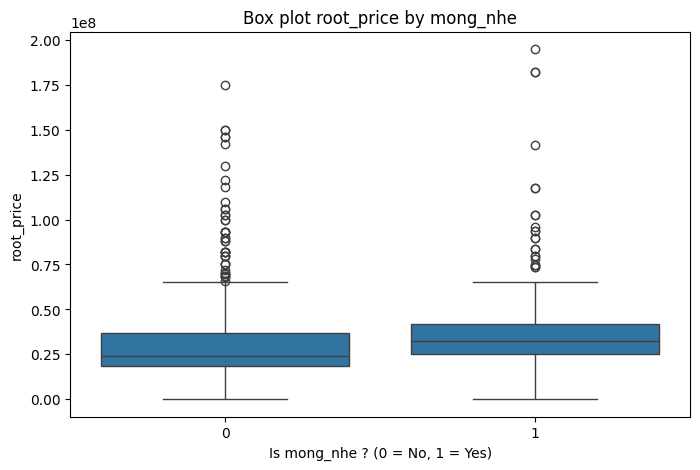

Mann-Whitney U test for root_price vs mong_nhe: U-statistic = 188,190, p-value = 0.0000
-> Significant difference in root_price between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 32140000.0
Median for mong_nhe = 0: 23990000.0


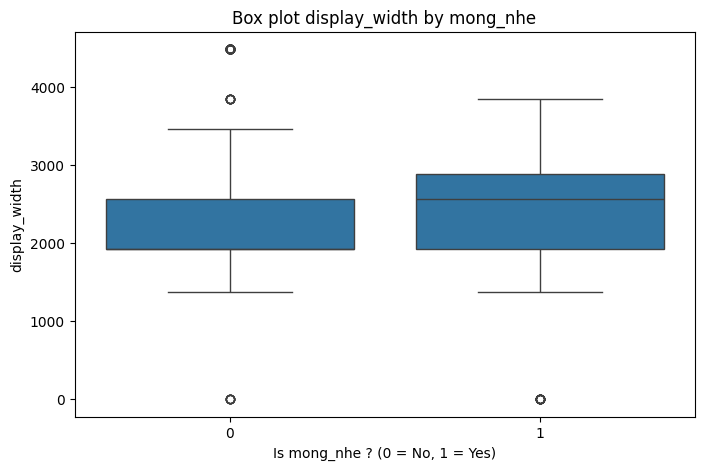

Mann-Whitney U test for display_width vs mong_nhe: U-statistic = 188,094, p-value = 0.0000
-> Significant difference in display_width between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 2560.0
Median for mong_nhe = 0: 1920.0


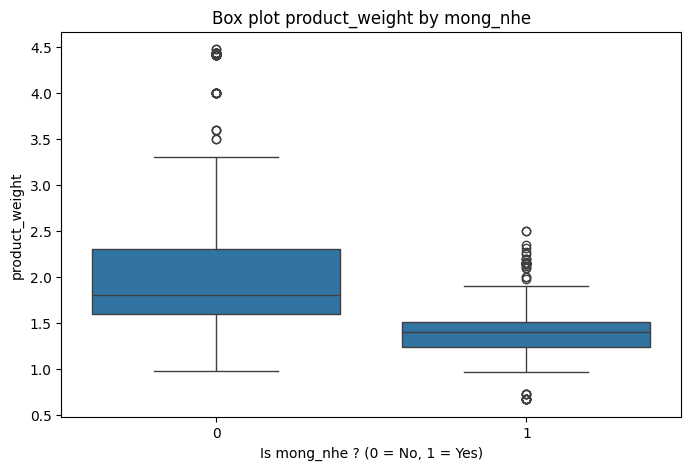

Mann-Whitney U test for product_weight vs mong_nhe: U-statistic = 45,400, p-value = 0.0000
-> Significant difference in product_weight between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 1.395
Median for mong_nhe = 0: 1.8


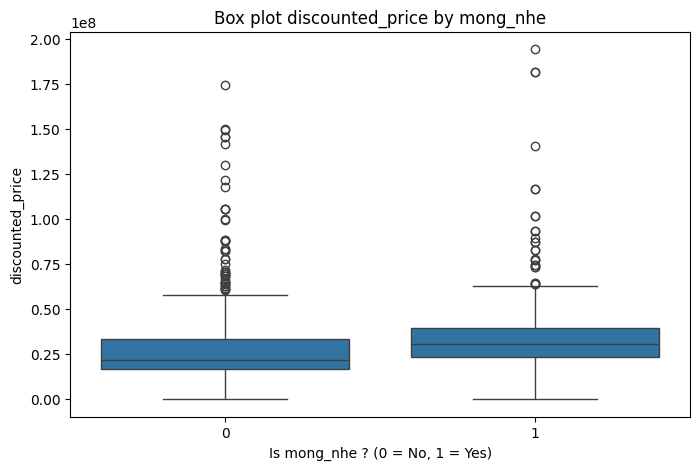

Mann-Whitney U test for discounted_price vs mong_nhe: U-statistic = 193,364, p-value = 0.0000
-> Significant difference in discounted_price between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 30540000.0
Median for mong_nhe = 0: 21490000.0


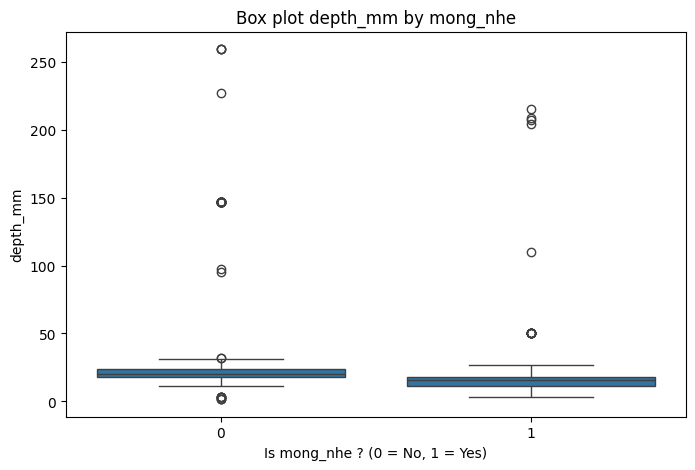

Mann-Whitney U test for depth_mm vs mong_nhe: U-statistic = 58,054, p-value = 0.0000
-> Significant difference in depth_mm between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 15.9
Median for mong_nhe = 0: 19.9


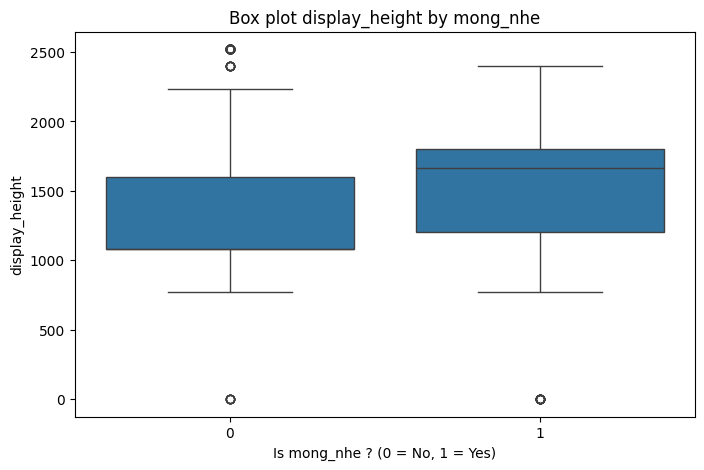

Mann-Whitney U test for display_height vs mong_nhe: U-statistic = 197,714, p-value = 0.0000
-> Significant difference in display_height between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 1664.0
Median for mong_nhe = 0: 1080.0


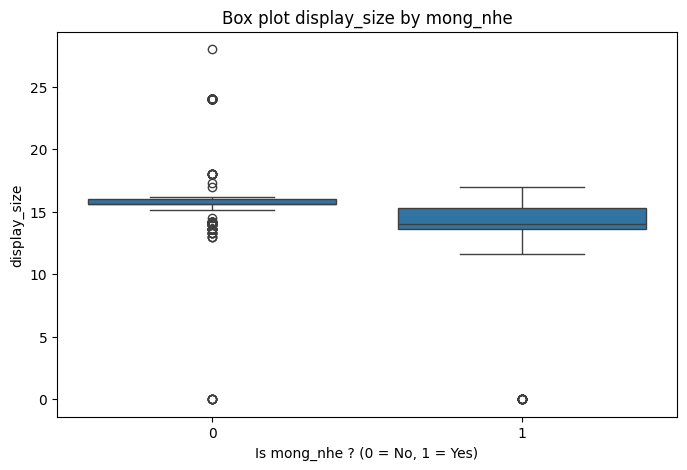

Mann-Whitney U test for display_size vs mong_nhe: U-statistic = 58,623, p-value = 0.0000
-> Significant difference in display_size between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 14.0
Median for mong_nhe = 0: 15.6


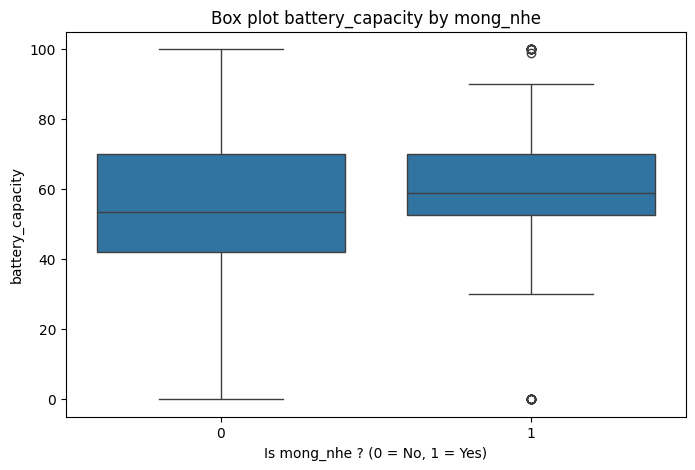

Mann-Whitney U test for battery_capacity vs mong_nhe: U-statistic = 172,072, p-value = 0.0000
-> Significant difference in battery_capacity between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 59.0
Median for mong_nhe = 0: 53.5


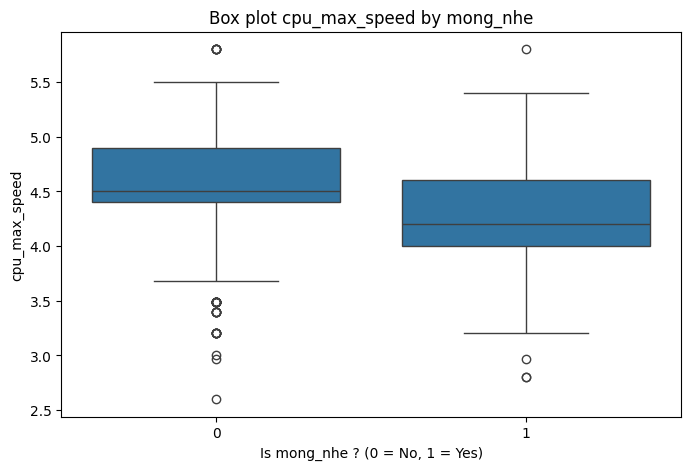

Mann-Whitney U test for cpu_max_speed vs mong_nhe: U-statistic = 103,657, p-value = 0.0000
-> Significant difference in cpu_max_speed between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 4.2
Median for mong_nhe = 0: 4.504867315292358


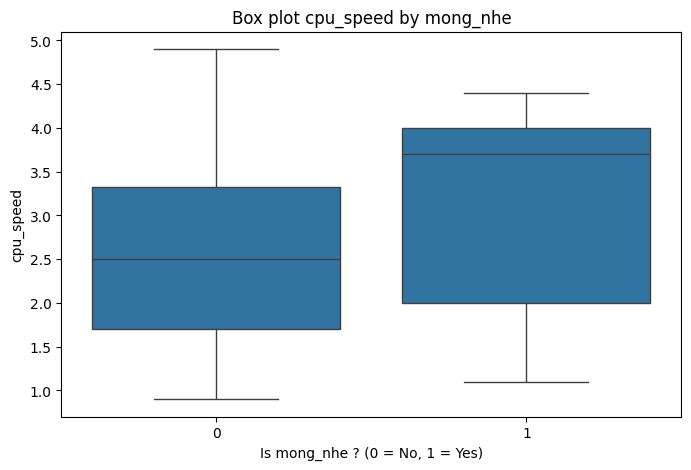

Mann-Whitney U test for cpu_speed vs mong_nhe: U-statistic = 189,278, p-value = 0.0000
-> Significant difference in cpu_speed between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 3.7
Median for mong_nhe = 0: 2.4956084489822388


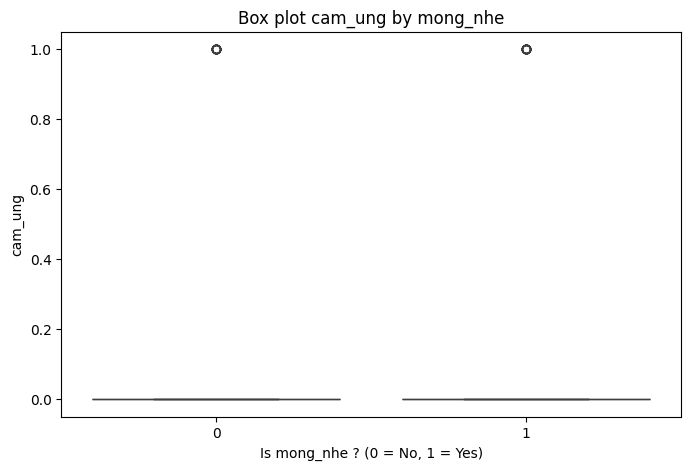

Mann-Whitney U test for cam_ung vs mong_nhe: U-statistic = 149,667, p-value = 0.3181
-> No significant different


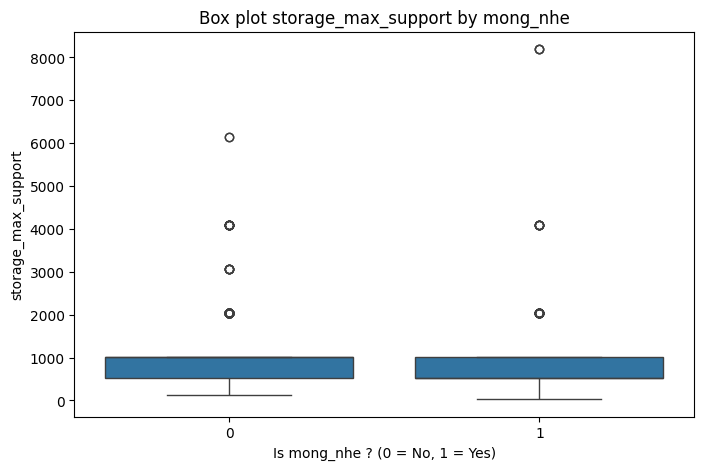

Mann-Whitney U test for storage_max_support vs mong_nhe: U-statistic = 118,194, p-value = 0.0000
-> Significant difference in storage_max_support between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 512.0
Median for mong_nhe = 0: 1024.0


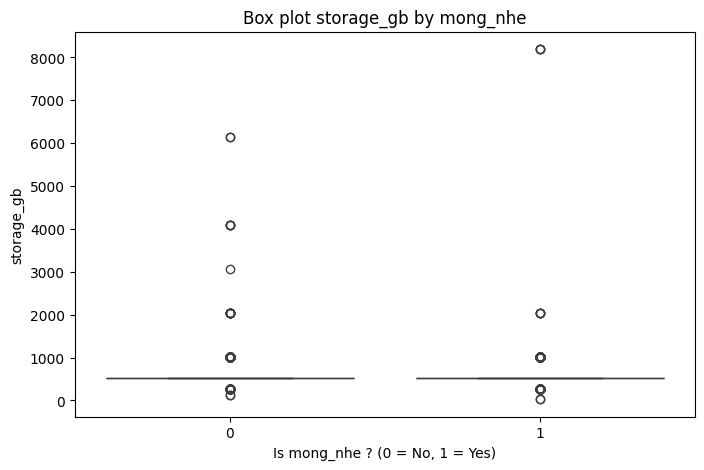

Mann-Whitney U test for storage_gb vs mong_nhe: U-statistic = 142,192, p-value = 0.1856
-> No significant different


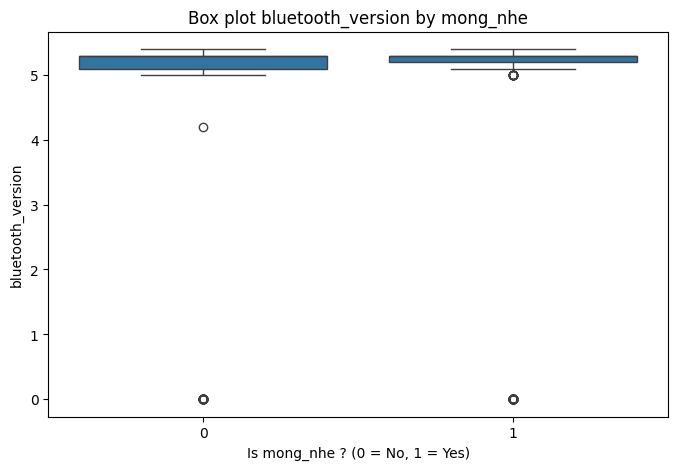

Mann-Whitney U test for bluetooth_version vs mong_nhe: U-statistic = 172,372, p-value = 0.0000
-> Significant difference in bluetooth_version between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 5.3
Median for mong_nhe = 0: 5.3


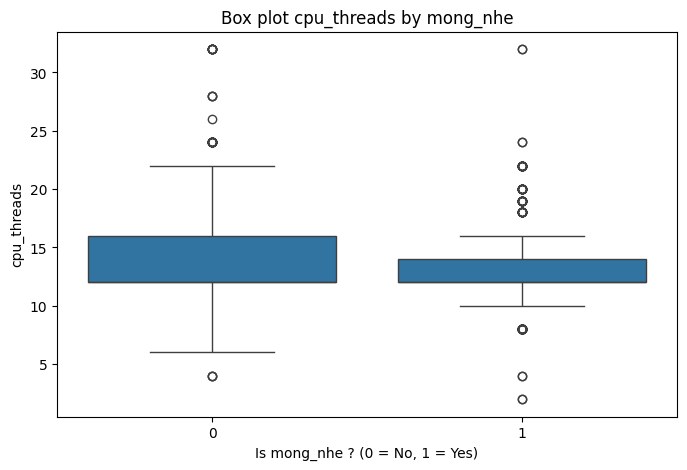

Mann-Whitney U test for cpu_threads vs mong_nhe: U-statistic = 128,642, p-value = 0.0001
-> Significant difference in cpu_threads between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 12.0
Median for mong_nhe = 0: 12.0


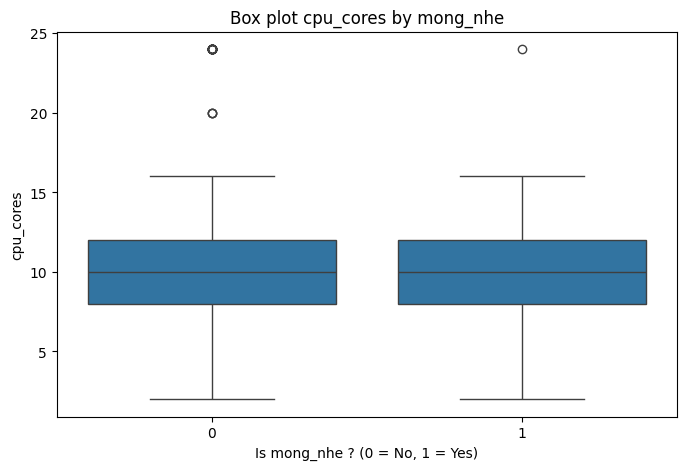

Mann-Whitney U test for cpu_cores vs mong_nhe: U-statistic = 151,362, p-value = 0.5005
-> No significant different


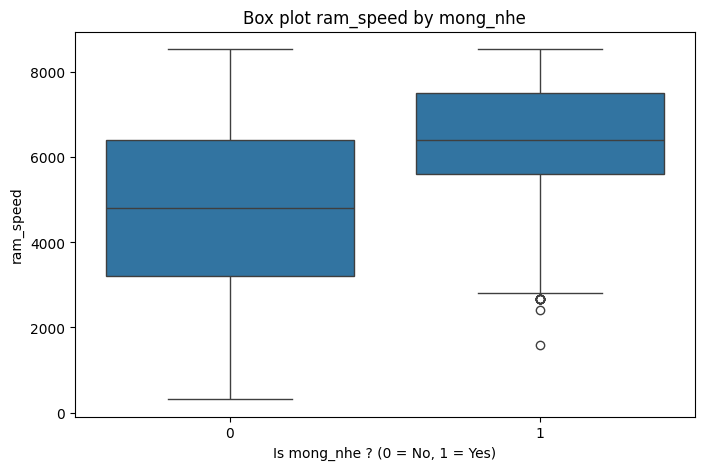

Mann-Whitney U test for ram_speed vs mong_nhe: U-statistic = 221,046, p-value = 0.0000
-> Significant difference in ram_speed between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 6400.0
Median for mong_nhe = 0: 4800.0


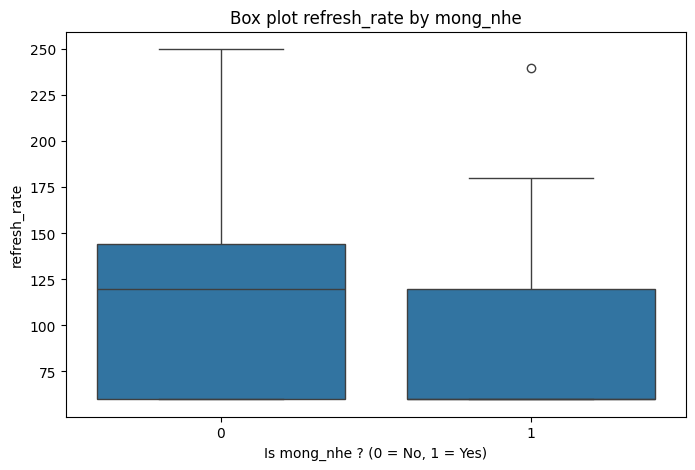

Mann-Whitney U test for refresh_rate vs mong_nhe: U-statistic = 99,236, p-value = 0.0000
-> Significant difference in refresh_rate between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 60.0
Median for mong_nhe = 0: 120.0


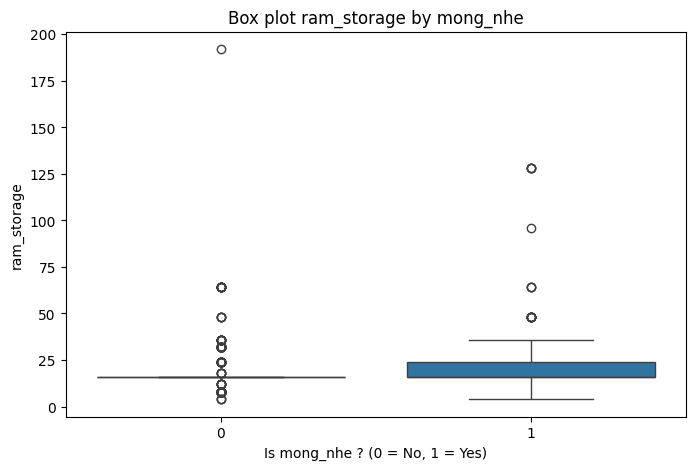

Mann-Whitney U test for ram_storage vs mong_nhe: U-statistic = 178,162, p-value = 0.0000
-> Significant difference in ram_storage between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 16.0
Median for mong_nhe = 0: 16.0


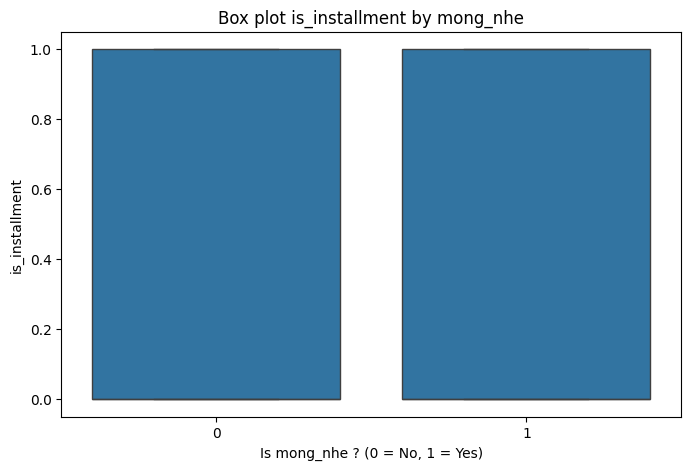

Mann-Whitney U test for is_installment vs mong_nhe: U-statistic = 159,403, p-value = 0.0091
-> Significant difference in is_installment between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 0.0
Median for mong_nhe = 0: 0.0


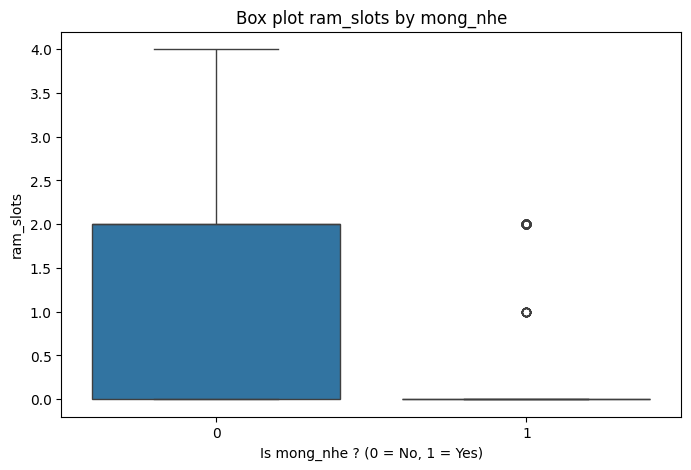

Mann-Whitney U test for ram_slots vs mong_nhe: U-statistic = 74,549, p-value = 0.0000
-> Significant difference in ram_slots between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 0.0
Median for mong_nhe = 0: 2.0


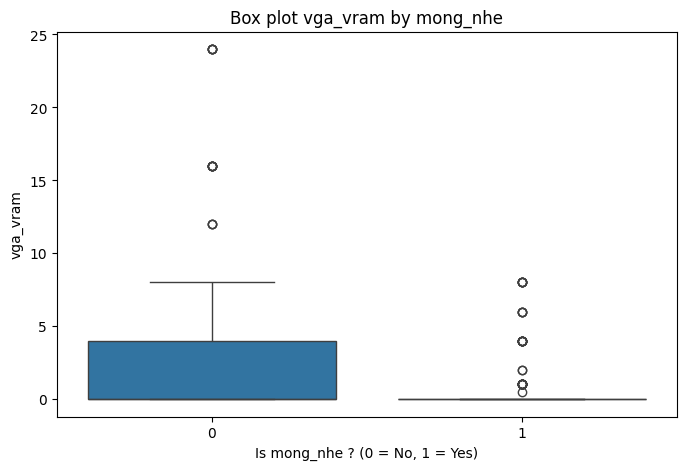

Mann-Whitney U test for vga_vram vs mong_nhe: U-statistic = 97,363, p-value = 0.0000
-> Significant difference in vga_vram between laptop that are 'mong_nhe' and those are not
Median for mong_nhe = 1: 0.0
Median for mong_nhe = 0: 0.0
Contifency table for mong_nhe and material:
 material  vỏ kim loại  vỏ nhựa  vỏ nhựa - nắp lưng kim loại
mong_nhe                                                   
0                 211      320                           73
1                 403       67                           20


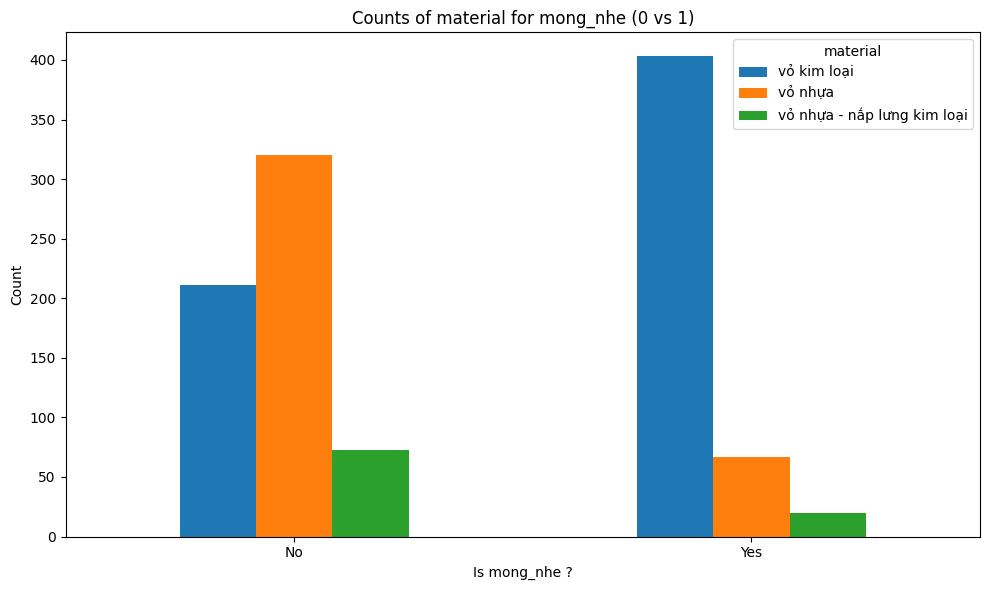

Chi-squared test for mong_nhe and material: Chi2 = 246.4380, p-value = 0.000000
-> Significant association between mong_nhe and material
Contifency table for mong_nhe and manufacturer:
 manufacturer  acer  apple  asus  dell  gigabyte  hp  huawei  lenovo  lg  \
mong_nhe                                                                  
0               68    118   142    66         9  56       1      79   0   
1               17    267    53    22         3  34       1      54  14   

manufacturer  masstel  msi  samsung  vaio  
mong_nhe                                   
0                   1   63        0     1  
1                   0   23        2     0  


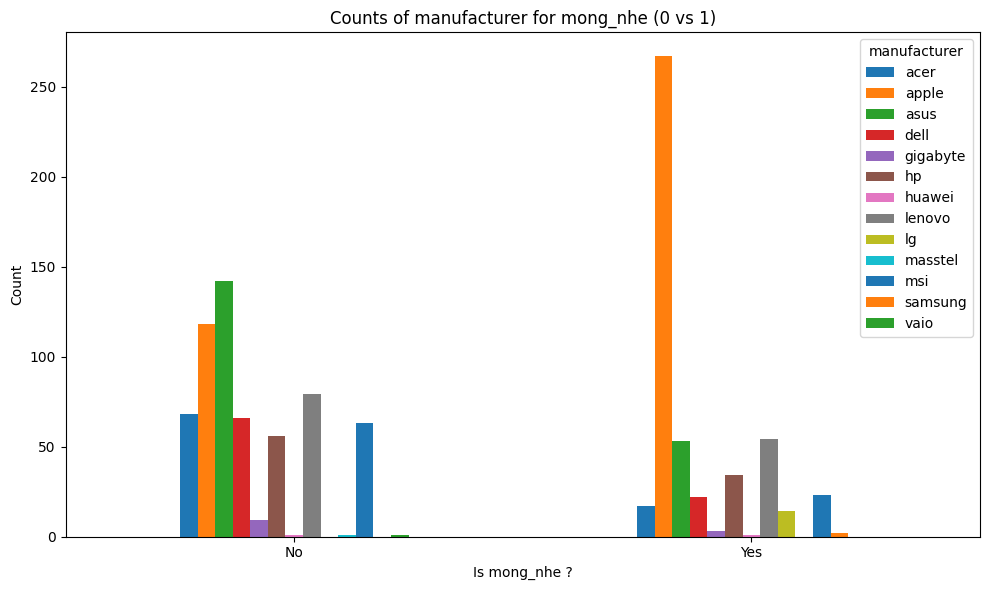

Chi-squared test for mong_nhe and manufacturer: Chi2 = 190.7592, p-value = 0.000000
-> Significant association between mong_nhe and manufacturer
Contifency table for mong_nhe and ram_type:
 ram_type  ddr4  ddr5  gddr5  lpddr4  lpddr4x  lpddr5  lpddr5x
mong_nhe                                                     
0          213   211      1       2        3     140       34
1           58    44      0       6        4     190      188


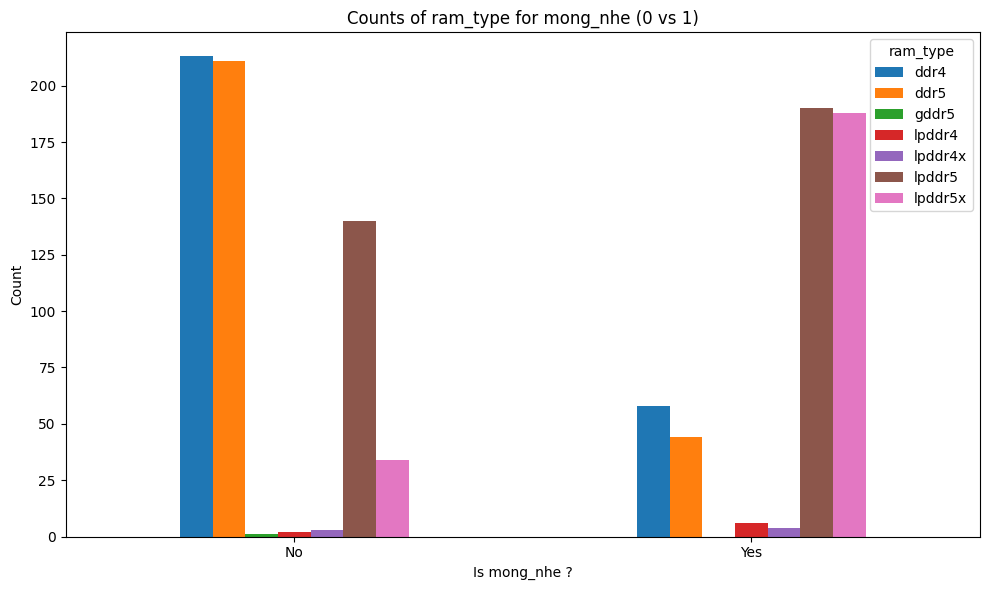

Chi-squared test for mong_nhe and ram_type: Chi2 = 307.0237, p-value = 0.000000
-> Significant association between mong_nhe and ram_type
Contifency table for mong_nhe and os_version:
 os_version  chrome os  free dos  macos  windows 10  windows 11
mong_nhe                                                      
0                   0        11    118           4         471
1                   2         1    267           1         219


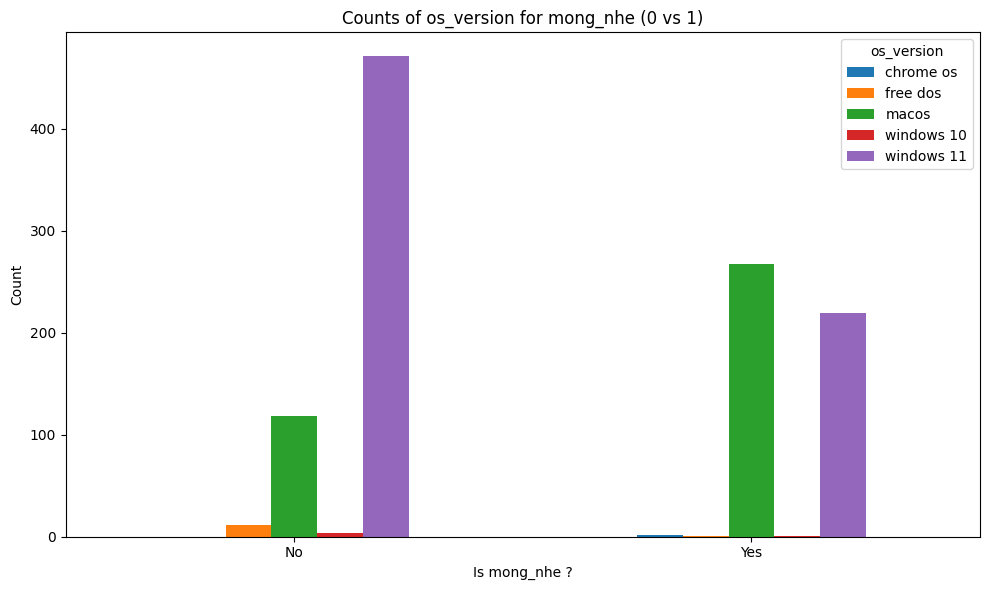

Chi-squared test for mong_nhe and os_version: Chi2 = 151.5999, p-value = 0.000000
-> Significant association between mong_nhe and os_version
Contifency table for mong_nhe and laptop_color:
 laptop_color  be  bạc  cam  hồng  trắng  tím  vàng  xanh dương  xanh lá  xám  \
mong_nhe                                                                       
0              1  132    5     9      1    5    24          30        8  175   
1              1  141    0     0      6    1    51          88        0   98   

laptop_color  đen  
mong_nhe           
0             214  
1             104  


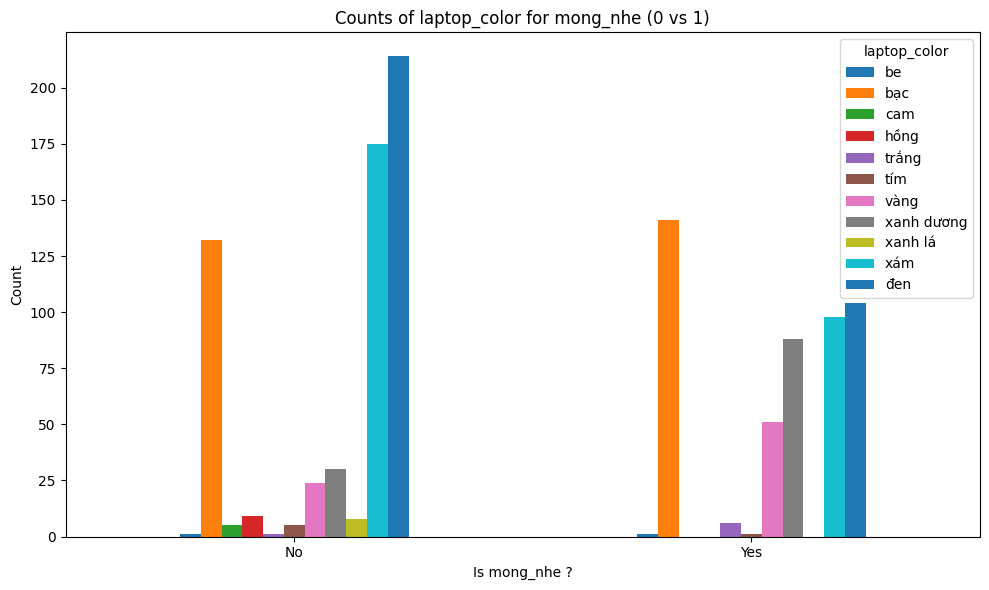

Chi-squared test for mong_nhe and laptop_color: Chi2 = 115.9108, p-value = 0.000000
-> Significant association between mong_nhe and laptop_color
Contifency table for mong_nhe and vga_brand:
 vga_brand  amd  apple  intel  nvidia  qualcomm
mong_nhe                                      
0           25    118    229     226         6
1           29    267    169      20         5


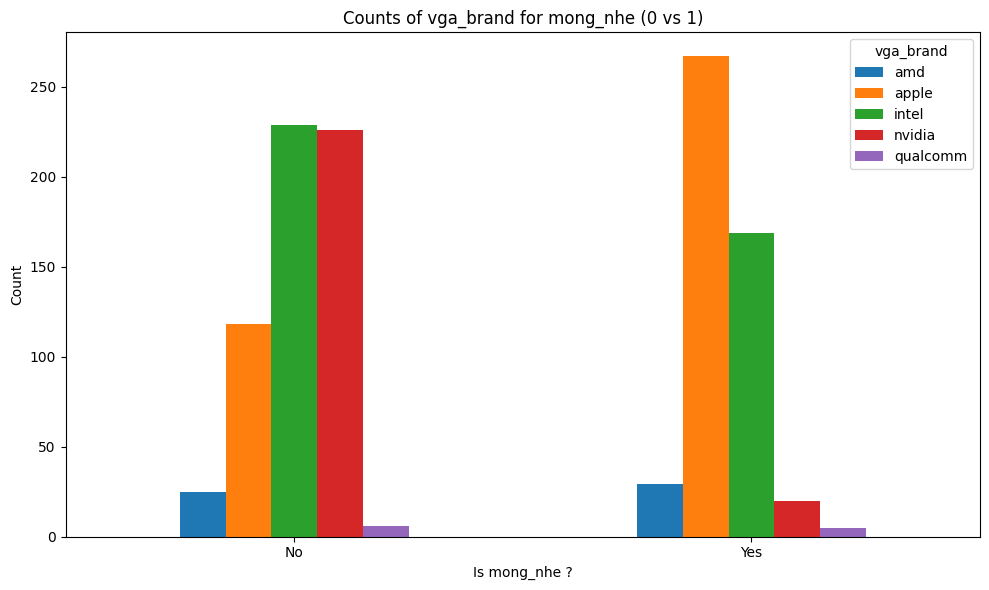

Chi-squared test for mong_nhe and vga_brand: Chi2 = 230.2220, p-value = 0.000000
-> Significant association between mong_nhe and vga_brand
Contifency table for mong_nhe and cpu_series:
 cpu_series  celeron  core 5  core 7  core i3  core i5  core i7  core i9  \
mong_nhe                                                                  
0                 1       7       6       22      192      104       10   
1                 2       2       2       11       46       30        2   

cpu_series  core ultra 5  core ultra 7  core ultra 9  ...  ryzen 9  \
mong_nhe                                              ...            
0                     16            23            17  ...        4   
1                     34            47             7  ...        0   

cpu_series  ryzen ai 5  ryzen ai 7  ryzen ai 9  ryzen ai max+  ryzen r7  \
mong_nhe                                                                  
0                    0           5           4              0         1   
1      

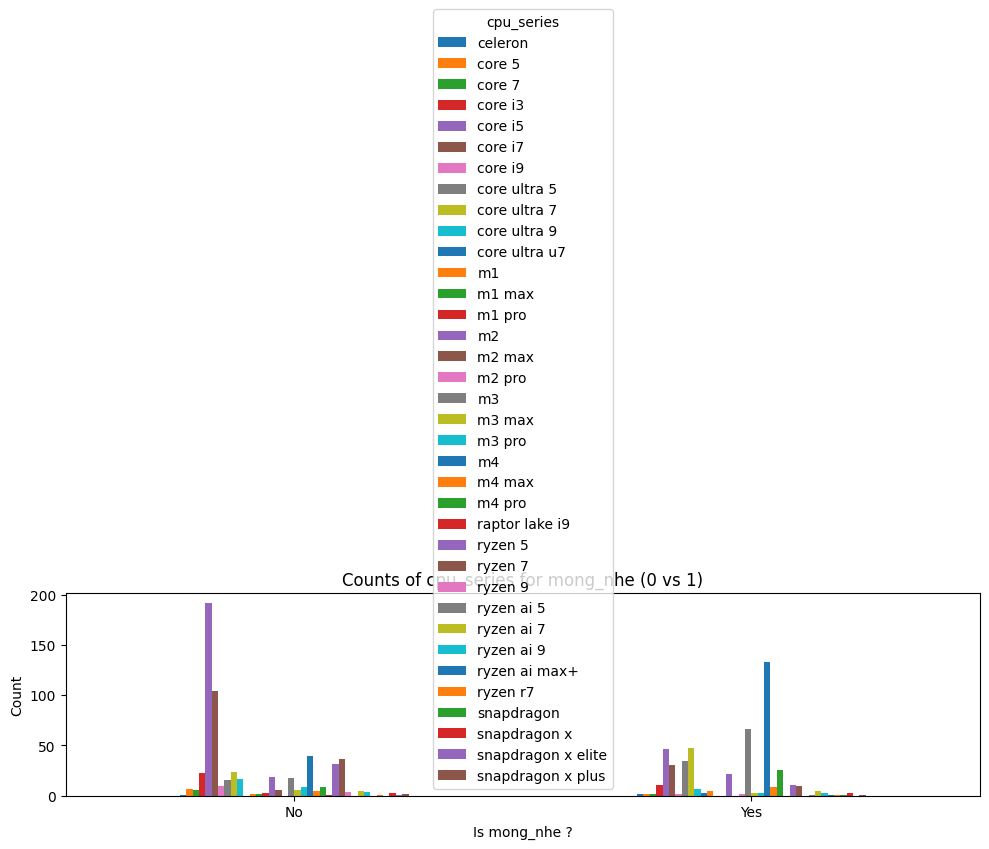

Chi-squared test for mong_nhe and cpu_series: Chi2 = 297.3185, p-value = 0.000000
-> Significant association between mong_nhe and cpu_series
Contifency table for mong_nhe and laptop_camera:
 laptop_camera  full hd   hd
mong_nhe                   
0                  258  346
1                  396   94


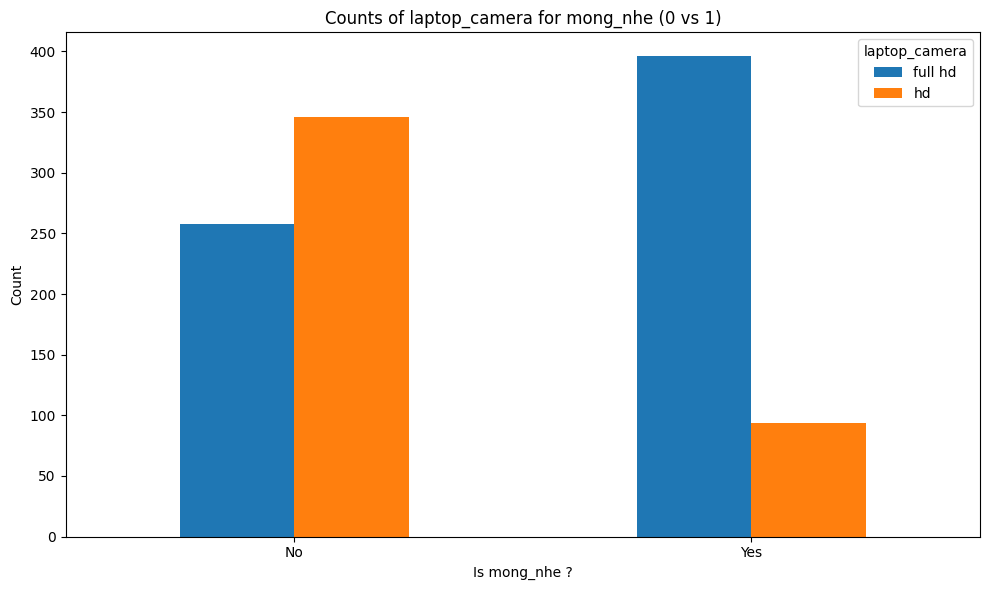

Chi-squared test for mong_nhe and laptop_camera: Chi2 = 161.7600, p-value = 0.000000
-> Significant association between mong_nhe and laptop_camera
Contifency table for mong_nhe and cpu_brand:
 cpu_brand  amd  apple  intel  qualcomm
mong_nhe                              
0           81    118    399         6
1           32    267    186         5


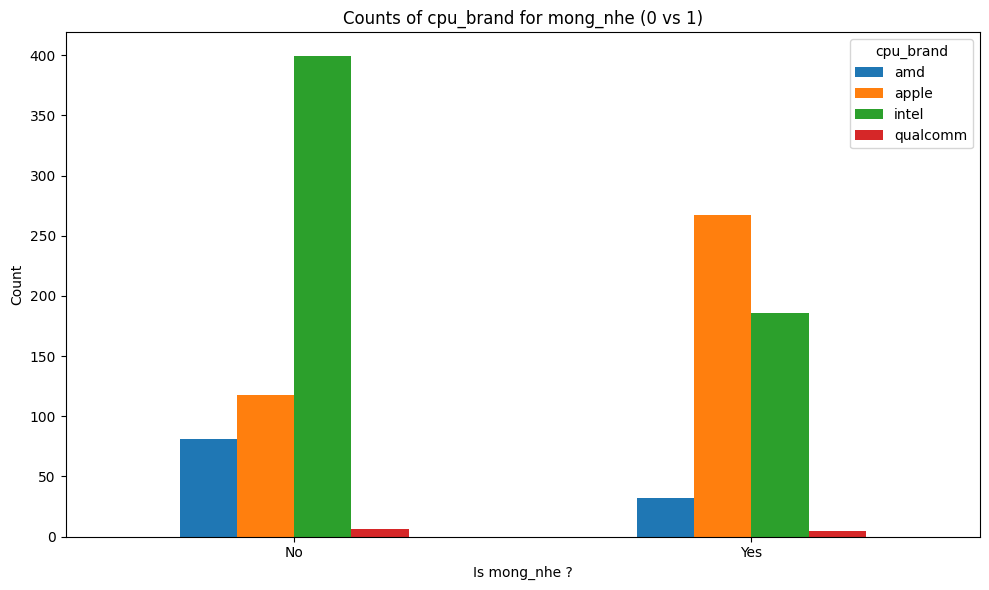

Chi-squared test for mong_nhe and cpu_brand: Chi2 = 146.2664, p-value = 0.000000
-> Significant association between mong_nhe and cpu_brand
Contifency table for mong_nhe and cpu_model:
 cpu_model  1005g1  10300h  1115g4  1135g7  11400h  1155g7  115g4  1165g7  \
mong_nhe                                                                   
0               2       1       0       2       4       1      0       0   
1               0       0       3       0       0       0      1       1   

cpu_model  11800h  1195g7  ...  m4 pro  n305  n4120  n4500  x1  x1 26 100  \
mong_nhe                   ...                                              
0               2       0  ...       9     2      1      0   1          1   
1               0       1  ...      25     0      0      2   1          0   

cpu_model  x1e  x1e 78 100  x1p  x1p 42 100  
mong_nhe                                     
0            1           0    2           1  
1            0           1    2           1  

[2 rows x 114 co

<ipython-input-5-3f9f4a22c72a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


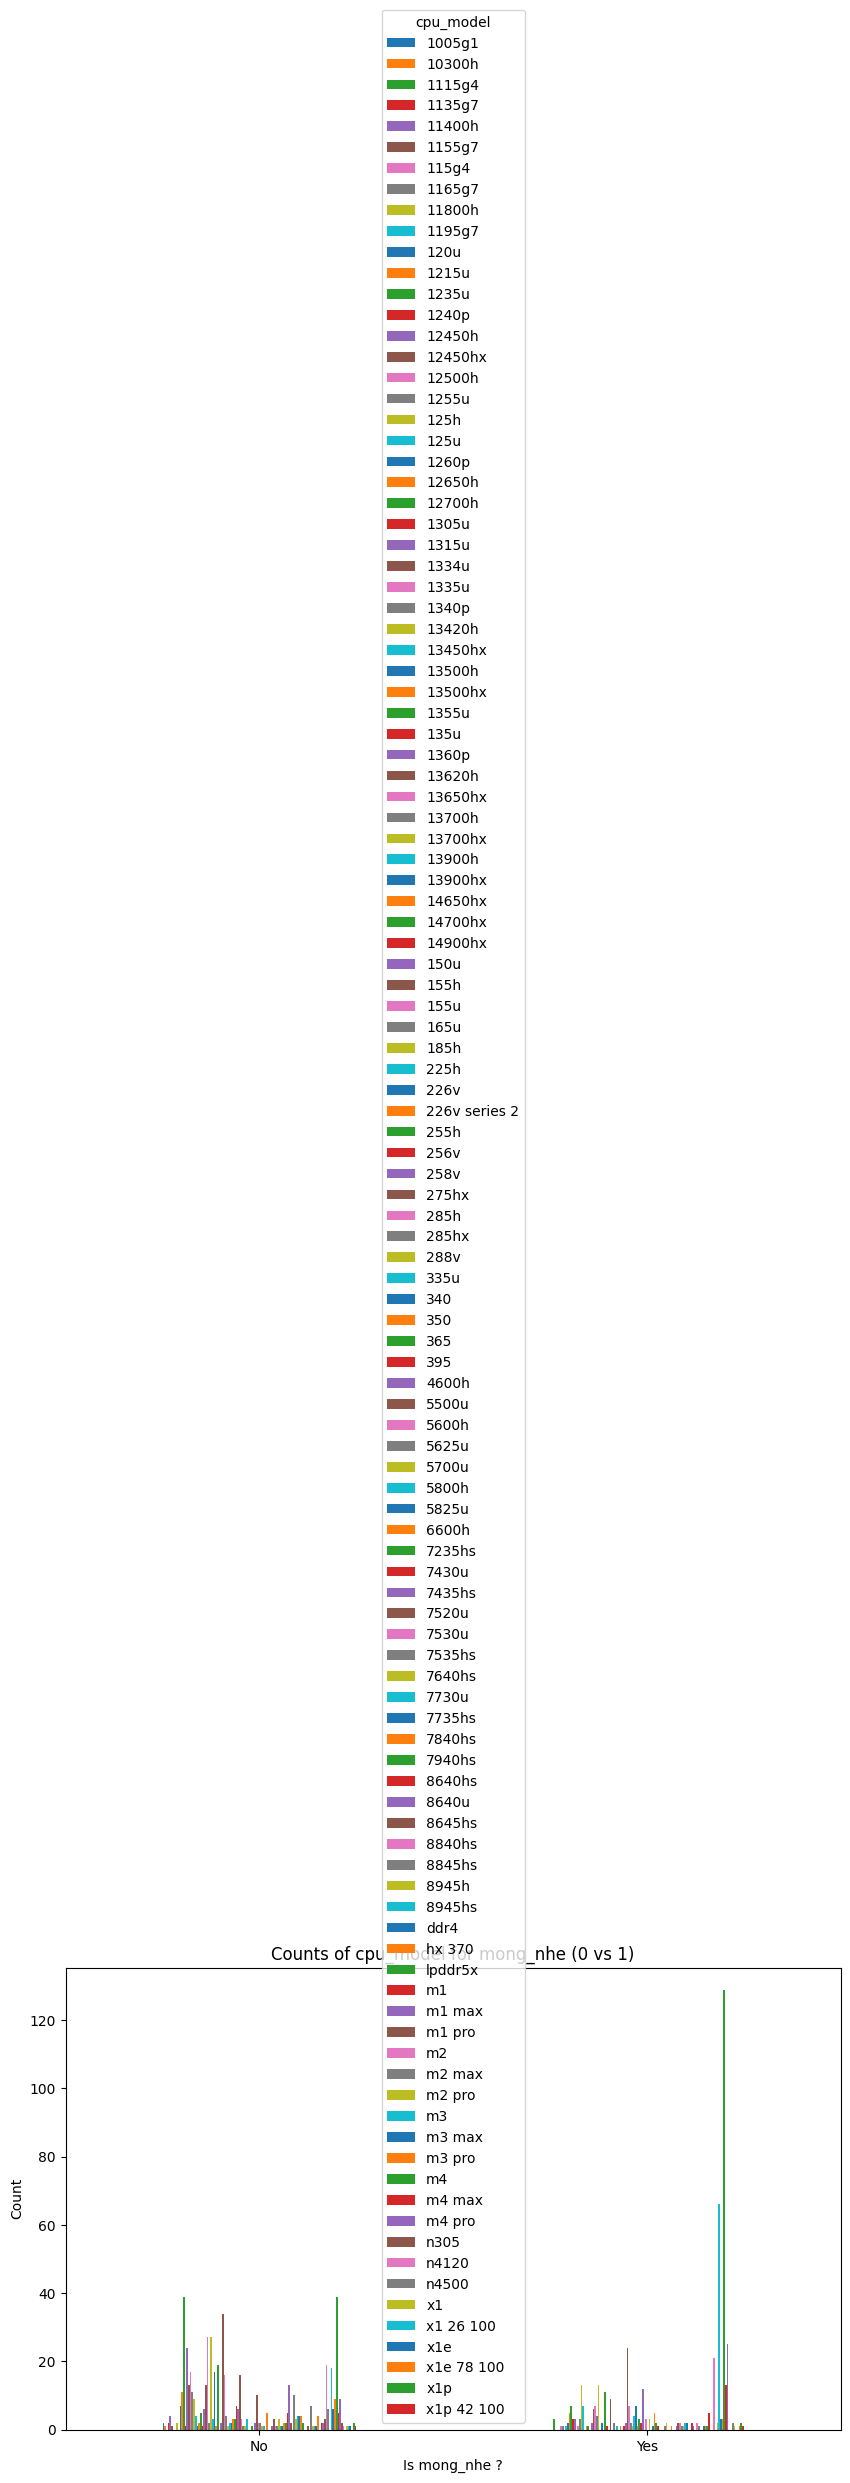

Chi-squared test for mong_nhe and cpu_model: Chi2 = 392.2099, p-value = 0.000000
-> Significant association between mong_nhe and cpu_model
Contifency table for mong_nhe and vga_type:
 vga_type  card rời  card tích hợp
mong_nhe                         
0              242            362
1               35            455


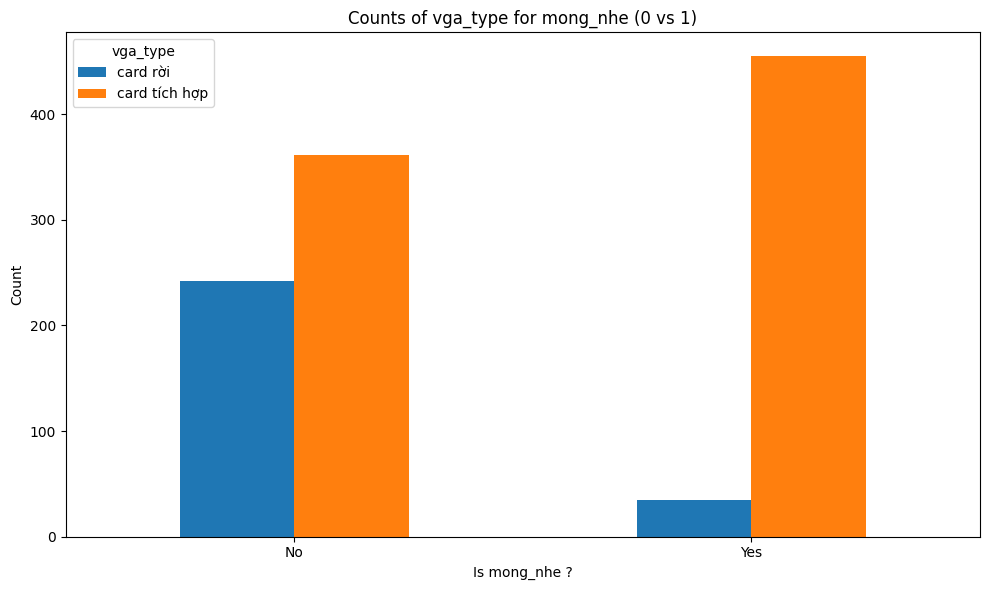

Chi-squared test for mong_nhe and vga_type: Chi2 = 153.3442, p-value = 0.000000
-> Significant association between mong_nhe and vga_type


In [ ]:
basic_eda('mong_nhe')

## Do hoa ki thuat

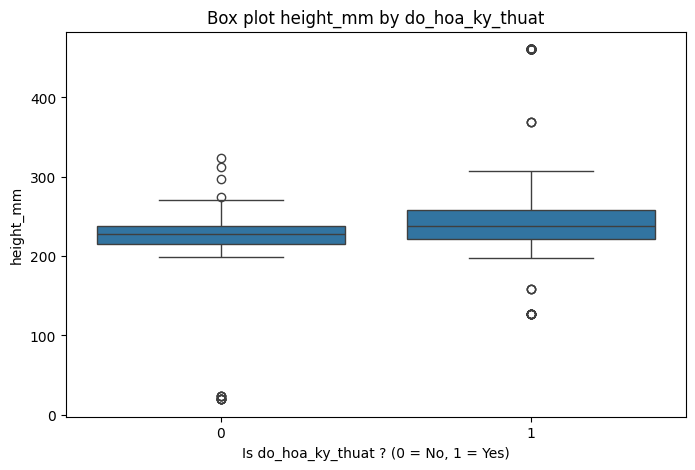

Mann-Whitney U test for height_mm vs do_hoa_ky_thuat: U-statistic = 196,466, p-value = 0.0000
-> Significant difference in height_mm between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 237.6
Median for do_hoa_ky_thuat = 0: 227.75


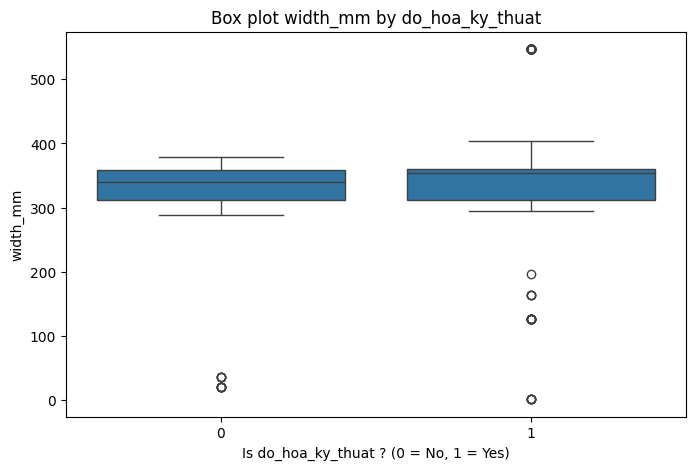

Mann-Whitney U test for width_mm vs do_hoa_ky_thuat: U-statistic = 172,641, p-value = 0.0000
-> Significant difference in width_mm between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 354.0
Median for do_hoa_ky_thuat = 0: 339.85


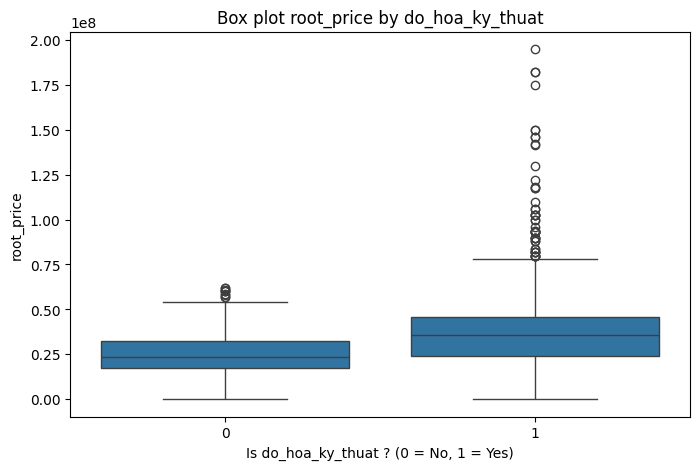

Mann-Whitney U test for root_price vs do_hoa_ky_thuat: U-statistic = 215,954, p-value = 0.0000
-> Significant difference in root_price between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 35490000.0
Median for do_hoa_ky_thuat = 0: 23190000.0


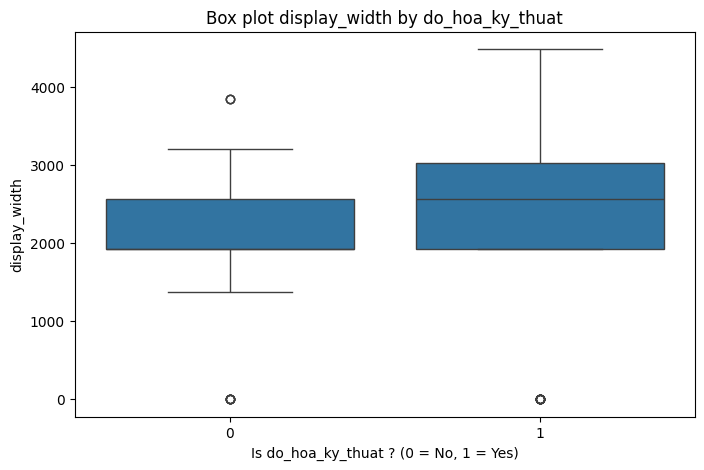

Mann-Whitney U test for display_width vs do_hoa_ky_thuat: U-statistic = 195,634, p-value = 0.0000
-> Significant difference in display_width between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 2560.0
Median for do_hoa_ky_thuat = 0: 1920.0


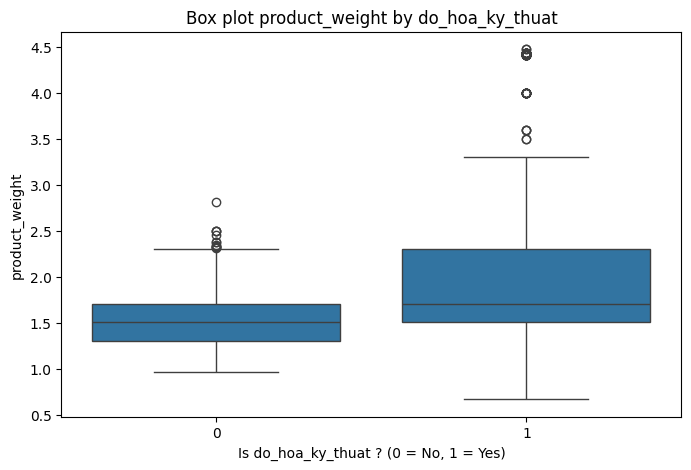

Mann-Whitney U test for product_weight vs do_hoa_ky_thuat: U-statistic = 200,144, p-value = 0.0000
-> Significant difference in product_weight between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 1.7
Median for do_hoa_ky_thuat = 0: 1.51


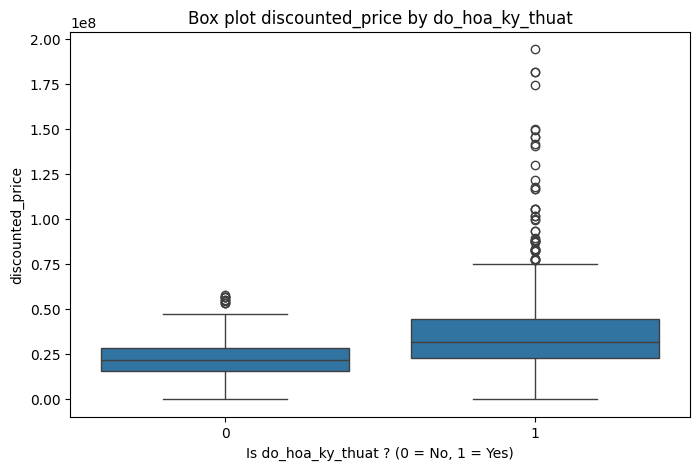

Mann-Whitney U test for discounted_price vs do_hoa_ky_thuat: U-statistic = 222,432, p-value = 0.0000
-> Significant difference in discounted_price between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 31990000.0
Median for do_hoa_ky_thuat = 0: 21490000.0


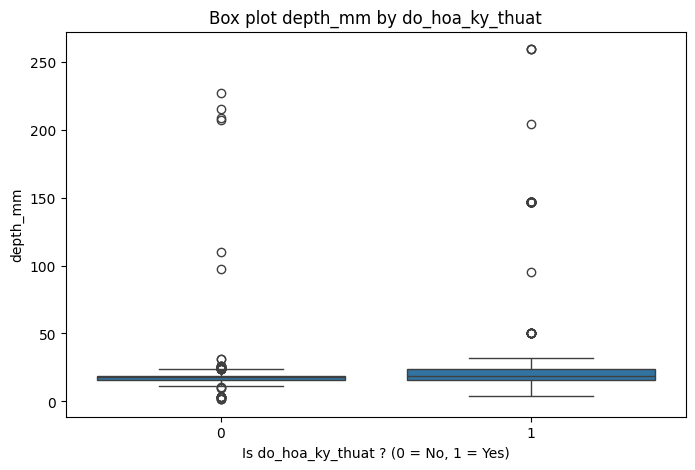

Mann-Whitney U test for depth_mm vs do_hoa_ky_thuat: U-statistic = 172,978, p-value = 0.0000
-> Significant difference in depth_mm between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 18.9
Median for do_hoa_ky_thuat = 0: 17.9


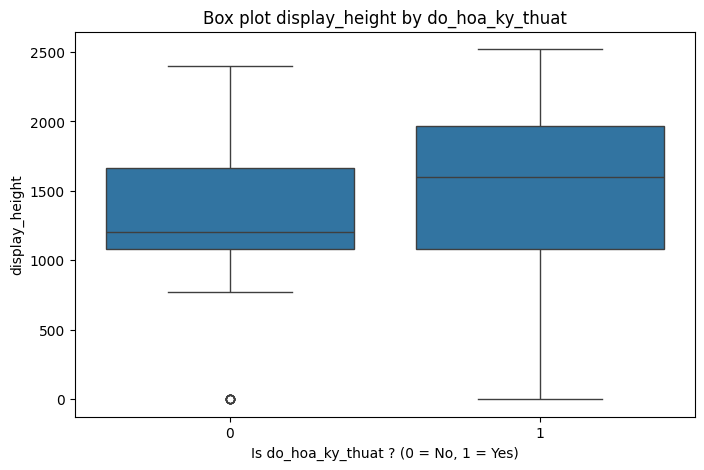

Mann-Whitney U test for display_height vs do_hoa_ky_thuat: U-statistic = 192,655, p-value = 0.0000
-> Significant difference in display_height between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 1600.0
Median for do_hoa_ky_thuat = 0: 1200.0


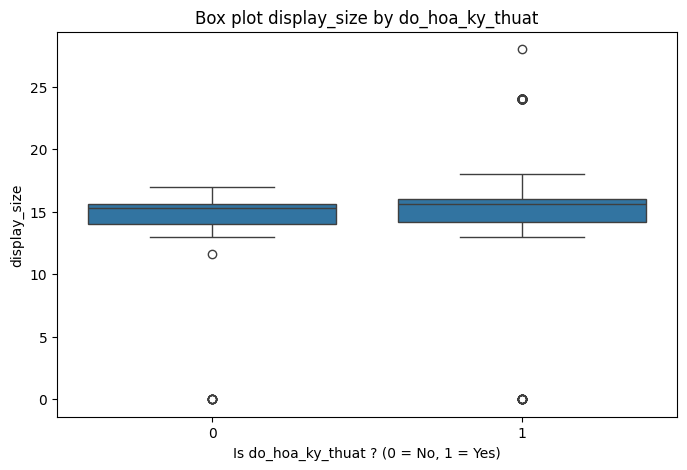

Mann-Whitney U test for display_size vs do_hoa_ky_thuat: U-statistic = 191,663, p-value = 0.0000
-> Significant difference in display_size between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 15.6
Median for do_hoa_ky_thuat = 0: 15.3


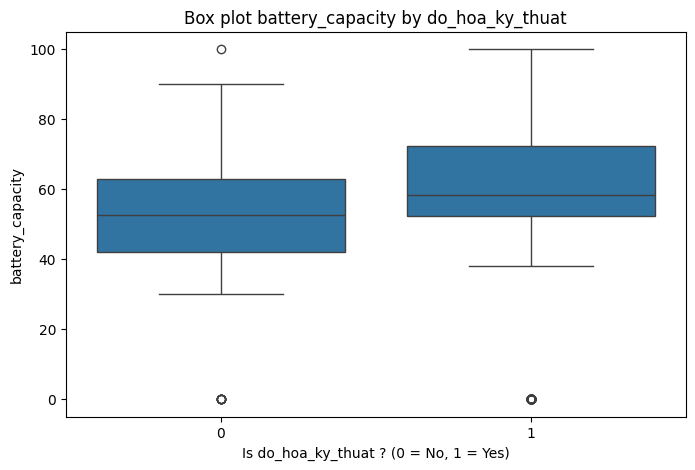

Mann-Whitney U test for battery_capacity vs do_hoa_ky_thuat: U-statistic = 187,572, p-value = 0.0000
-> Significant difference in battery_capacity between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 58.2
Median for do_hoa_ky_thuat = 0: 52.6


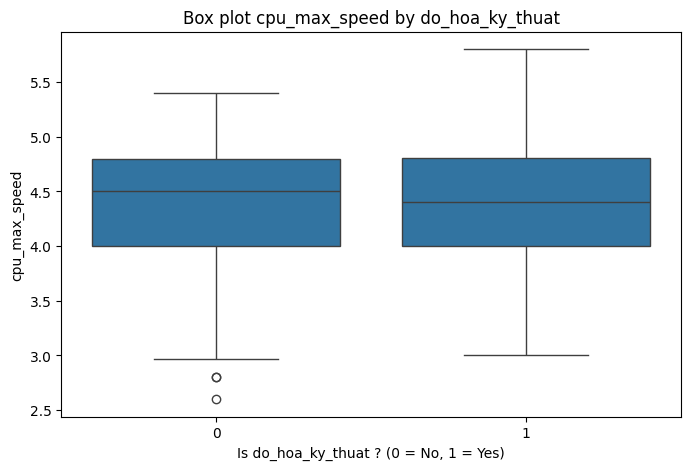

Mann-Whitney U test for cpu_max_speed vs do_hoa_ky_thuat: U-statistic = 139,725, p-value = 0.0580
-> No significant different


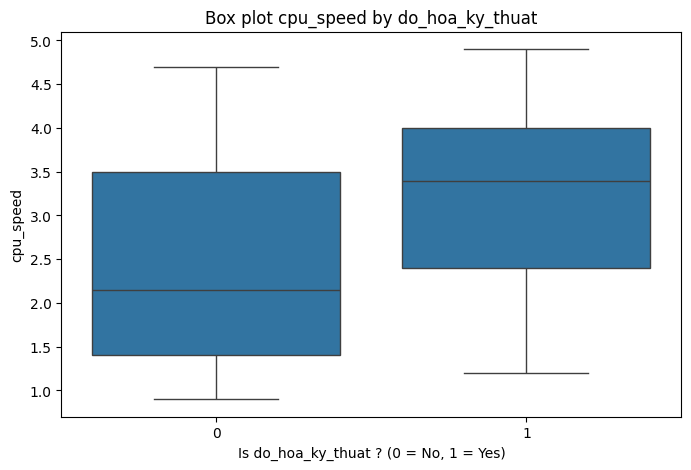

Mann-Whitney U test for cpu_speed vs do_hoa_ky_thuat: U-statistic = 212,890, p-value = 0.0000
-> Significant difference in cpu_speed between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 3.3890414476394652
Median for do_hoa_ky_thuat = 0: 2.1484861373901367


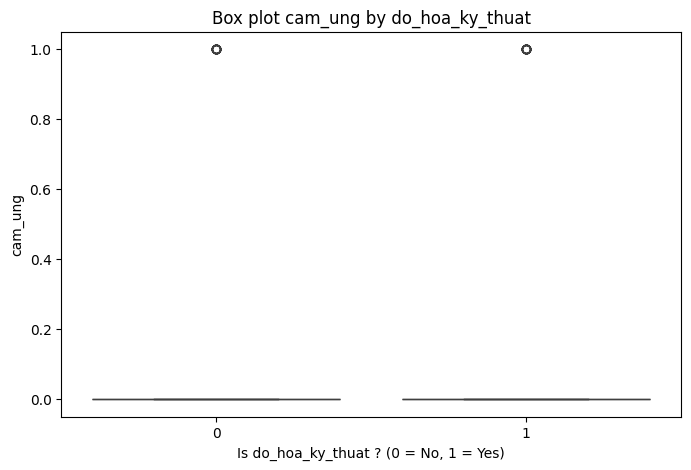

Mann-Whitney U test for cam_ung vs do_hoa_ky_thuat: U-statistic = 149,492, p-value = 0.9533
-> No significant different


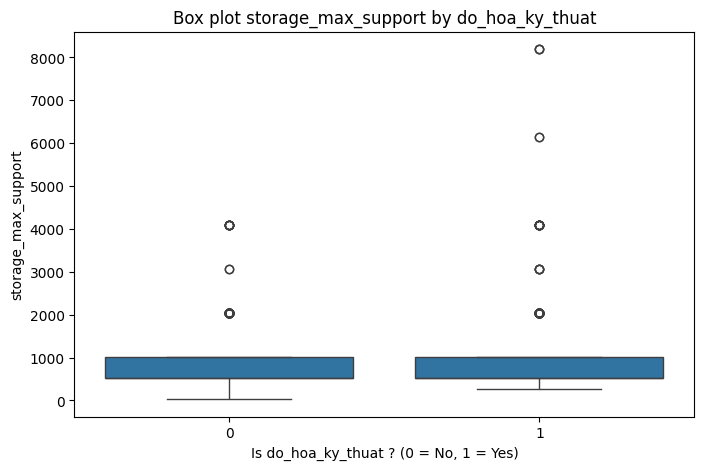

Mann-Whitney U test for storage_max_support vs do_hoa_ky_thuat: U-statistic = 161,940, p-value = 0.0122
-> Significant difference in storage_max_support between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 512.0
Median for do_hoa_ky_thuat = 0: 512.0


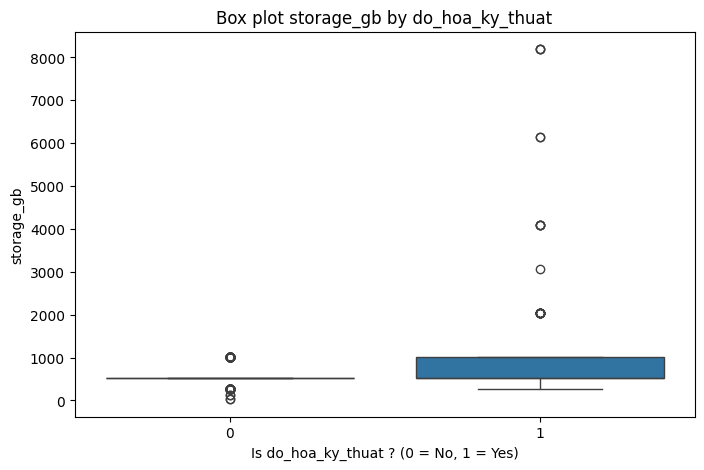

Mann-Whitney U test for storage_gb vs do_hoa_ky_thuat: U-statistic = 173,240, p-value = 0.0000
-> Significant difference in storage_gb between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 512.0
Median for do_hoa_ky_thuat = 0: 512.0


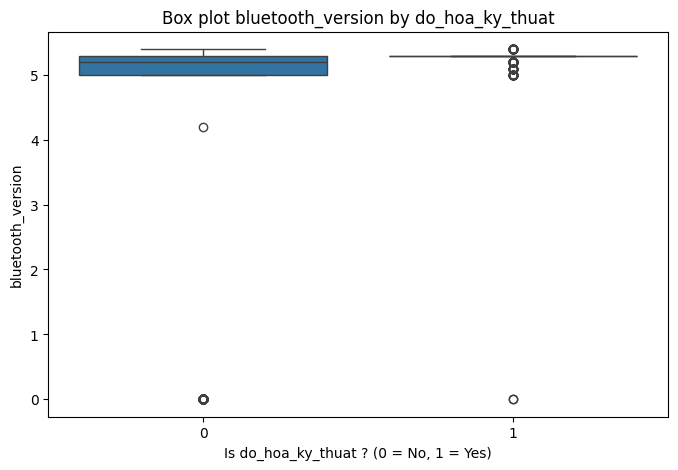

Mann-Whitney U test for bluetooth_version vs do_hoa_ky_thuat: U-statistic = 199,362, p-value = 0.0000
-> Significant difference in bluetooth_version between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 5.3
Median for do_hoa_ky_thuat = 0: 5.2


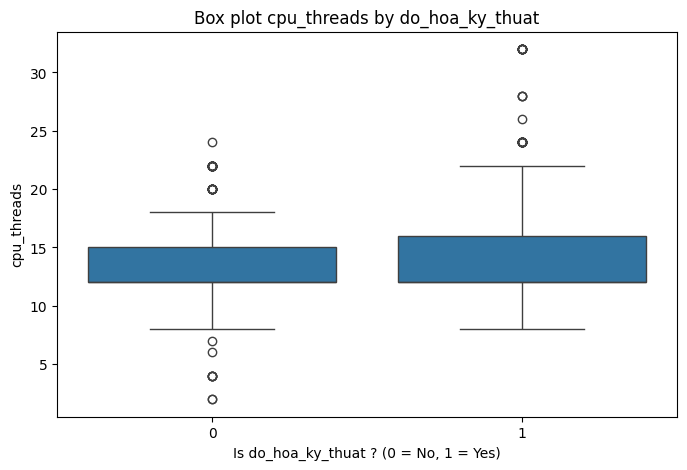

Mann-Whitney U test for cpu_threads vs do_hoa_ky_thuat: U-statistic = 184,560, p-value = 0.0000
-> Significant difference in cpu_threads between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 12.0
Median for do_hoa_ky_thuat = 0: 12.0


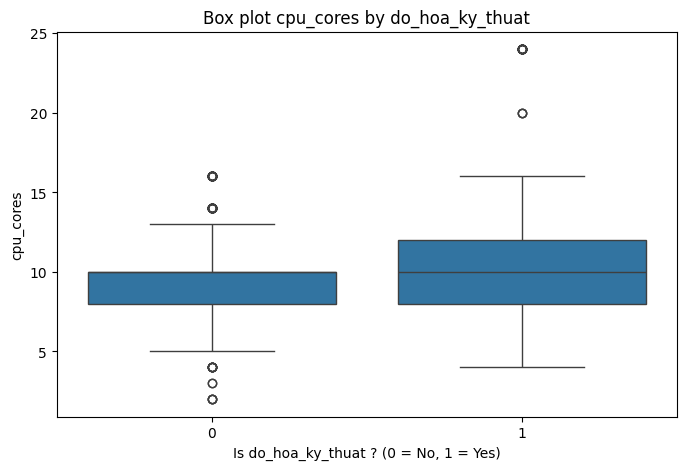

Mann-Whitney U test for cpu_cores vs do_hoa_ky_thuat: U-statistic = 185,952, p-value = 0.0000
-> Significant difference in cpu_cores between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 10.0
Median for do_hoa_ky_thuat = 0: 10.0


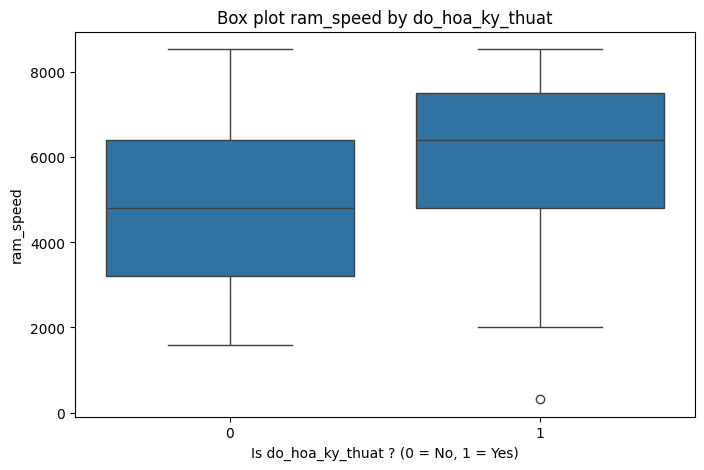

Mann-Whitney U test for ram_speed vs do_hoa_ky_thuat: U-statistic = 194,348, p-value = 0.0000
-> Significant difference in ram_speed between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 6400.0
Median for do_hoa_ky_thuat = 0: 4800.0


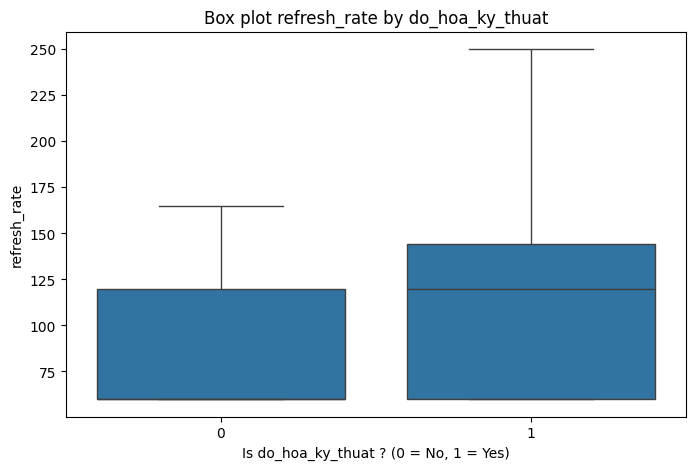

Mann-Whitney U test for refresh_rate vs do_hoa_ky_thuat: U-statistic = 193,958, p-value = 0.0000
-> Significant difference in refresh_rate between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 120.0
Median for do_hoa_ky_thuat = 0: 60.0


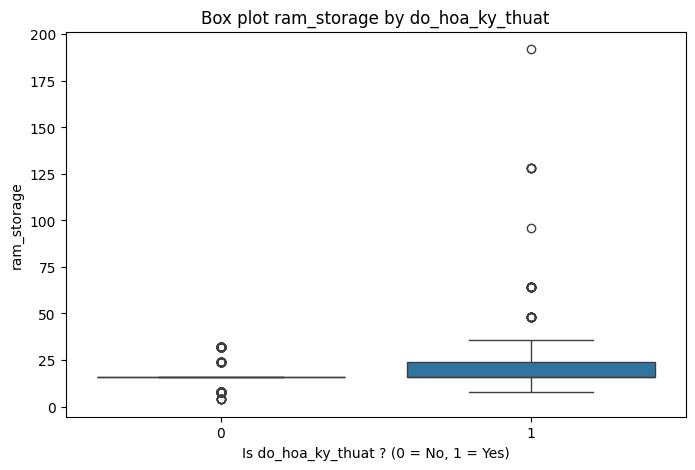

Mann-Whitney U test for ram_storage vs do_hoa_ky_thuat: U-statistic = 186,000, p-value = 0.0000
-> Significant difference in ram_storage between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 16.0
Median for do_hoa_ky_thuat = 0: 16.0


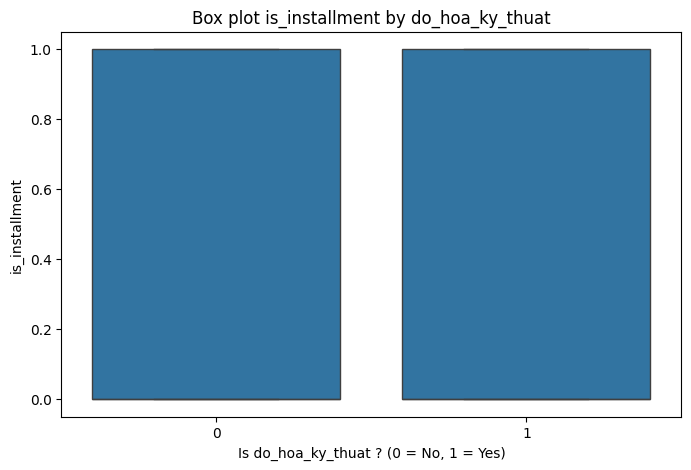

Mann-Whitney U test for is_installment vs do_hoa_ky_thuat: U-statistic = 168,781, p-value = 0.0000
-> Significant difference in is_installment between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 0.0
Median for do_hoa_ky_thuat = 0: 0.0


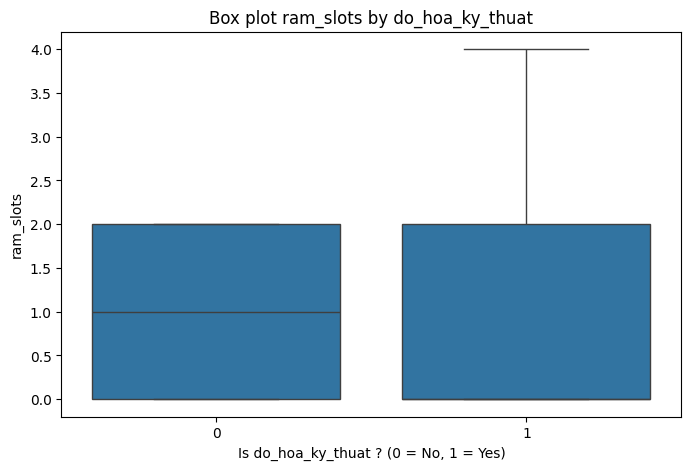

Mann-Whitney U test for ram_slots vs do_hoa_ky_thuat: U-statistic = 135,704, p-value = 0.0024
-> Significant difference in ram_slots between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 0.0
Median for do_hoa_ky_thuat = 0: 1.0


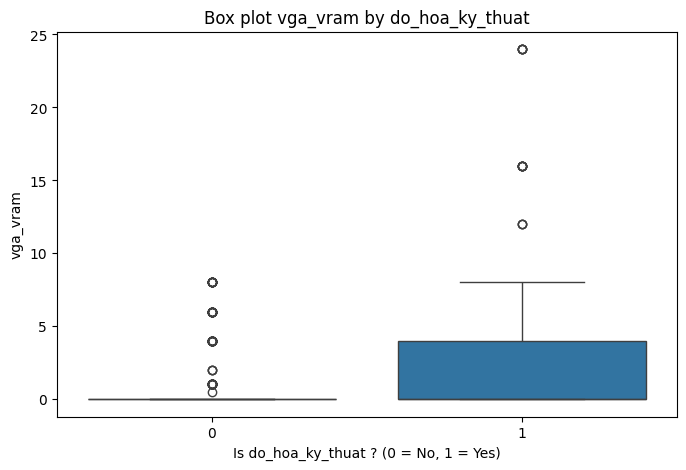

Mann-Whitney U test for vga_vram vs do_hoa_ky_thuat: U-statistic = 179,874, p-value = 0.0000
-> Significant difference in vga_vram between laptop that are 'do_hoa_ky_thuat' and those are not
Median for do_hoa_ky_thuat = 1: 0.0
Median for do_hoa_ky_thuat = 0: 0.0
Contifency table for do_hoa_ky_thuat and material:
 material         vỏ kim loại  vỏ nhựa  vỏ nhựa - nắp lưng kim loại
do_hoa_ky_thuat                                                   
0                        283      223                           36
1                        331      164                           57


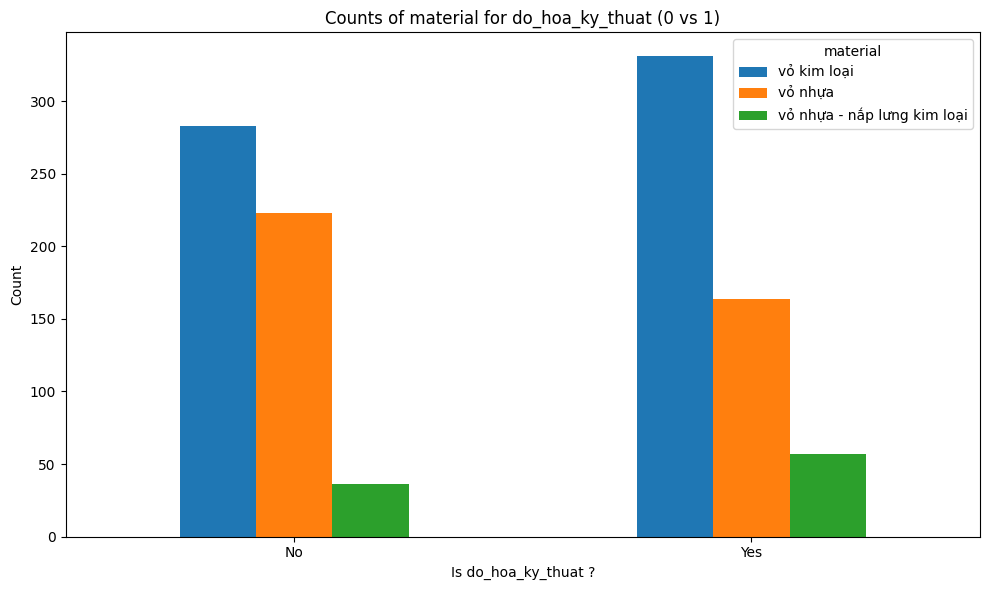

Chi-squared test for do_hoa_ky_thuat and material: Chi2 = 17.3993, p-value = 0.000167
-> Significant association between do_hoa_ky_thuat and material
Contifency table for do_hoa_ky_thuat and manufacturer:
 manufacturer     acer  apple  asus  dell  gigabyte  hp  huawei  lenovo  lg  \
do_hoa_ky_thuat                                                              
0                  50    127   105    65         6  56       2      82  12   
1                  35    258    90    23         6  34       0      51   2   

manufacturer     masstel  msi  samsung  vaio  
do_hoa_ky_thuat                               
0                      1   33        2     1  
1                      0   53        0     0  


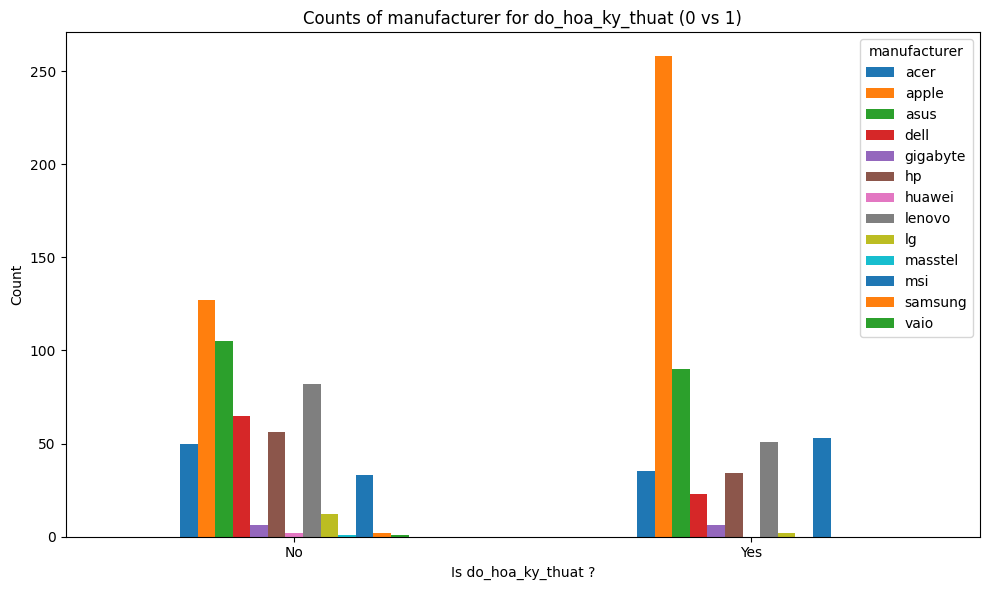

Chi-squared test for do_hoa_ky_thuat and manufacturer: Chi2 = 98.7346, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and manufacturer
Contifency table for do_hoa_ky_thuat and ram_type:
 ram_type         ddr4  ddr5  gddr5  lpddr4  lpddr4x  lpddr5  lpddr5x
do_hoa_ky_thuat                                                     
0                 191   100      0       8        3     141       99
1                  80   155      1       0        4     189      123


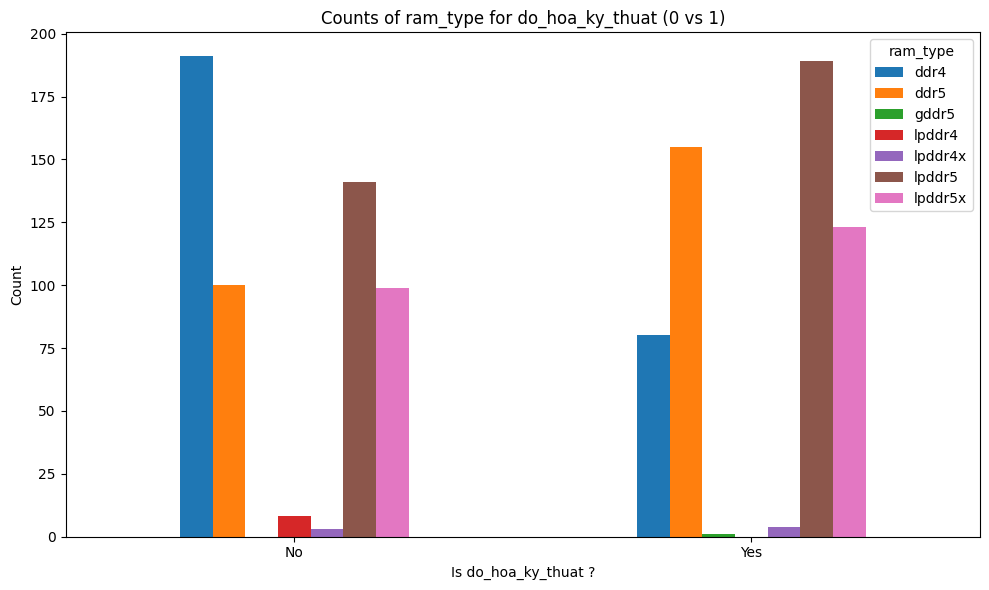

Chi-squared test for do_hoa_ky_thuat and ram_type: Chi2 = 75.9619, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and ram_type
Contifency table for do_hoa_ky_thuat and os_version:
 os_version       chrome os  free dos  macos  windows 10  windows 11
do_hoa_ky_thuat                                                    
0                        2        11    127           5         397
1                        0         1    258           0         293


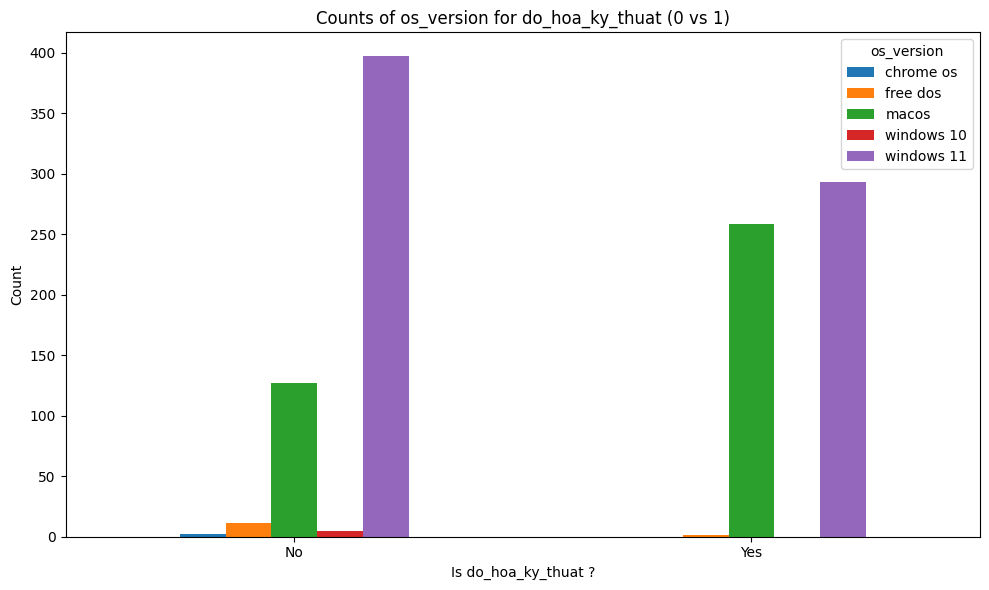

Chi-squared test for do_hoa_ky_thuat and os_version: Chi2 = 75.4976, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and os_version
Contifency table for do_hoa_ky_thuat and laptop_color:
 laptop_color     be  bạc  cam  hồng  trắng  tím  vàng  xanh dương  xanh lá  \
do_hoa_ky_thuat                                                              
0                 1  144    0     0      5    1    37          52        0   
1                 1  129    5     9      2    5    38          66        8   

laptop_color     xám  đen  
do_hoa_ky_thuat            
0                144  158  
1                129  160  


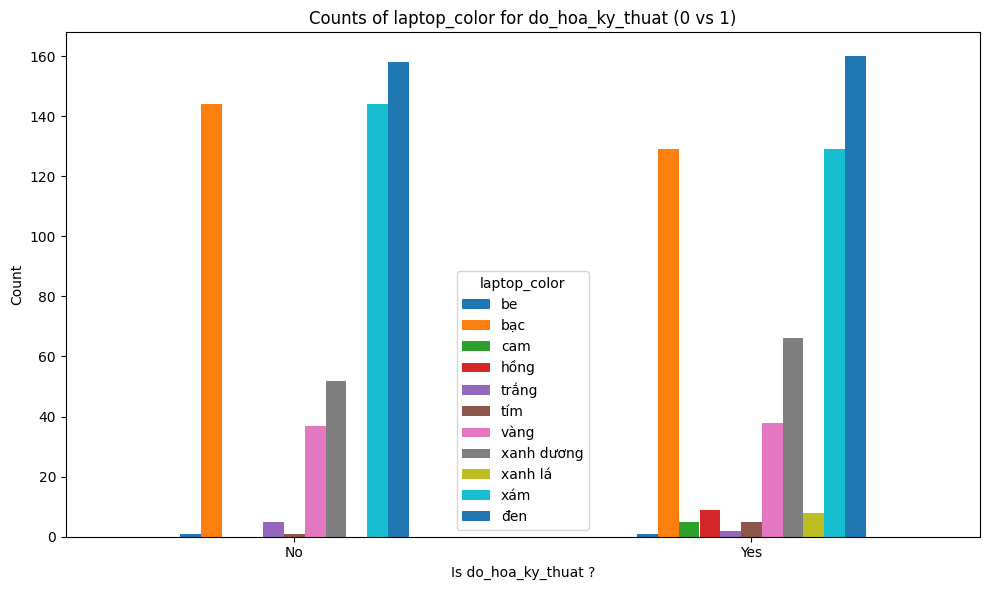

Chi-squared test for do_hoa_ky_thuat and laptop_color: Chi2 = 29.1987, p-value = 0.001157
-> Significant association between do_hoa_ky_thuat and laptop_color
Contifency table for do_hoa_ky_thuat and vga_brand:
 vga_brand        amd  apple  intel  nvidia  qualcomm
do_hoa_ky_thuat                                     
0                 43    127    303      62         7
1                 11    258     95     184         4


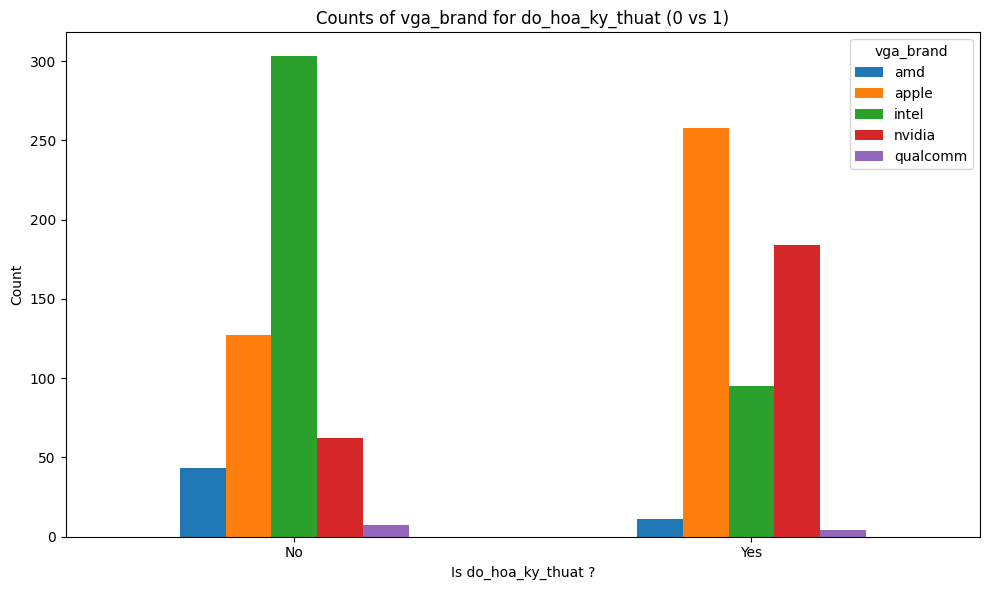

Chi-squared test for do_hoa_ky_thuat and vga_brand: Chi2 = 233.4909, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and vga_brand
Contifency table for do_hoa_ky_thuat and cpu_series:
 cpu_series       celeron  core 5  core 7  core i3  core i5  core i7  core i9  \
do_hoa_ky_thuat                                                                
0                      3       7       2       30      147       70        2   
1                      0       2       6        3       91       64       10   

cpu_series       core ultra 5  core ultra 7  core ultra 9  ...  ryzen 9  \
do_hoa_ky_thuat                                            ...            
0                          36            44             7  ...        2   
1                          14            26            17  ...        2   

cpu_series       ryzen ai 5  ryzen ai 7  ryzen ai 9  ryzen ai max+  ryzen r7  \
do_hoa_ky_thuat                                                                
0          

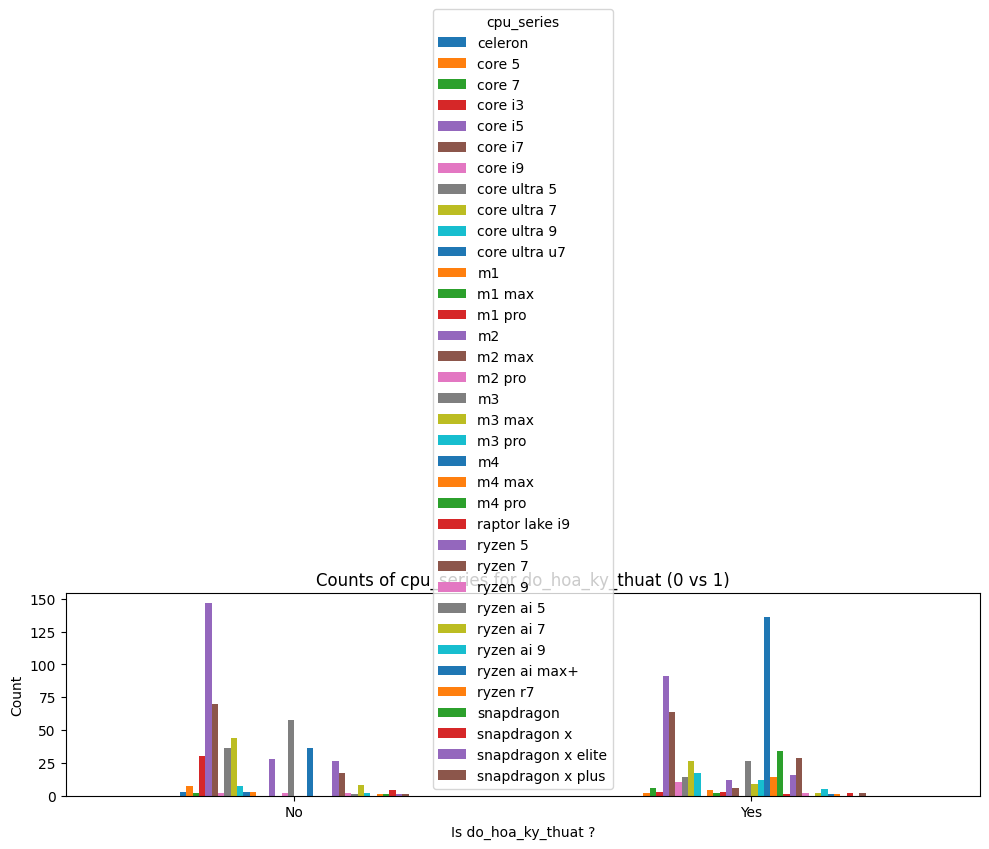

Chi-squared test for do_hoa_ky_thuat and cpu_series: Chi2 = 245.3214, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and cpu_series
Contifency table for do_hoa_ky_thuat and laptop_camera:
 laptop_camera    full hd   hd
do_hoa_ky_thuat              
0                    292  250
1                    362  190


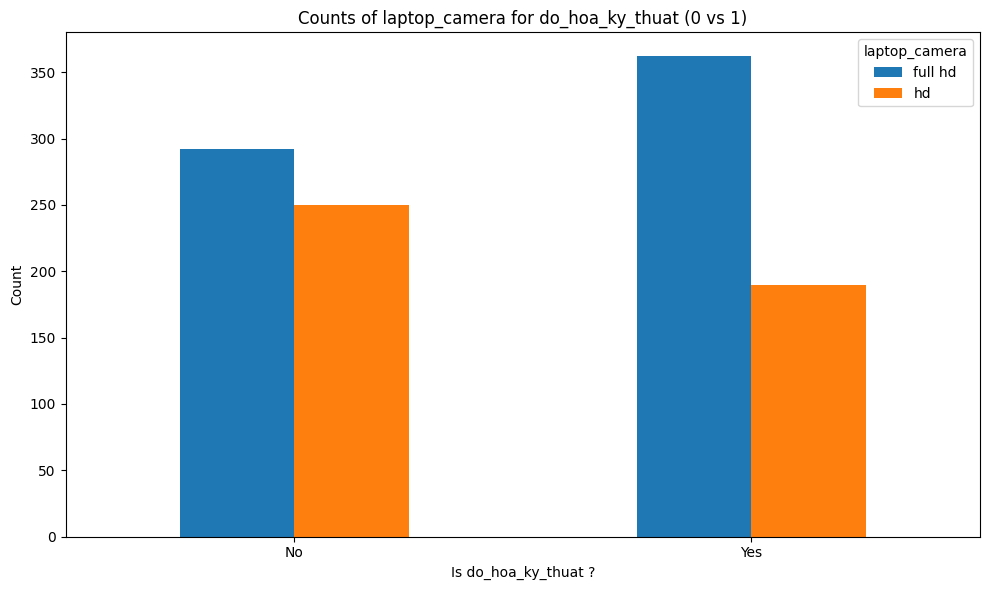

Chi-squared test for do_hoa_ky_thuat and laptop_camera: Chi2 = 15.1010, p-value = 0.000102
-> Significant association between do_hoa_ky_thuat and laptop_camera
Contifency table for do_hoa_ky_thuat and cpu_brand:
 cpu_brand        amd  apple  intel  qualcomm
do_hoa_ky_thuat                             
0                 57    127    351         7
1                 56    258    234         4


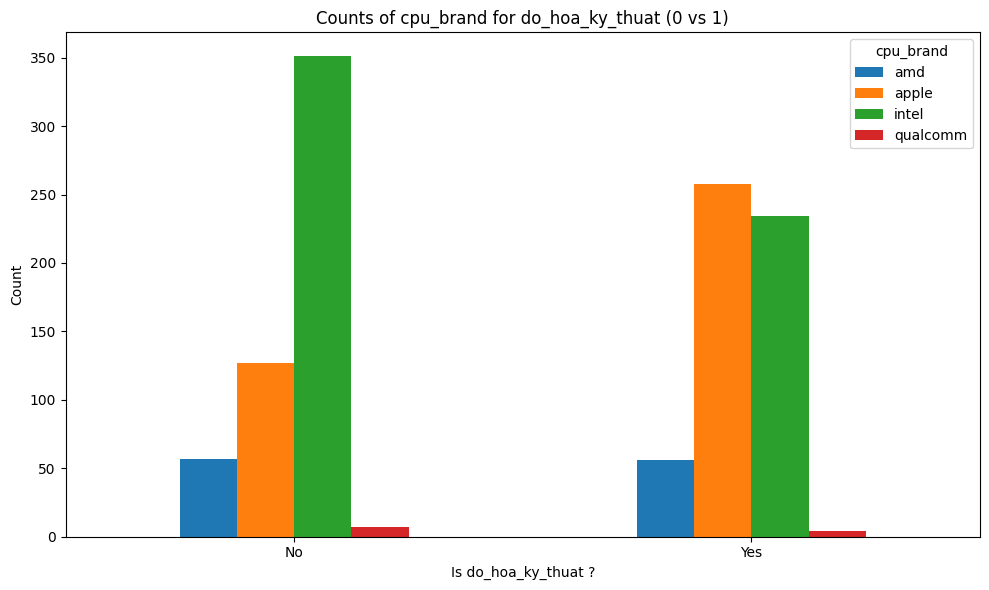

Chi-squared test for do_hoa_ky_thuat and cpu_brand: Chi2 = 68.7154, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and cpu_brand
Contifency table for do_hoa_ky_thuat and cpu_model:
 cpu_model        1005g1  10300h  1115g4  1135g7  11400h  1155g7  115g4  \
do_hoa_ky_thuat                                                          
0                     2       0       3       2       3       1      1   
1                     0       1       0       0       1       0      0   

cpu_model        1165g7  11800h  1195g7  ...  m4 pro  n305  n4120  n4500  x1  \
do_hoa_ky_thuat                          ...                                   
0                     1       2       1  ...       0     2      1      2   2   
1                     0       0       0  ...      34     0      0      0   0   

cpu_model        x1 26 100  x1e  x1e 78 100  x1p  x1p 42 100  
do_hoa_ky_thuat                                               
0                        0    1           0    2   

<ipython-input-5-3f9f4a22c72a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


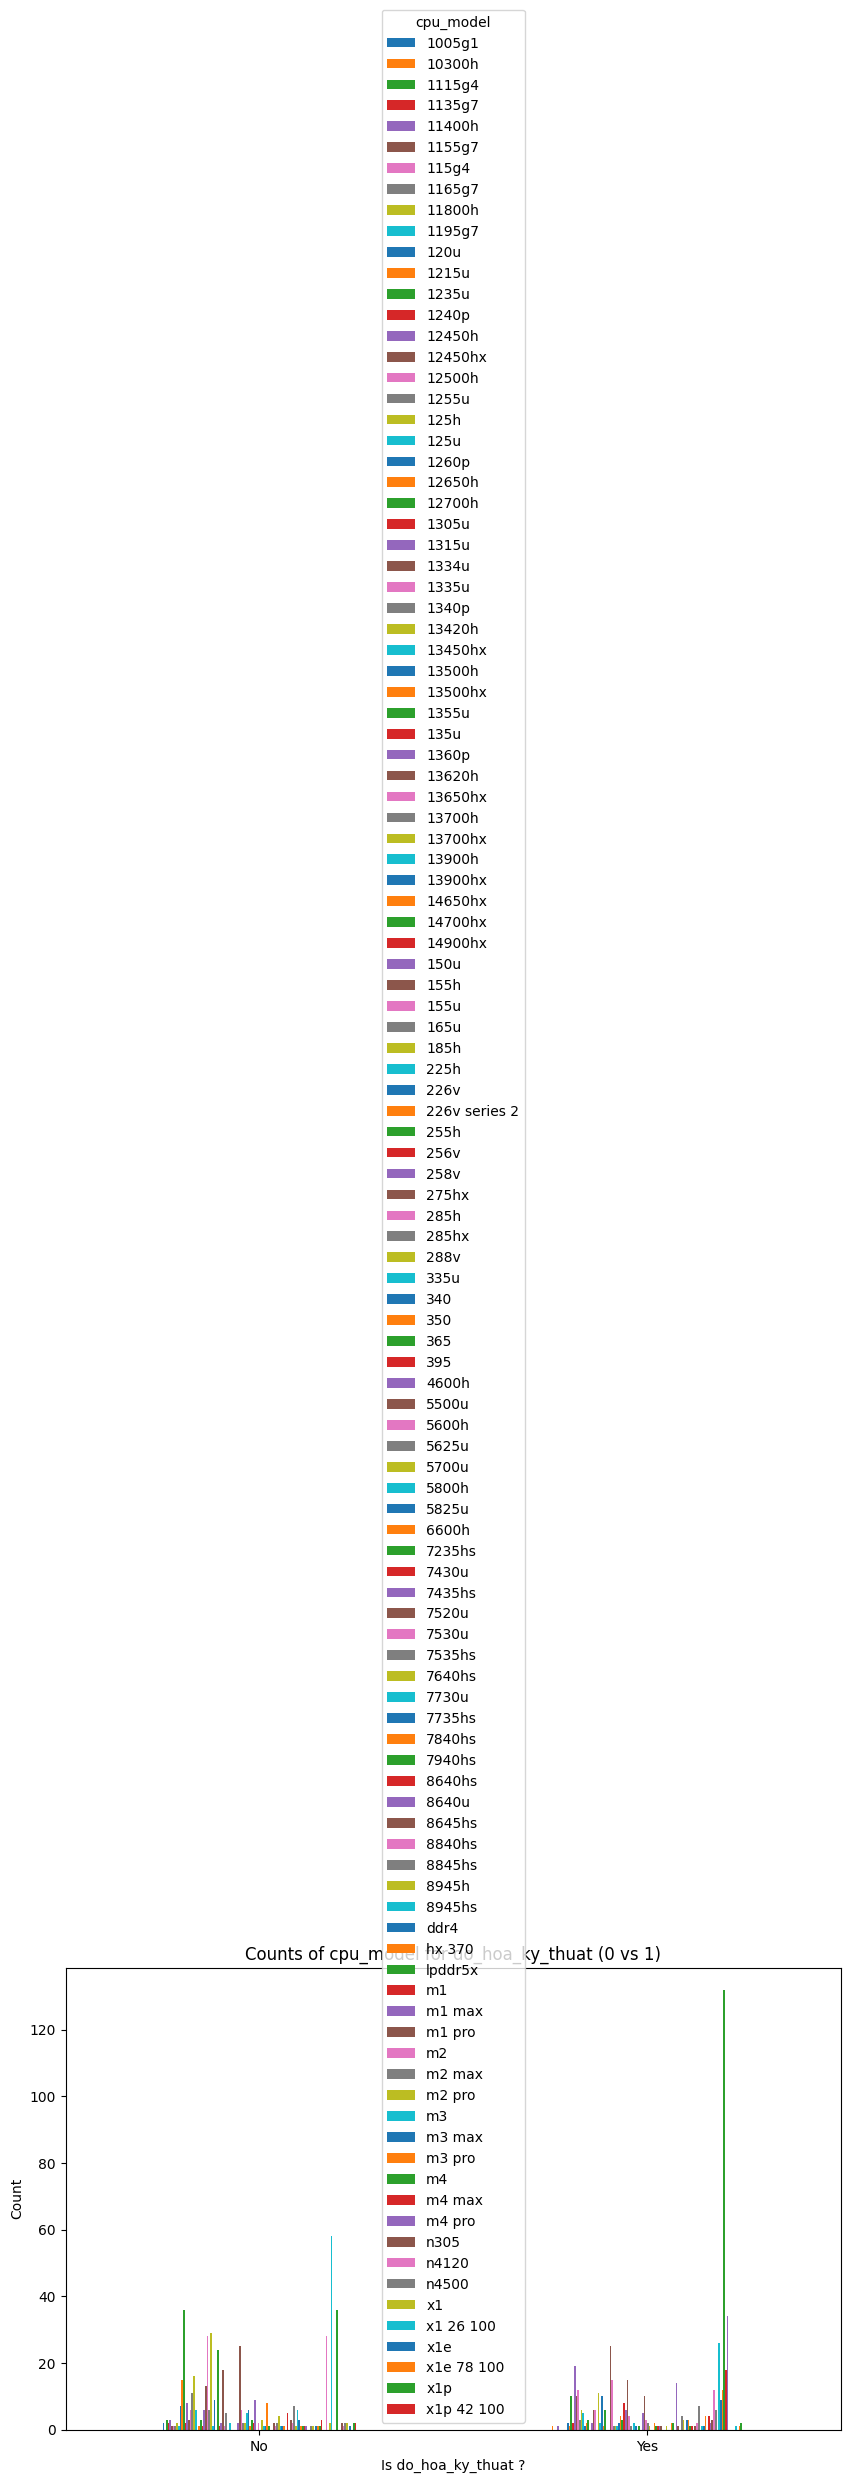

Chi-squared test for do_hoa_ky_thuat and cpu_model: Chi2 = 412.1567, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and cpu_model
Contifency table for do_hoa_ky_thuat and vga_type:
 vga_type         card rời  card tích hợp
do_hoa_ky_thuat                         
0                      89            453
1                     188            364


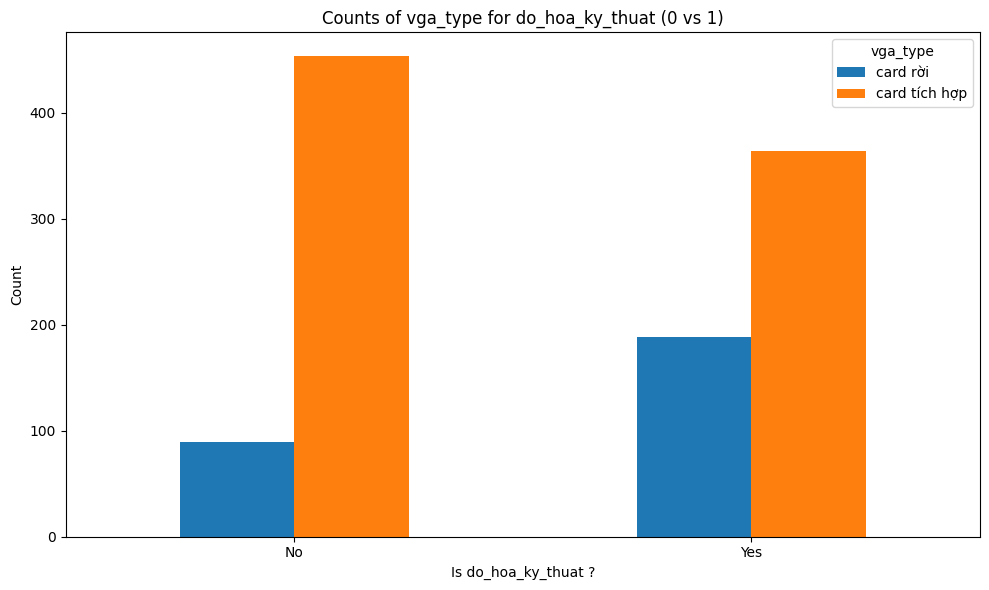

Chi-squared test for do_hoa_ky_thuat and vga_type: Chi2 = 44.0623, p-value = 0.000000
-> Significant association between do_hoa_ky_thuat and vga_type


In [ ]:
basic_eda('do_hoa_ky_thuat')

## Cao cap sang trong

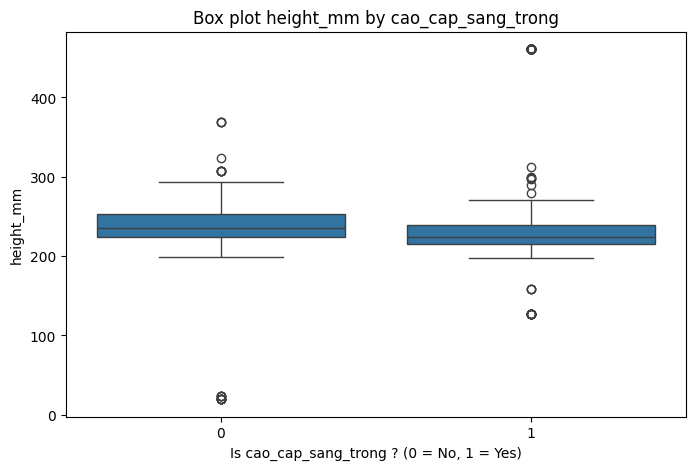

Mann-Whitney U test for height_mm vs cao_cap_sang_trong: U-statistic = 117,936, p-value = 0.0000
-> Significant difference in height_mm between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 224.0
Median for cao_cap_sang_trong = 0: 236.0


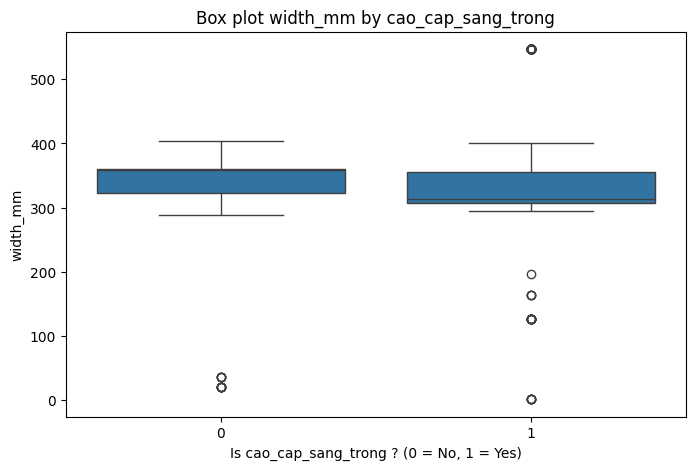

Mann-Whitney U test for width_mm vs cao_cap_sang_trong: U-statistic = 90,417, p-value = 0.0000
-> Significant difference in width_mm between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 314.0
Median for cao_cap_sang_trong = 0: 358.5


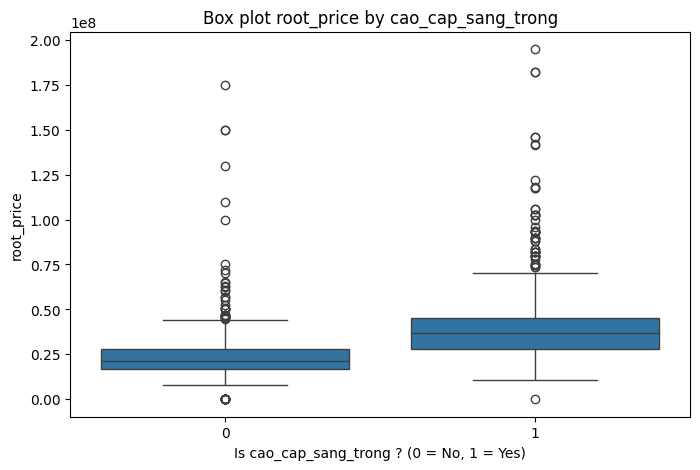

Mann-Whitney U test for root_price vs cao_cap_sang_trong: U-statistic = 237,421, p-value = 0.0000
-> Significant difference in root_price between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 36990000.0
Median for cao_cap_sang_trong = 0: 21490000.0


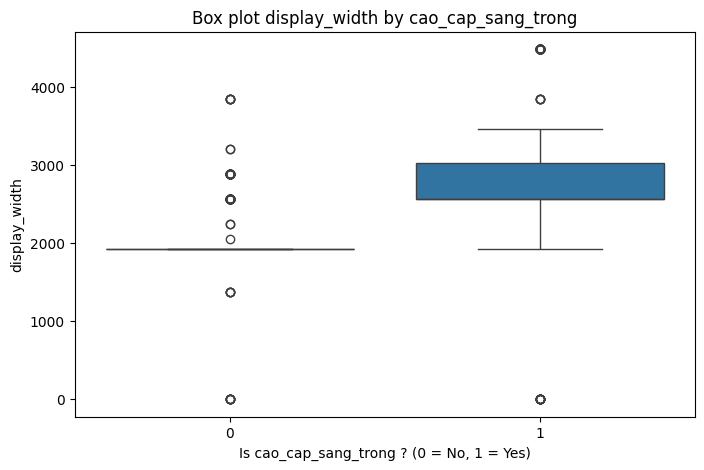

Mann-Whitney U test for display_width vs cao_cap_sang_trong: U-statistic = 245,086, p-value = 0.0000
-> Significant difference in display_width between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 2560.0
Median for cao_cap_sang_trong = 0: 1920.0


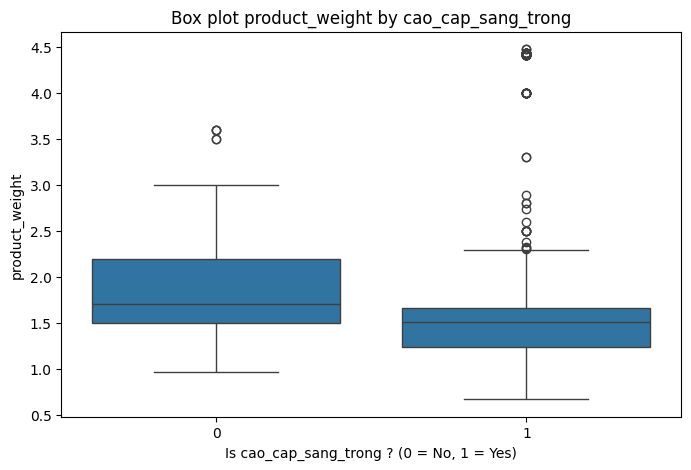

Mann-Whitney U test for product_weight vs cao_cap_sang_trong: U-statistic = 96,782, p-value = 0.0000
-> Significant difference in product_weight between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 1.51
Median for cao_cap_sang_trong = 0: 1.7


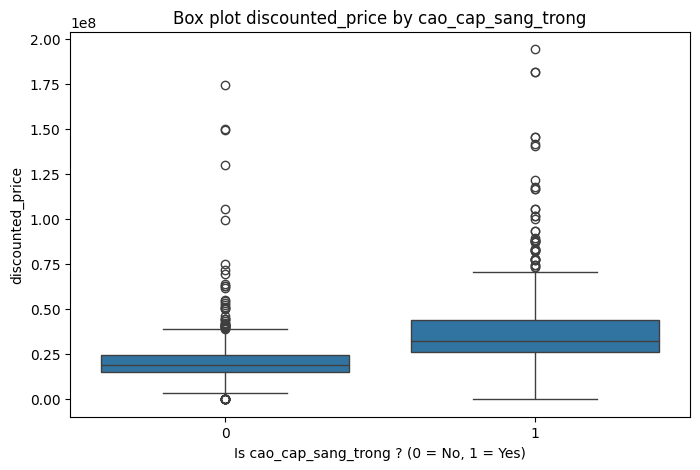

Mann-Whitney U test for discounted_price vs cao_cap_sang_trong: U-statistic = 243,628, p-value = 0.0000
-> Significant difference in discounted_price between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 32490000.0
Median for cao_cap_sang_trong = 0: 18690000.0


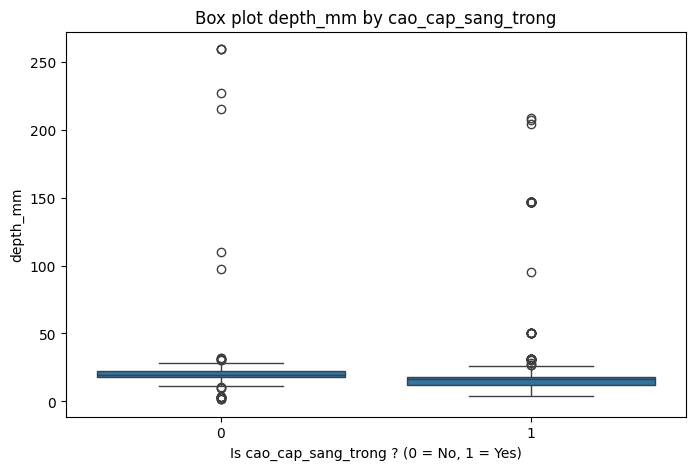

Mann-Whitney U test for depth_mm vs cao_cap_sang_trong: U-statistic = 87,022, p-value = 0.0000
-> Significant difference in depth_mm between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 16.2
Median for cao_cap_sang_trong = 0: 19.45


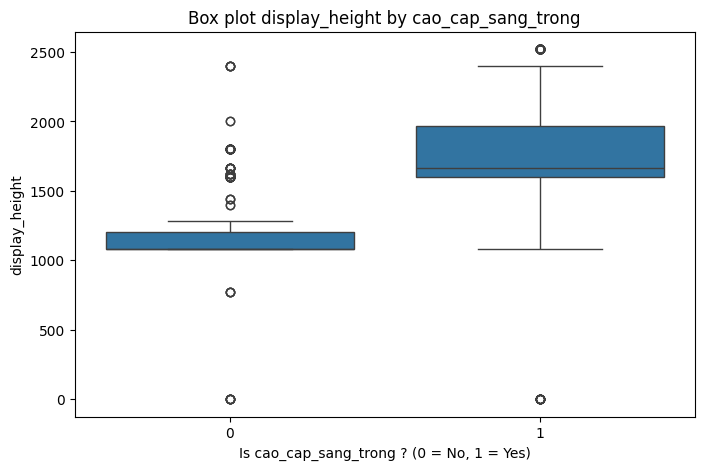

Mann-Whitney U test for display_height vs cao_cap_sang_trong: U-statistic = 253,524, p-value = 0.0000
-> Significant difference in display_height between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 1664.0
Median for cao_cap_sang_trong = 0: 1080.0


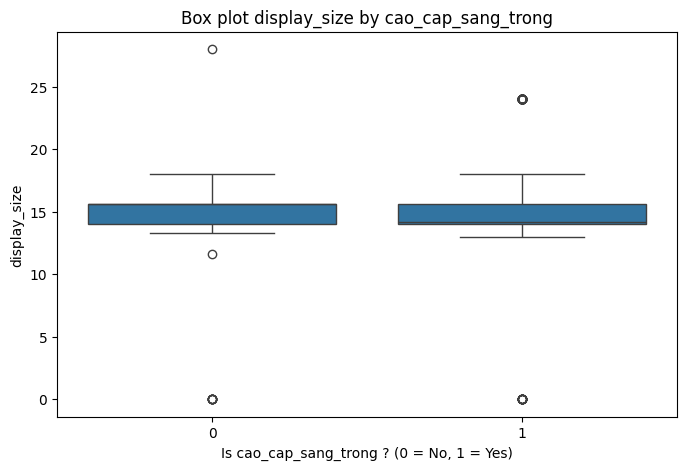

Mann-Whitney U test for display_size vs cao_cap_sang_trong: U-statistic = 116,750, p-value = 0.0000
-> Significant difference in display_size between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 14.2
Median for cao_cap_sang_trong = 0: 15.6


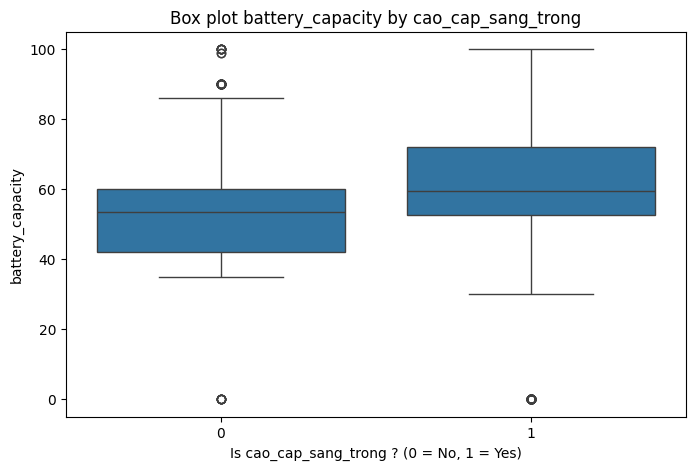

Mann-Whitney U test for battery_capacity vs cao_cap_sang_trong: U-statistic = 174,810, p-value = 0.0000
-> Significant difference in battery_capacity between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 59.58
Median for cao_cap_sang_trong = 0: 53.5


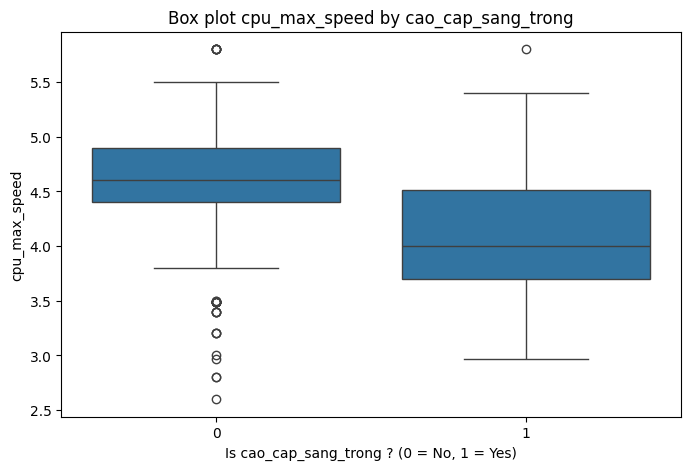

Mann-Whitney U test for cpu_max_speed vs cao_cap_sang_trong: U-statistic = 74,443, p-value = 0.0000
-> Significant difference in cpu_max_speed between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 4.0
Median for cao_cap_sang_trong = 0: 4.6


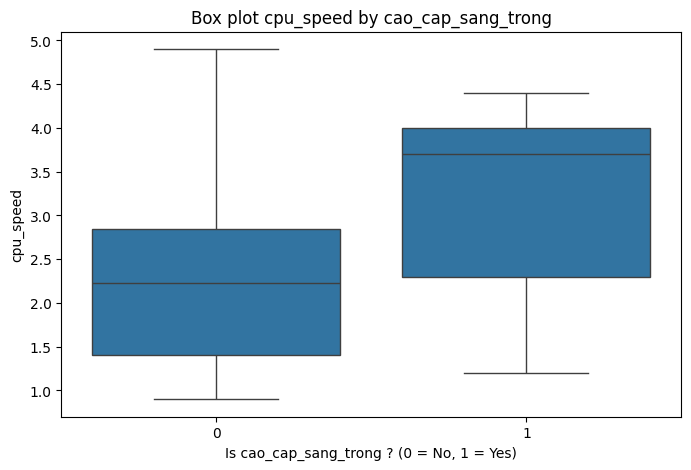

Mann-Whitney U test for cpu_speed vs cao_cap_sang_trong: U-statistic = 227,239, p-value = 0.0000
-> Significant difference in cpu_speed between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 3.7
Median for cao_cap_sang_trong = 0: 2.230955123901367


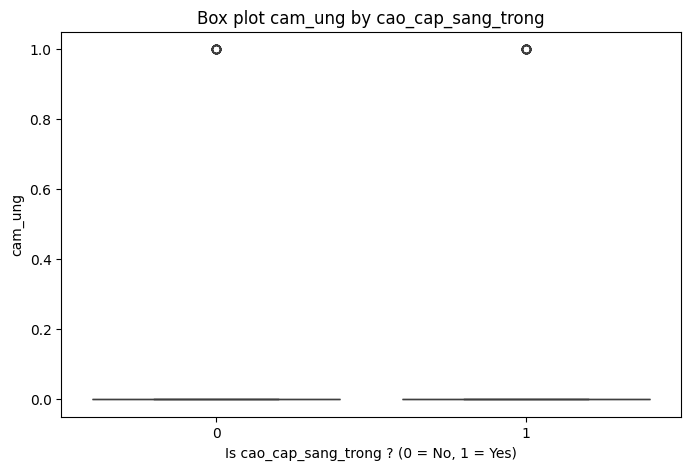

Mann-Whitney U test for cam_ung vs cao_cap_sang_trong: U-statistic = 149,886, p-value = 0.7265
-> No significant different


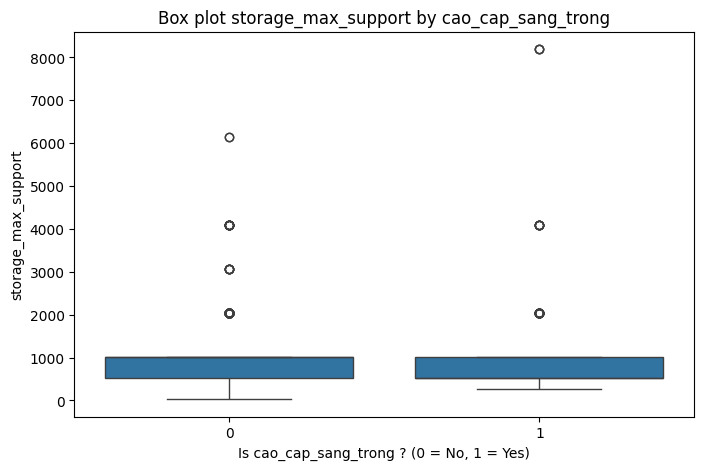

Mann-Whitney U test for storage_max_support vs cao_cap_sang_trong: U-statistic = 114,042, p-value = 0.0000
-> Significant difference in storage_max_support between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 512.0
Median for cao_cap_sang_trong = 0: 1024.0


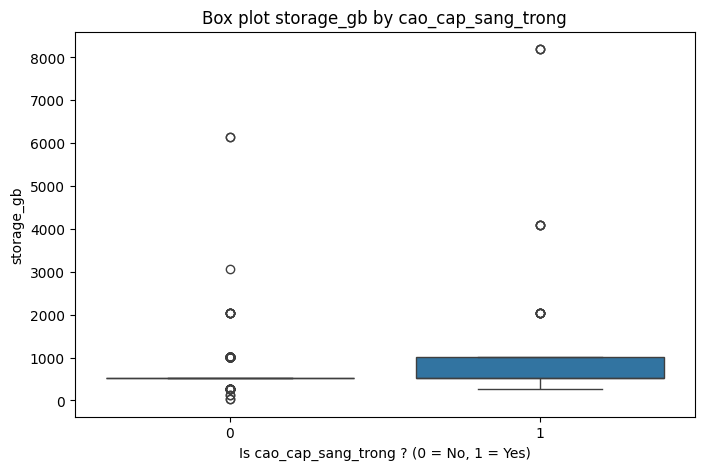

Mann-Whitney U test for storage_gb vs cao_cap_sang_trong: U-statistic = 148,612, p-value = 0.8771
-> No significant different


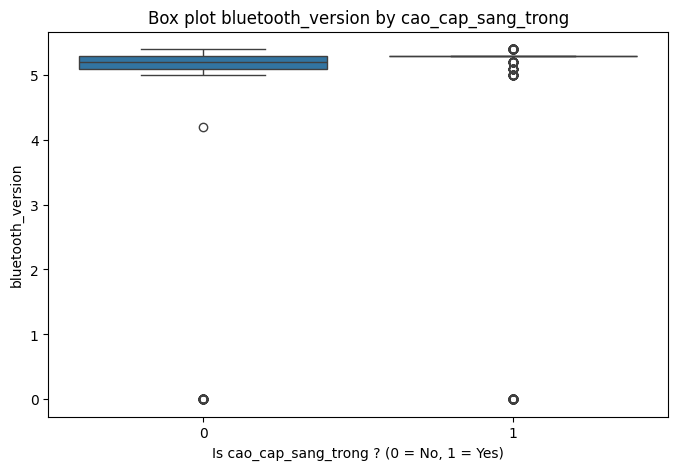

Mann-Whitney U test for bluetooth_version vs cao_cap_sang_trong: U-statistic = 191,471, p-value = 0.0000
-> Significant difference in bluetooth_version between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 5.3
Median for cao_cap_sang_trong = 0: 5.2


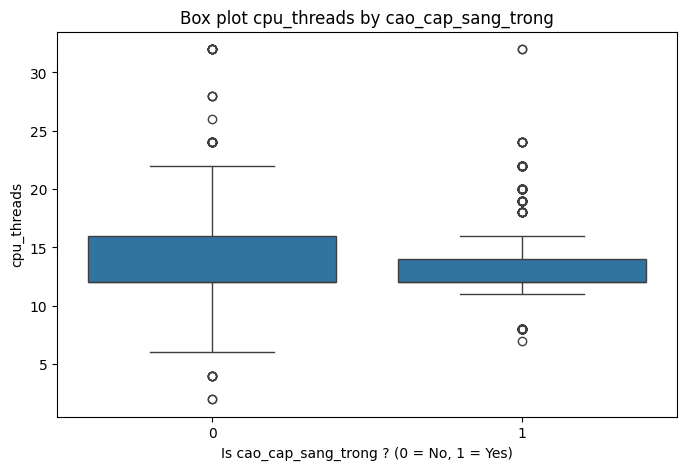

Mann-Whitney U test for cpu_threads vs cao_cap_sang_trong: U-statistic = 137,108, p-value = 0.0112
-> Significant difference in cpu_threads between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 12.0
Median for cao_cap_sang_trong = 0: 12.0


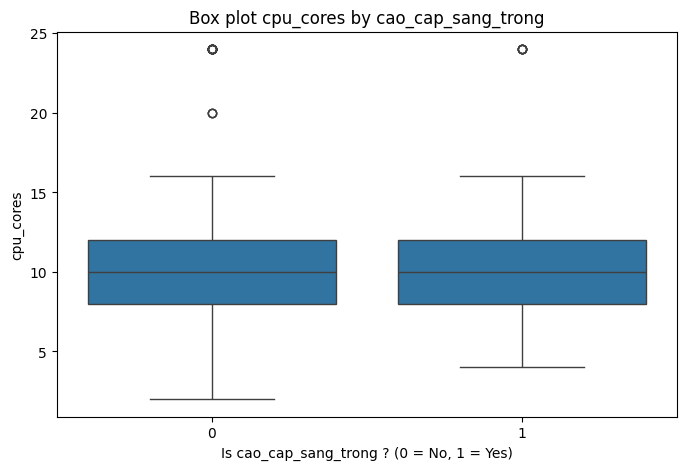

Mann-Whitney U test for cpu_cores vs cao_cap_sang_trong: U-statistic = 155,222, p-value = 0.2395
-> No significant different


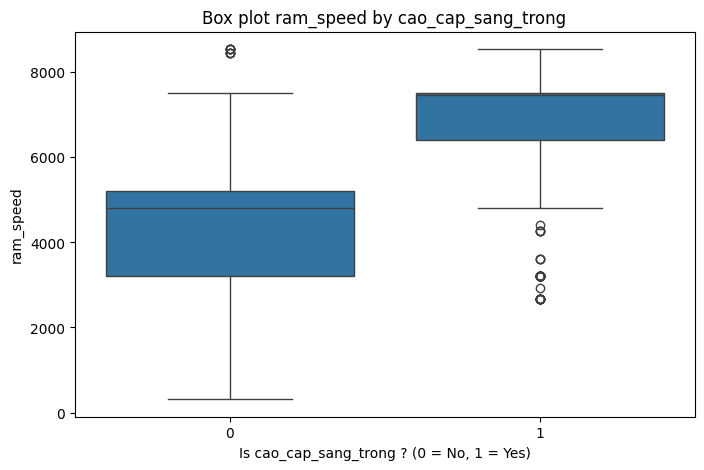

Mann-Whitney U test for ram_speed vs cao_cap_sang_trong: U-statistic = 255,980, p-value = 0.0000
-> Significant difference in ram_speed between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 7467.0
Median for cao_cap_sang_trong = 0: 4800.0


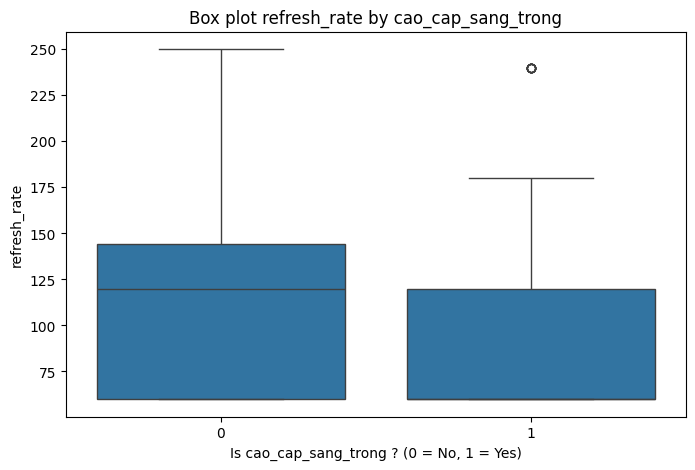

Mann-Whitney U test for refresh_rate vs cao_cap_sang_trong: U-statistic = 110,018, p-value = 0.0000
-> Significant difference in refresh_rate between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 60.0
Median for cao_cap_sang_trong = 0: 120.0


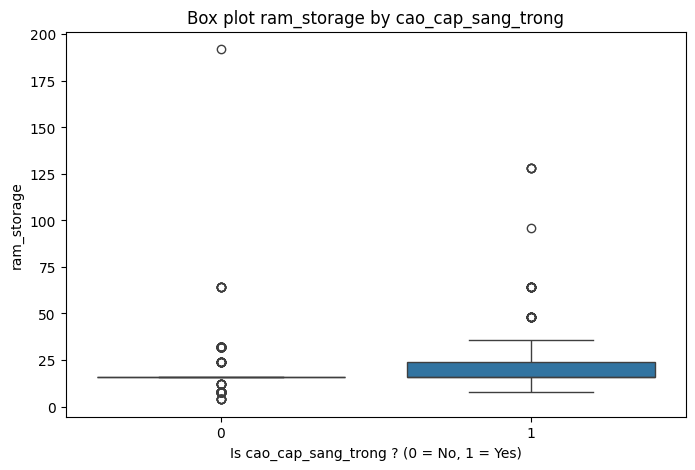

Mann-Whitney U test for ram_storage vs cao_cap_sang_trong: U-statistic = 197,791, p-value = 0.0000
-> Significant difference in ram_storage between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 16.0
Median for cao_cap_sang_trong = 0: 16.0


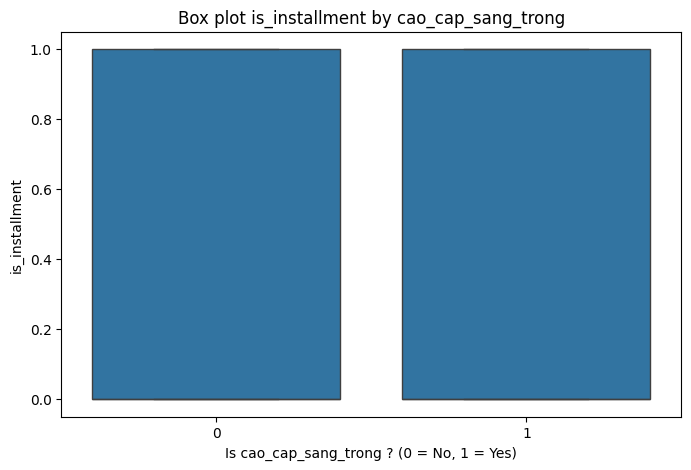

Mann-Whitney U test for is_installment vs cao_cap_sang_trong: U-statistic = 160,999, p-value = 0.0078
-> Significant difference in is_installment between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 0.0
Median for cao_cap_sang_trong = 0: 0.0


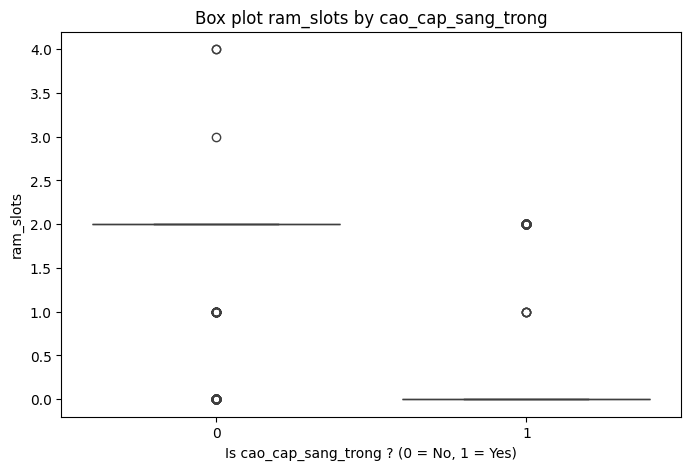

Mann-Whitney U test for ram_slots vs cao_cap_sang_trong: U-statistic = 52,413, p-value = 0.0000
-> Significant difference in ram_slots between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 0.0
Median for cao_cap_sang_trong = 0: 2.0


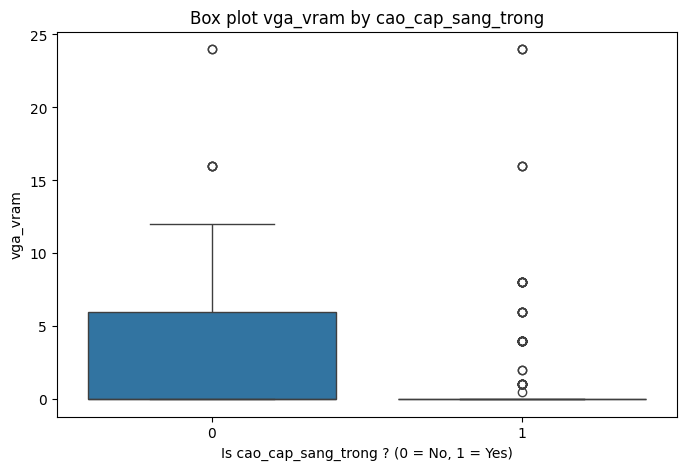

Mann-Whitney U test for vga_vram vs cao_cap_sang_trong: U-statistic = 97,054, p-value = 0.0000
-> Significant difference in vga_vram between laptop that are 'cao_cap_sang_trong' and those are not
Median for cao_cap_sang_trong = 1: 0.0
Median for cao_cap_sang_trong = 0: 0.0
Contifency table for cao_cap_sang_trong and material:
 material            vỏ kim loại  vỏ nhựa  vỏ nhựa - nắp lưng kim loại
cao_cap_sang_trong                                                   
0                           127      329                           66
1                           487       58                           27


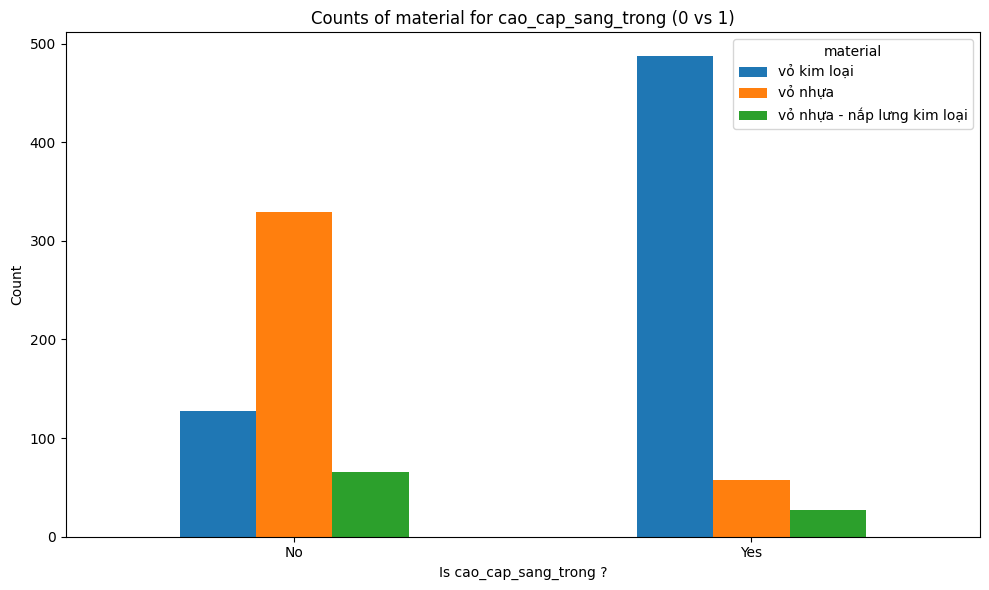

Chi-squared test for cao_cap_sang_trong and material: Chi2 = 415.7831, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and material
Contifency table for cao_cap_sang_trong and manufacturer:
 manufacturer        acer  apple  asus  dell  gigabyte  hp  huawei  lenovo  lg  \
cao_cap_sang_trong                                                              
0                     71     19   133    64        12  58       1      85   3   
1                     14    366    62    24         0  32       1      48  11   

manufacturer        masstel  msi  samsung  vaio  
cao_cap_sang_trong                               
0                         1   72        2     1  
1                         0   14        0     0  


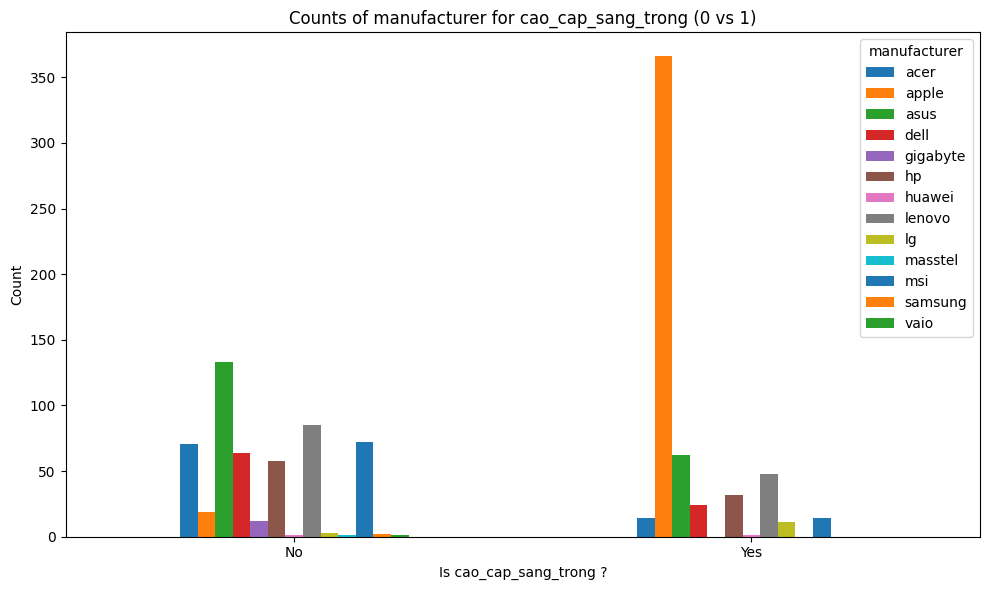

Chi-squared test for cao_cap_sang_trong and manufacturer: Chi2 = 471.1984, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and manufacturer
Contifency table for cao_cap_sang_trong and ram_type:
 ram_type            ddr4  ddr5  gddr5  lpddr4  lpddr4x  lpddr5  lpddr5x
cao_cap_sang_trong                                                     
0                    222   209      1       4        5      47       34
1                     49    46      0       4        2     283      188


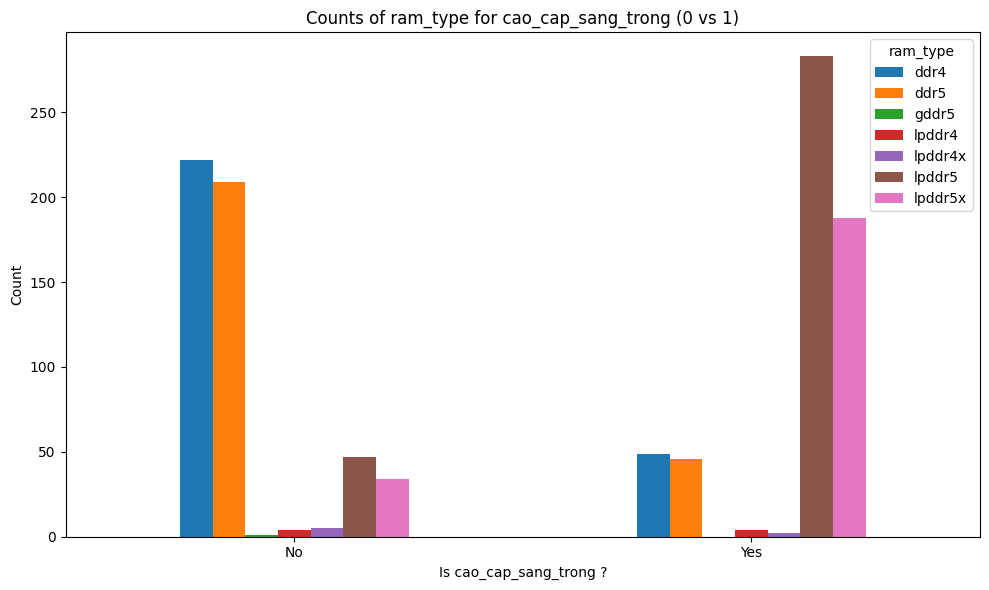

Chi-squared test for cao_cap_sang_trong and ram_type: Chi2 = 491.2625, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and ram_type
Contifency table for cao_cap_sang_trong and os_version:
 os_version          chrome os  free dos  macos  windows 10  windows 11
cao_cap_sang_trong                                                    
0                           2        12     19           5         484
1                           0         0    366           0         206


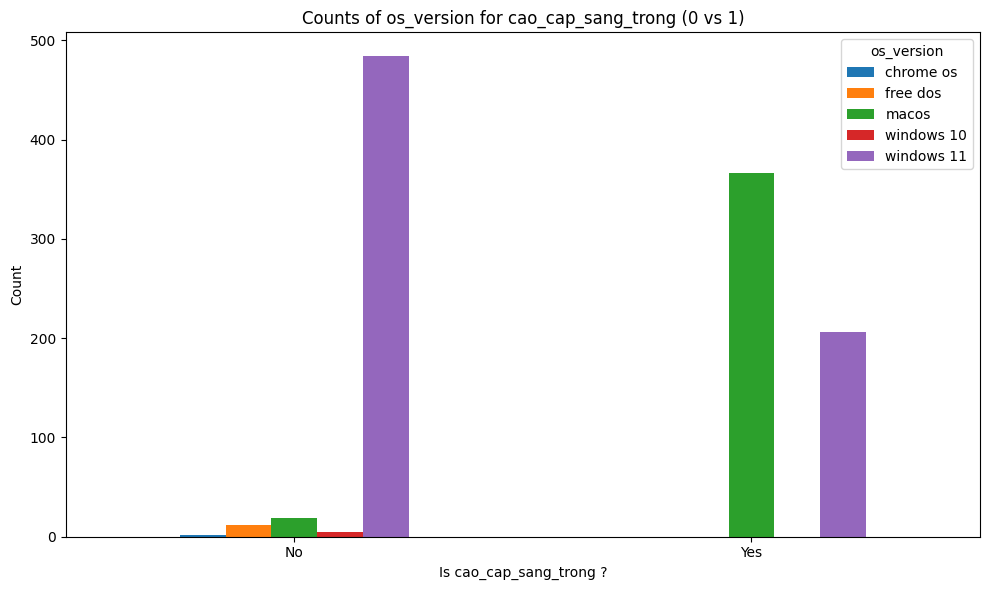

Chi-squared test for cao_cap_sang_trong and os_version: Chi2 = 442.3953, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and os_version
Contifency table for cao_cap_sang_trong and laptop_color:
 laptop_color        be  bạc  cam  hồng  trắng  tím  vàng  xanh dương  xanh lá  \
cao_cap_sang_trong                                                              
0                    1  111    0     0      2    0    19          20        0   
1                    1  162    5     9      5    6    56          98        8   

laptop_color        xám  đen  
cao_cap_sang_trong            
0                   171  198  
1                   102  120  


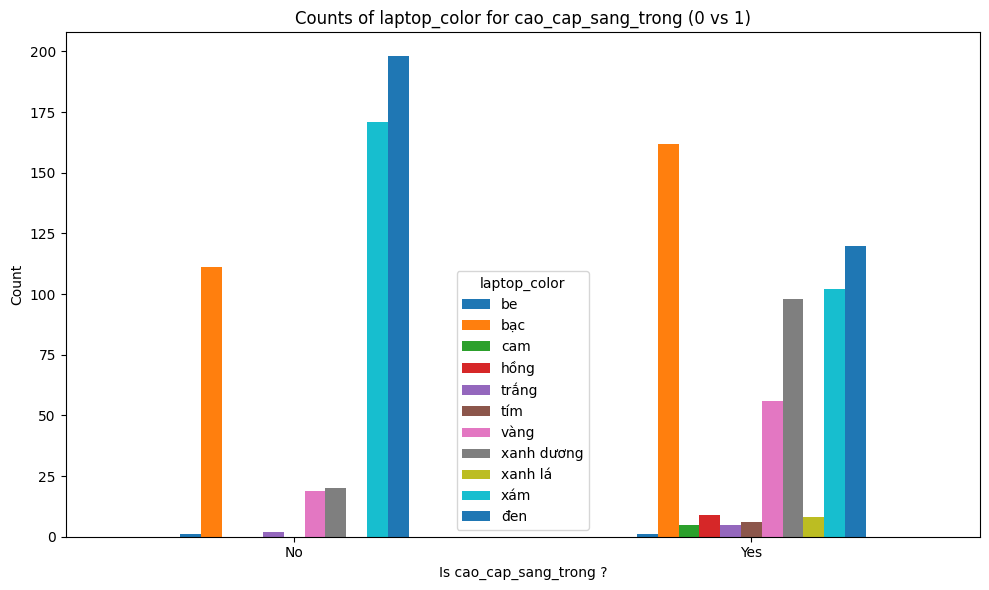

Chi-squared test for cao_cap_sang_trong and laptop_color: Chi2 = 143.2114, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and laptop_color
Contifency table for cao_cap_sang_trong and vga_brand:
 vga_brand           amd  apple  intel  nvidia  qualcomm
cao_cap_sang_trong                                     
0                    26     19    265     208         4
1                    28    366    133      38         7


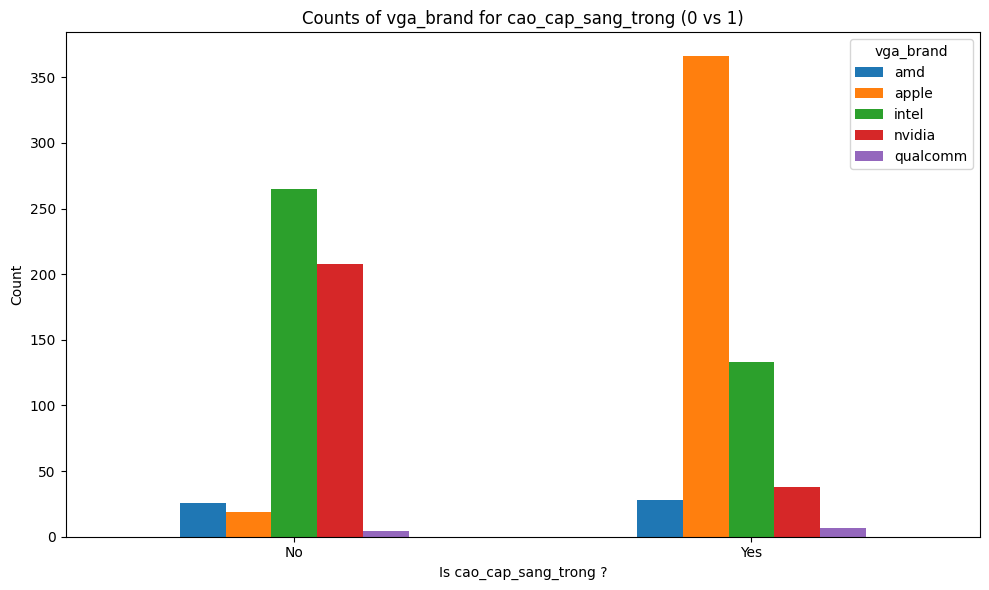

Chi-squared test for cao_cap_sang_trong and vga_brand: Chi2 = 473.6056, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and vga_brand
Contifency table for cao_cap_sang_trong and cpu_series:
 cpu_series          celeron  core 5  core 7  core i3  core i5  core i7  \
cao_cap_sang_trong                                                       
0                         3       8       4       26      199      110   
1                         0       1       4        7       39       24   

cpu_series          core i9  core ultra 5  core ultra 7  core ultra 9  ...  \
cao_cap_sang_trong                                                     ...   
0                        10            23            24            11  ...   
1                         2            27            46            13  ...   

cpu_series          ryzen 9  ryzen ai 5  ryzen ai 7  ryzen ai 9  \
cao_cap_sang_trong                                                
0                         4           0 

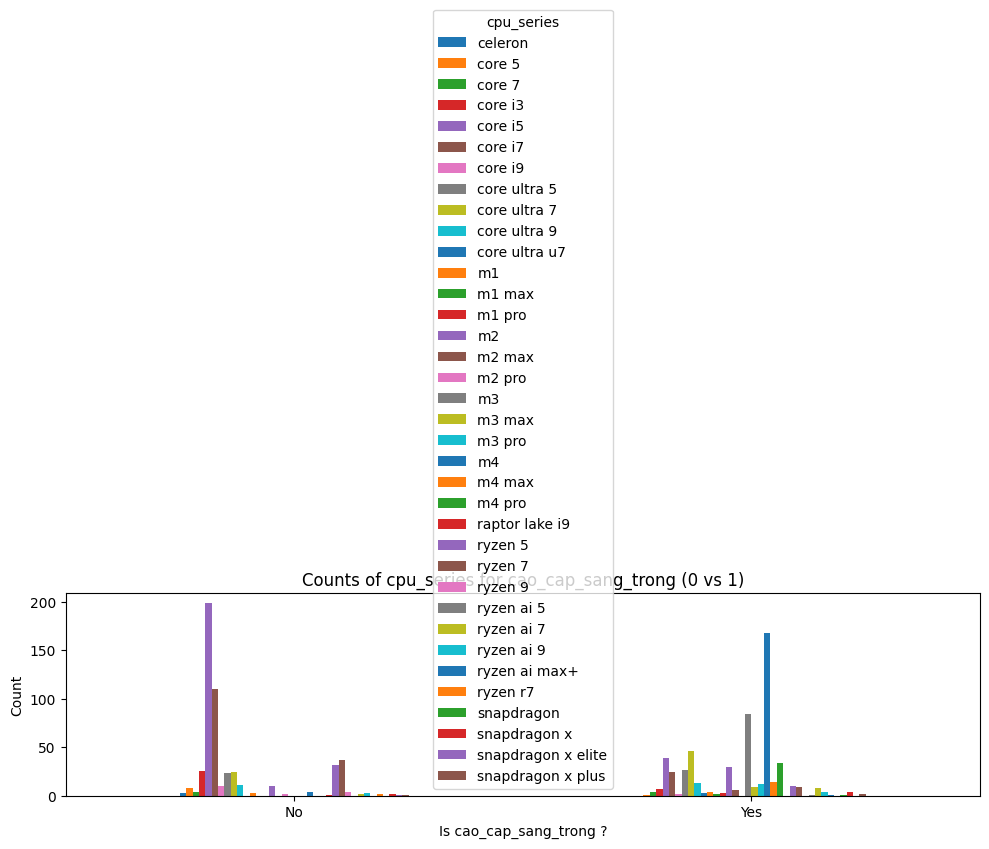

Chi-squared test for cao_cap_sang_trong and cpu_series: Chi2 = 573.6133, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and cpu_series
Contifency table for cao_cap_sang_trong and laptop_camera:
 laptop_camera       full hd   hd
cao_cap_sang_trong              
0                       159  363
1                       495   77


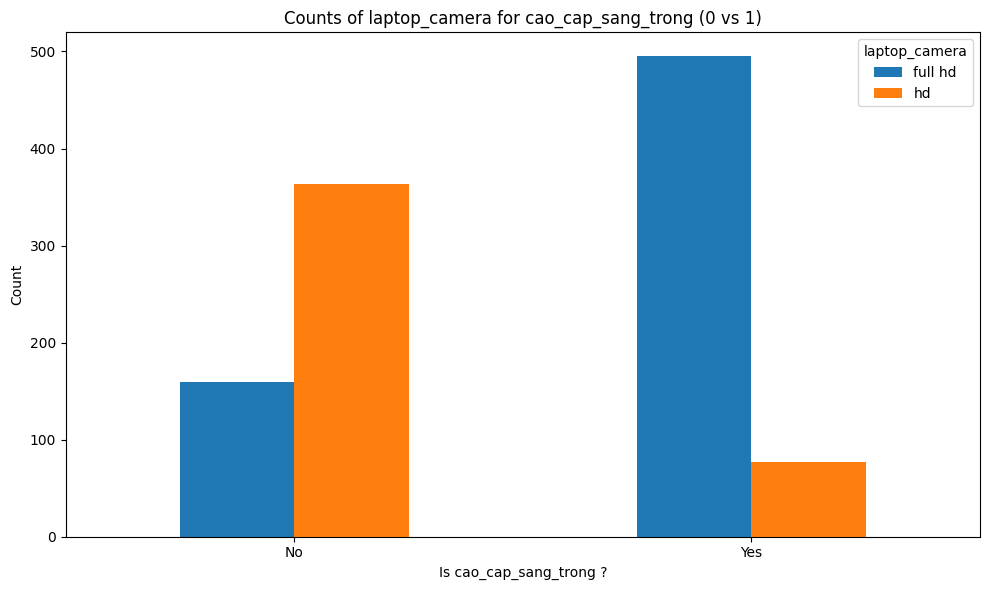

Chi-squared test for cao_cap_sang_trong and laptop_camera: Chi2 = 354.6558, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and laptop_camera
Contifency table for cao_cap_sang_trong and cpu_brand:
 cpu_brand           amd  apple  intel  qualcomm
cao_cap_sang_trong                             
0                    80     19    419         4
1                    33    366    166         7


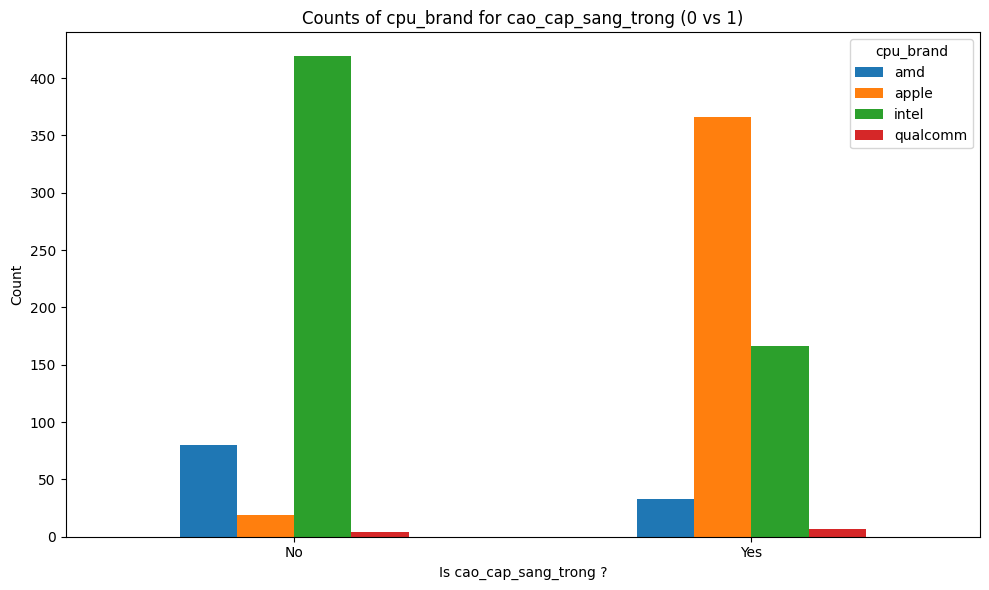

Chi-squared test for cao_cap_sang_trong and cpu_brand: Chi2 = 441.1709, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and cpu_brand
Contifency table for cao_cap_sang_trong and cpu_model:
 cpu_model           1005g1  10300h  1115g4  1135g7  11400h  1155g7  115g4  \
cao_cap_sang_trong                                                          
0                        2       1       3       2       4       1      0   
1                        0       0       0       0       0       0      1   

cpu_model           1165g7  11800h  1195g7  ...  m4 pro  n305  n4120  n4500  \
cao_cap_sang_trong                          ...                               
0                        0       2       0  ...       0     2      1      2   
1                        1       0       1  ...      34     0      0      0   

cpu_model           x1  x1 26 100  x1e  x1e 78 100  x1p  x1p 42 100  
cao_cap_sang_trong                                                   
0                  

<ipython-input-5-3f9f4a22c72a>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


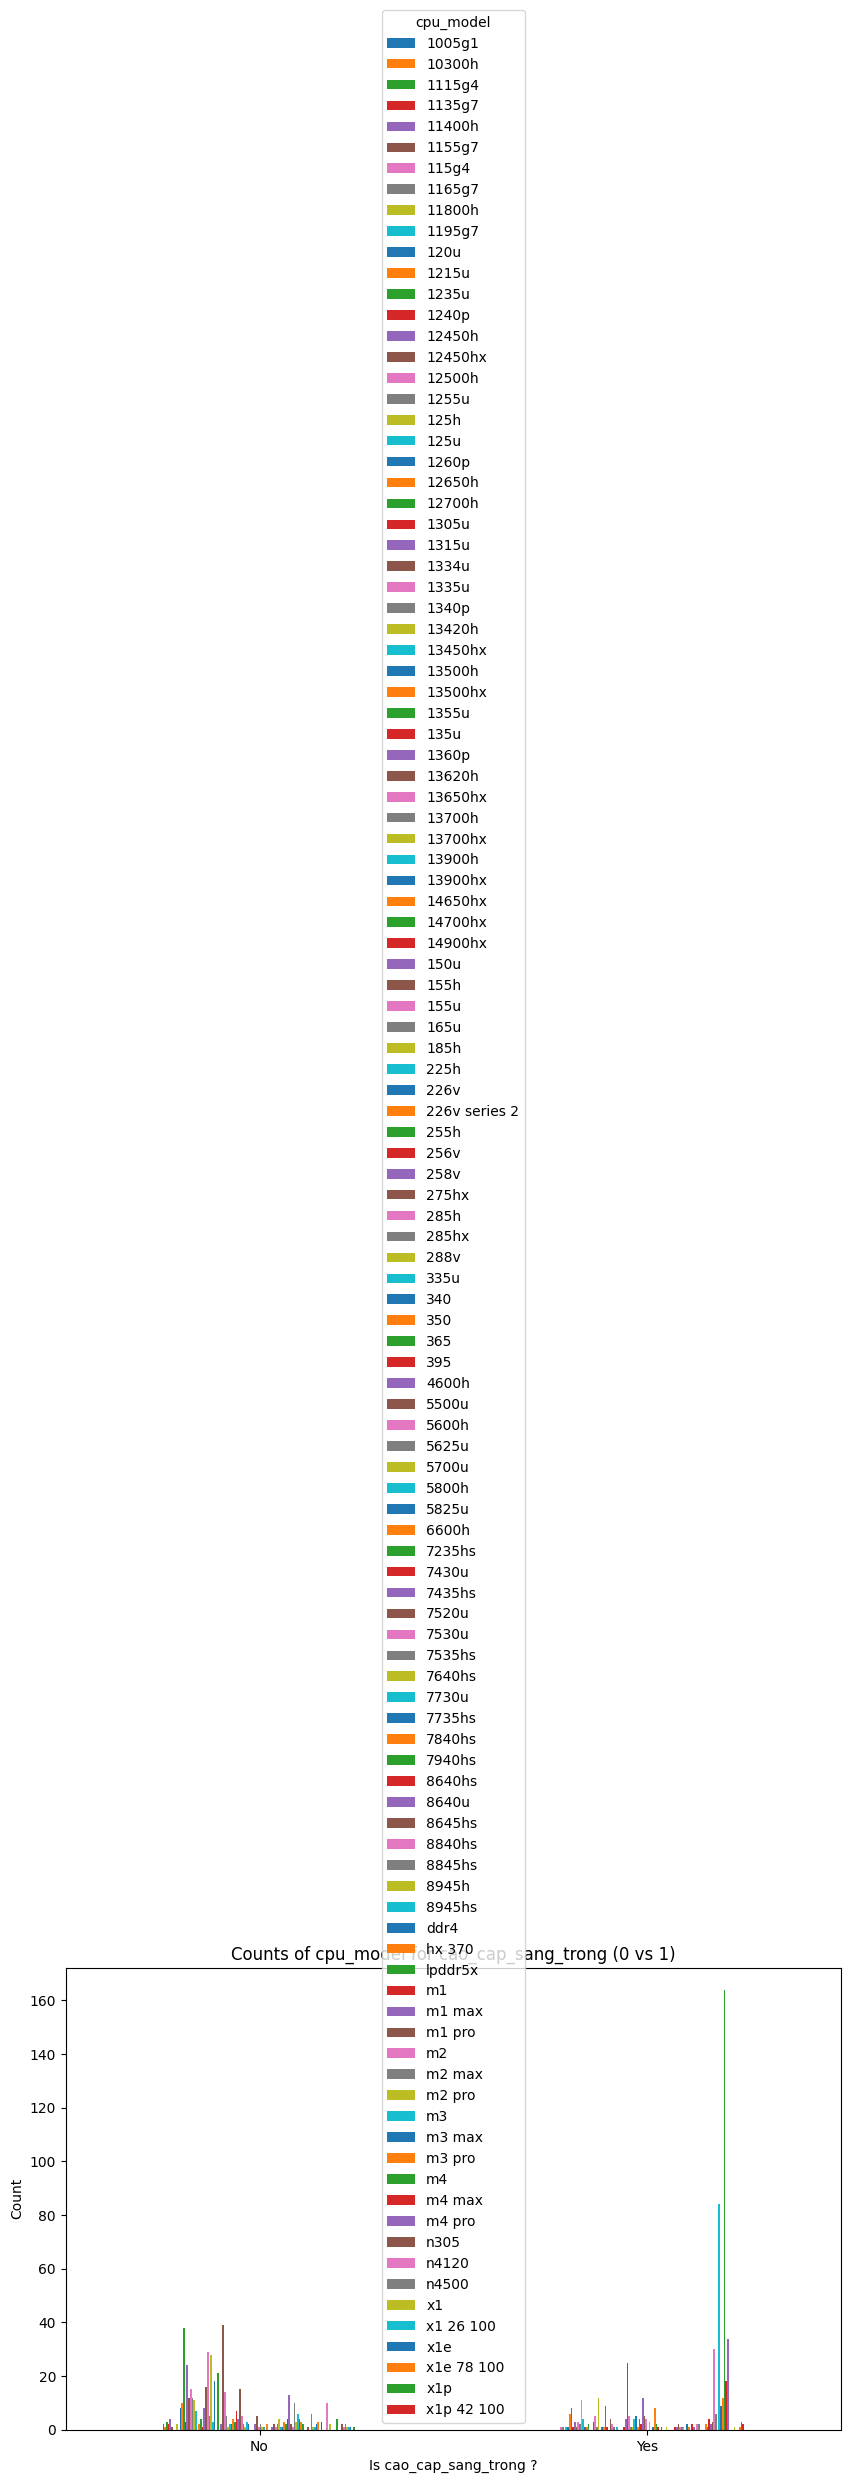

Chi-squared test for cao_cap_sang_trong and cpu_model: Chi2 = 645.3540, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and cpu_model
Contifency table for cao_cap_sang_trong and vga_type:
 vga_type            card rời  card tích hợp
cao_cap_sang_trong                         
0                        226            296
1                         51            521


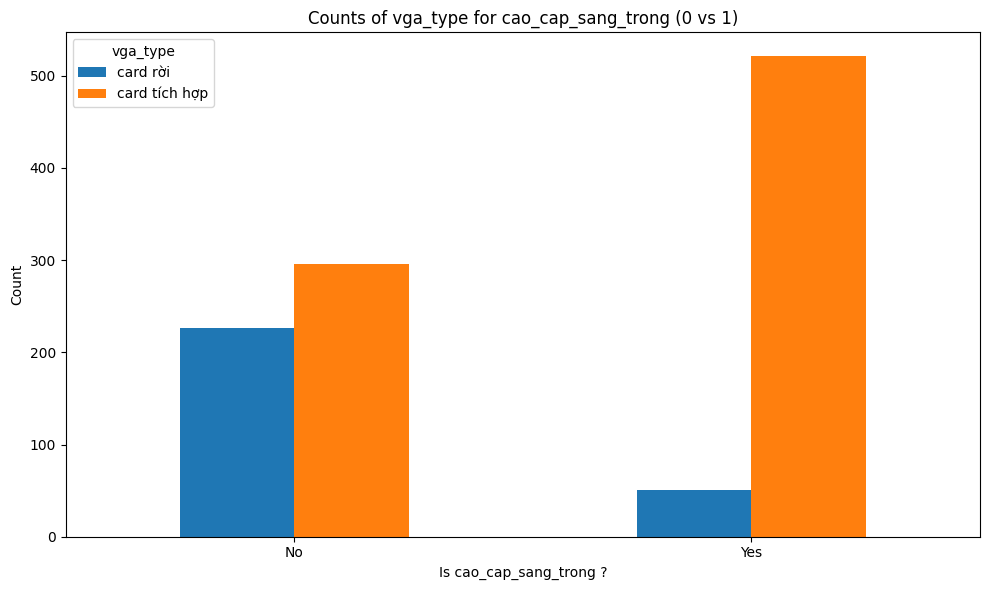

Chi-squared test for cao_cap_sang_trong and vga_type: Chi2 = 168.7819, p-value = 0.000000
-> Significant association between cao_cap_sang_trong and vga_type


In [ ]:
basic_eda('cao_cap_sang_trong')

# Heap map

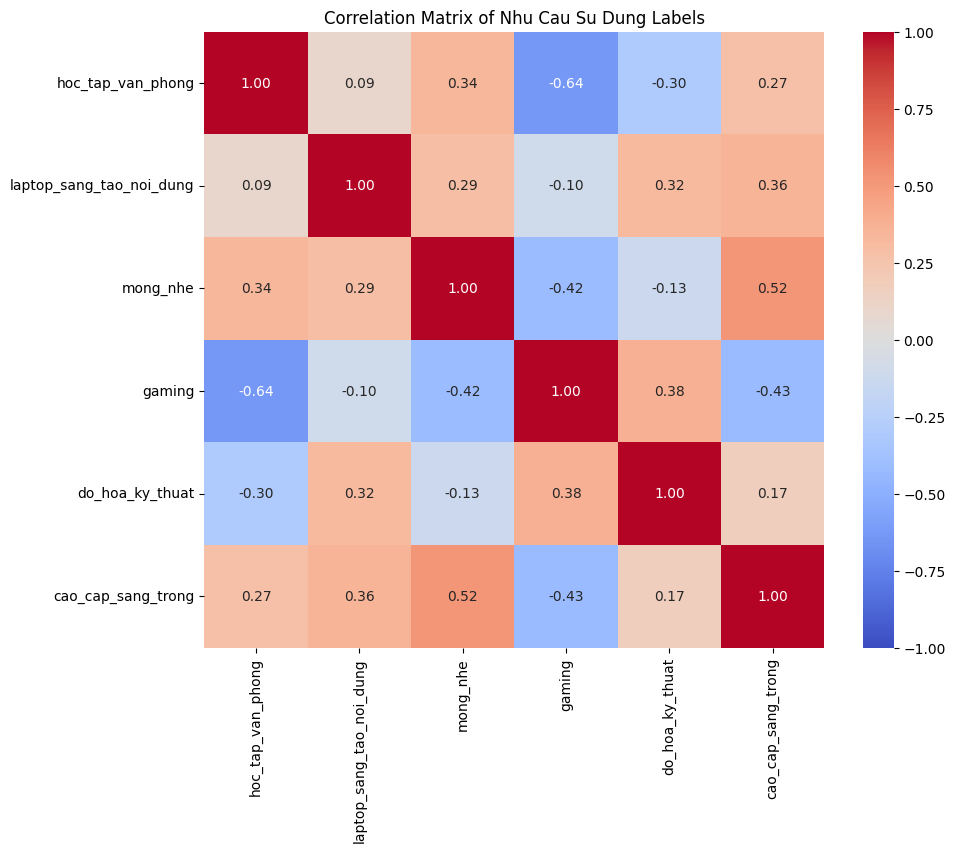


Label Correlation Matrix:
                          hoc_tap_van_phong  laptop_sang_tao_noi_dung  \
hoc_tap_van_phong                  1.000000                  0.089018   
laptop_sang_tao_noi_dung           0.089018                  1.000000   
mong_nhe                           0.338009                  0.294432   
gaming                            -0.636697                 -0.099540   
do_hoa_ky_thuat                   -0.297564                  0.315914   
cao_cap_sang_trong                 0.274256                  0.355729   

                          mong_nhe    gaming  do_hoa_ky_thuat  \
hoc_tap_van_phong         0.338009 -0.636697        -0.297564   
laptop_sang_tao_noi_dung  0.294432 -0.099540         0.315914   
mong_nhe                  1.000000 -0.415110        -0.129557   
gaming                   -0.415110  1.000000         0.382052   
do_hoa_ky_thuat          -0.129557  0.382052         1.000000   
cao_cap_sang_trong        0.521857 -0.428750         0.169785   

     

In [ ]:
label_correlation_matrix = df[target_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(label_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Nhu Cau Su Dung Labels')
plt.show()

print("\nLabel Correlation Matrix:")
print(label_correlation_matrix)

# Binary Relevance & Decision Tree & Feature Importance

In [ ]:
X_features = df.drop(columns=target_cols + ['product_id', 'name', 'image', 'url_path', 'nhu_cau_su_dung', 'is_installment', 'root_price', 'discounted_price'], errors='ignore')
# Tạo preprocessor cho X (OneHotEncode categorical, giữ nguyên numerical)
# Cần đảm bảo các cột số thực sự là số và không có NaN (hoặc đã được imputed)
# preprocessoor_X = ColumnTransformer(
#     transformers= [
#         ('num', 'passthrough', numerical_cols),
#         ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'),
#          categorical_cols)
#     ],
#     remainder='passthrough' ## Giữ lại các cột không được xử lý (nếu có)
# )

preprocessoor_X = ColumnTransformer(
    transformers= [
        ('num', 'passthrough', numerical_cols),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
         categorical_cols)
    ],
    remainder='passthrough' ## Giữ lại các cột không được xử lý (nếu có)
)

all_feature_importances = {}
print("\n---Train Binary Relevance (Decision Tree) Model for each label---")
for label_col in target_cols:
    print(f"Training model for label: {label_col}")
    y_single_label = df[label_col]
    if len(y_single_label.unique()) < 2:
        continue
    # X_train, X_test, y_train, y_test = train_test_split(X_features, y_single_label, test_size=0.25, random_state=42, stratify=y_single_label)
    # Sử dụng toàn bộ X_features để lấy importance tổng thể cho nhãn này
    X_processed = preprocessoor_X.fit_transform(X_features)

    # Get feature's name after transfroming
    feature_names_transformed = []
    ct_transformer_br = preprocessoor_X # fitted
    for i_br, transformer_tuple_br in enumerate(ct_transformer_br.transformers_):
        name_br, transformer_br, columns_br = transformer_tuple_br
        if name_br == 'num':
            feature_names_transformed.extend(columns_br)
        elif name_br =="cat" and hasattr(transformer_br, 'get_feature_names_out'):
            ohe_feature_names_br = transformer_br.get_feature_names_out(columns_br)
            feature_names_transformed.extend(ohe_feature_names_br)
        elif name_br =='cat': # Fallback nếu get_feature_names_out không có
            for col_idx, original_col_name in enumerate(columns_br):
                # Tạo tên giả định, có thể không chính xác nếu OHE tạo nhiều cột cho 1 feature
                feature_names_transformed.extend([f"{original_col_name}_{cat}" for cat in transformer_br.categories_[col_idx][1:]])

    # Kiểm tra lại số lượng features
    if X_processed.shape[1] != len(feature_names_transformed):
        print(f"Warning: Mismatch in number of processed features ({X_processed.shape[1]}) and generated feature names ({len(feature_names_transformed)}) for label {label_col}. Skipping importance for this label.")
        # Handle columns with remainder='passthrough'
        unprocessed_cols = [col for col in X_features.columns if col not in numerical_cols and col not in categorical_cols]
        feature_names_transformed.extend(unprocessed_cols) # Thêm các cột không được xử lý (nếu có)
        if X_processed.shape[1] != len(feature_names_transformed):
            print(f"Still mismatch after adding remainder. Processed: {X_processed.shape[1]}, Names: {len(feature_names_transformed)}. Aborting importance for {label_col}.")
            continue

    model_br = DecisionTreeClassifier(random_state=42, max_depth=5,min_samples_leaf=5)
    try:
        model_br.fit(X_processed, y_single_label)
        importances_br = model_br.feature_importances_
        if len(feature_names_transformed) == len(importances_br):
            label_feature_importance_df = pd.DataFrame({
                'feature': feature_names_transformed,
                'importance': importances_br
            })
            label_feature_importance_df = label_feature_importance_df.sort_values(by='importance', ascending=False)
            all_feature_importances[label_col] = label_feature_importance_df
            print(f"Top 10 features for '{label_col}'")
            print(label_feature_importance_df.head(10))
        else:
            print(f"Could not reliably get feature names for label {label_col}\nProcessed features: {X_processed.shape[1]}\nNames generated: {len(feature_names_transformed)}")

    except Exception as e_br_model:
        print(f"Error training model for label {label_col}: {e_br_model}")
    print("-" * 30)



---Train Binary Relevance (Decision Tree) Model for each label---
Training model for label: hoc_tap_van_phong
Top 10 features for 'hoc_tap_van_phong'
           feature  importance
20        vga_vram    0.625723
14     cpu_threads    0.123340
3   product_weight    0.066844
16       ram_speed    0.065375
9        cpu_speed    0.033959
8    cpu_max_speed    0.030376
2    display_width    0.017943
4         depth_mm    0.012448
0        height_mm    0.008494
21        material    0.005724
------------------------------
Training model for label: laptop_sang_tao_noi_dung
Top 10 features for 'laptop_sang_tao_noi_dung'
              feature  importance
4            depth_mm    0.487835
30          cpu_model    0.228151
8       cpu_max_speed    0.063749
13  bluetooth_version    0.053247
9           cpu_speed    0.041806
3      product_weight    0.022828
7    battery_capacity    0.018781
20           vga_vram    0.017804
5      display_height    0.017535
18        ram_storage    0.010654
-----


--- Feature Importances for Nhu Cau: hoc_tap_van_phong ---
           feature  importance
20        vga_vram    0.625723
14     cpu_threads    0.123340
3   product_weight    0.066844
16       ram_speed    0.065375
9        cpu_speed    0.033959


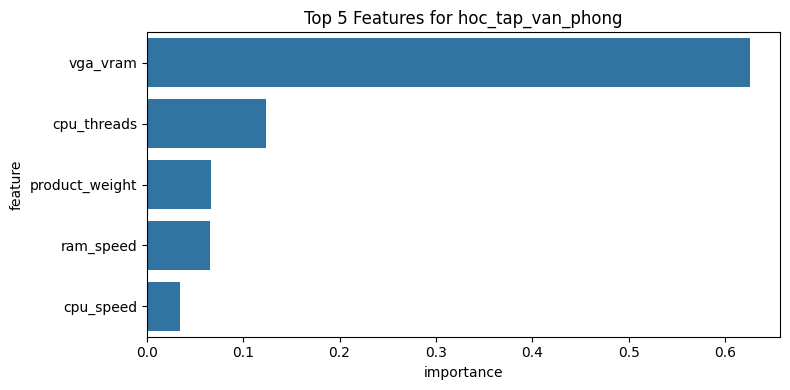


--- Feature Importances for Nhu Cau: laptop_sang_tao_noi_dung ---
              feature  importance
4            depth_mm    0.487835
30          cpu_model    0.228151
8       cpu_max_speed    0.063749
13  bluetooth_version    0.053247
9           cpu_speed    0.041806


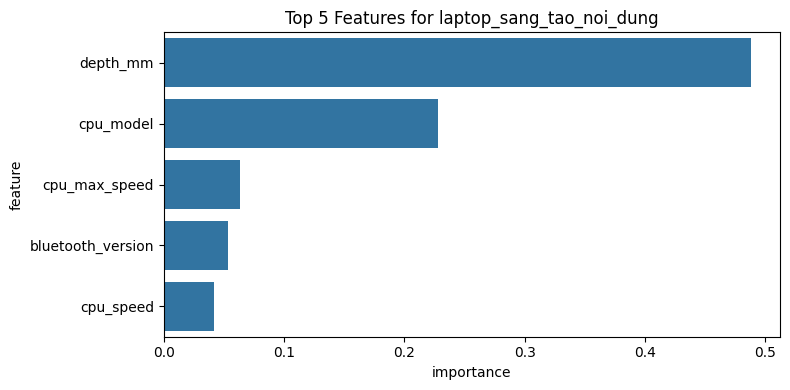


--- Feature Importances for Nhu Cau: mong_nhe ---
           feature  importance
3   product_weight    0.683647
16       ram_speed    0.117530
9        cpu_speed    0.043774
5   display_height    0.037029
30       cpu_model    0.036511


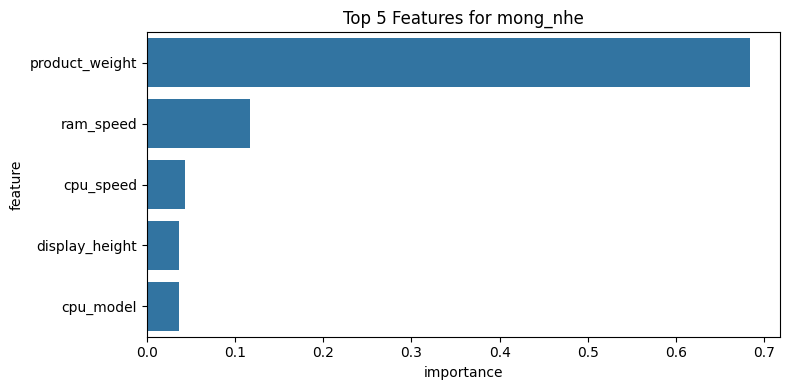


--- Feature Importances for Nhu Cau: gaming ---
           feature  importance
20        vga_vram    0.894111
5   display_height    0.022418
1         width_mm    0.020310
0        height_mm    0.014930
9        cpu_speed    0.009019


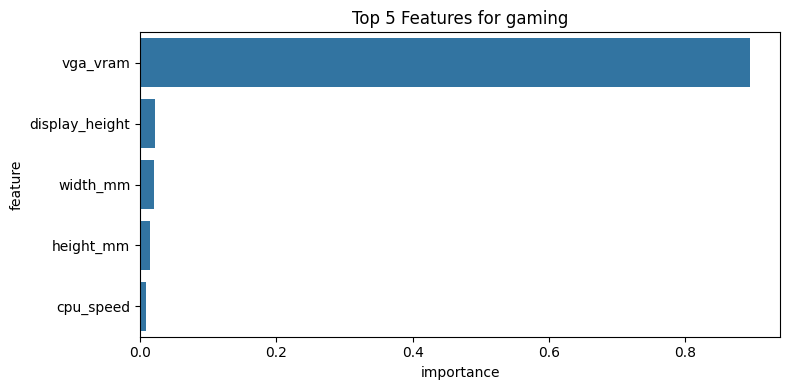


--- Feature Importances for Nhu Cau: do_hoa_ky_thuat ---
              feature  importance
2       display_width    0.335166
20           vga_vram    0.267352
9           cpu_speed    0.179624
13  bluetooth_version    0.072502
14        cpu_threads    0.029711


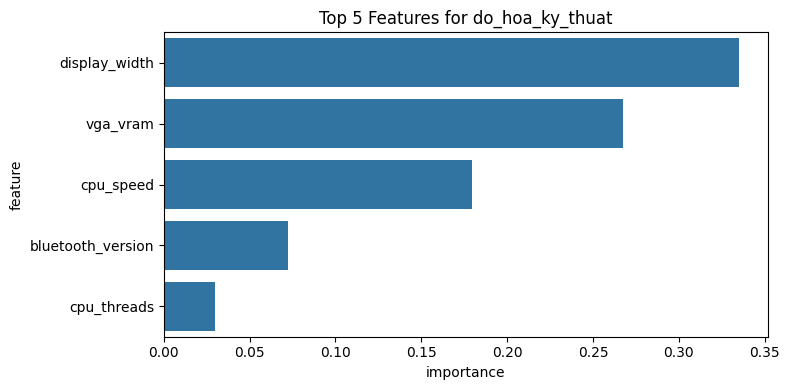


--- Feature Importances for Nhu Cau: cao_cap_sang_trong ---
             feature  importance
16         ram_speed    0.738525
9          cpu_speed    0.052477
3     product_weight    0.038432
7   battery_capacity    0.034579
4           depth_mm    0.024061


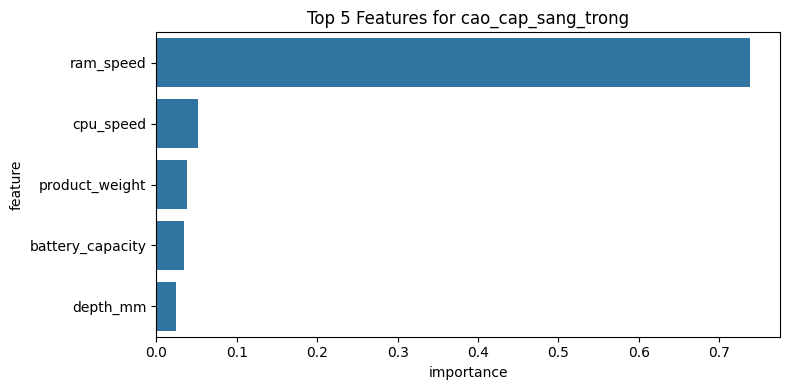

In [ ]:
for label, importance_df in all_feature_importances.items():
    print(f"\n--- Feature Importances for Nhu Cau: {label} ---")
    print(importance_df.head(5))
    plt.figure(figsize=(8, 4))
    sns.barplot(x='importance', y='feature', data=importance_df.head(5))
    plt.title(f'Top 5 Features for {label}')
    plt.tight_layout()
    plt.show()